In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import json
from itertools import product

pd.set_option('display.max_columns', None)

In [3]:
# 1. 나눔 폰트 설치 (Nanum)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,291 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [12]:
# 2. matplotlib의 폰트를 Nanum 폰트로 지정
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [4]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [5]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

### 1. 금천구

In [6]:
# 동별 정규화한 인구수, 정규화한 생활보호대상자 비율 데이터 불러오기

금천_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/금천구_인구수, 수급인구비율.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] =금천_df['동']
금천_df = 금천_df.iloc[:,2:]
금천_df = 금천_df.rename(columns={'인구수_scaled':'인구 수', '수급인구비율_scaled':'생활보호대상자 비율'})
금천_df

인구 수  생활보호대상자 비율
0  0.446362    0.000000
1  1.000000    0.237411
2  0.285085    0.601043
3  0.524221    0.166385
4  0.187777    0.379361
5  0.744424    0.283876
6  0.328420    0.572631
7  0.000000    0.121836
8  0.311038    0.592750
9  0.274813    1.000000

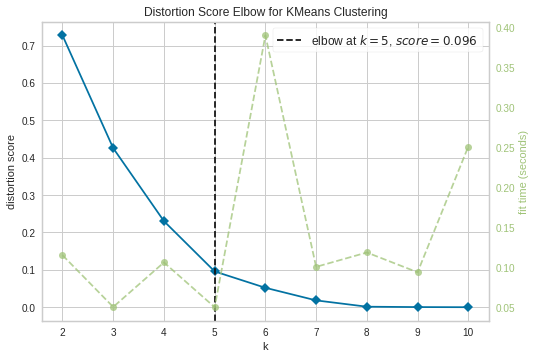

In [7]:
# 적절한 k값을 찾기 위해 Elbow Method 사용

km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(금천_df)
Elbow_M.show()

plt.show()

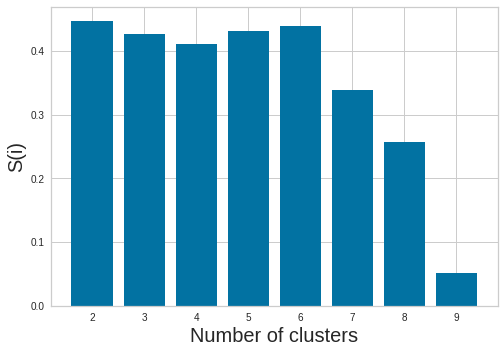

In [8]:
# 적절한 k값을 찾기 위해 Silhouette Method 사용

silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(금천_df)
    silhouette_scores.append(silhouette_score(금천_df, m1.fit_predict(금천_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [9]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)  #  Silhouette Method 사용 결과 적절한 k값 출력

Number of Cluster Required is :  2


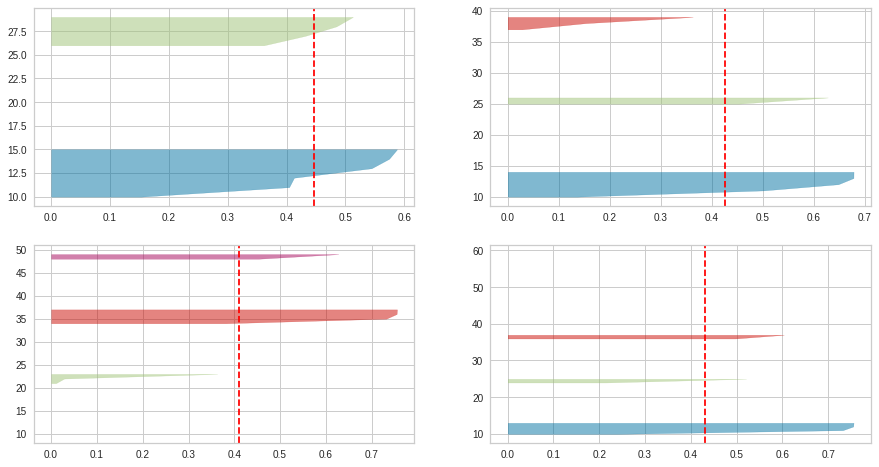

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [2, 3, 4, 5]:
    # Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(금천_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


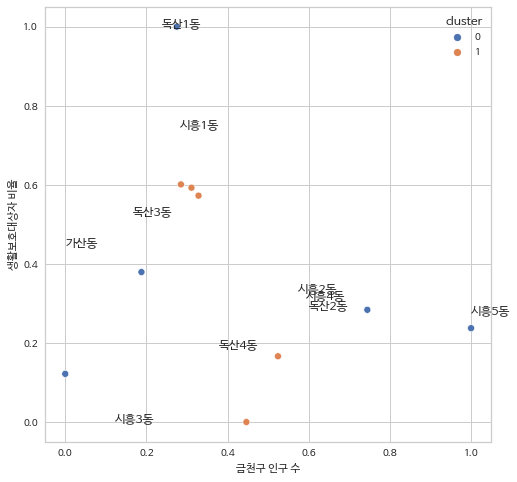

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


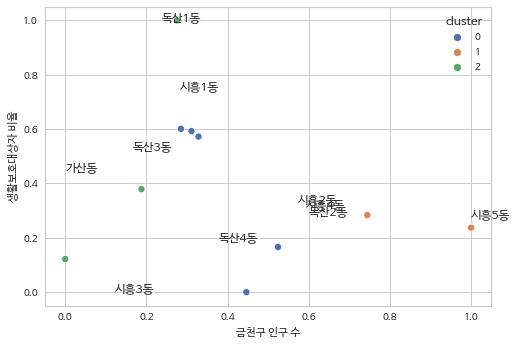

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


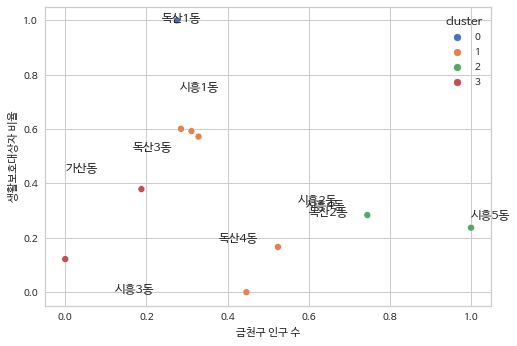

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


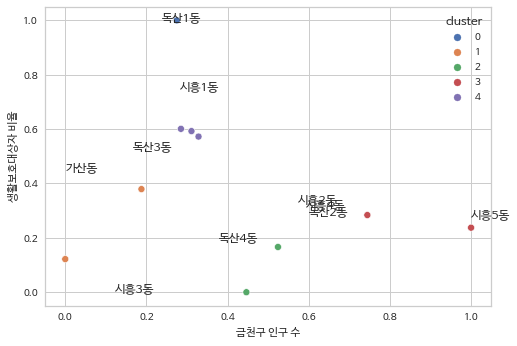

In [13]:
plt.figure(figsize = (8, 8))

for i in range(2,6):

  k = i
  model = KMeans(n_clusters = k, random_state = 10)
  model.fit(금천_df)
  금천_df['cluster'] = model.fit_predict(금천_df)

  cluster_df = pd.DataFrame()
  cluster_df['동'] = 동_df['동']
  cluster_df['인구 수'] = 금천_df['인구 수']
  cluster_df['생활보호대상자 비율'] = 금천_df['생활보호대상자 비율']
  cluster_df['cluster'] = 금천_df['cluster']

  cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})

  sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

  for index, dong, population, ratio, cluster in cluster_df.itertuples():
    plt.annotate(dong, (ratio, population))
  plt.xlabel('금천구 인구 수')
  plt.ylabel('생활보호대상자 비율')
  
  plt.show()

k=3으로 결정

In [14]:
k = 3

# 그룹 수, random_state 설정 (실행할 때마다 같은 결과가 나오도록 고정)
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(금천_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
금천_df['cluster'] = model.fit_predict(금천_df)

In [15]:
금천_df['cluster'].value_counts()  # 군집별로 몇 개의 동이 있는지 확인

2    4
1    3
0    3
Name: cluster, dtype: int64

In [16]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.1541968 , 0.50039903, 0.66666667],
       [0.30818088, 0.58880784, 4.        ],
       [0.6787516 , 0.17191796, 2.5       ]])

In [17]:
# 동, 정규화한 인구 수, 정규화한 생활보호대상자 비율, 클러스터 넘버를 데이터프레임으로 만들기

cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 금천_df['인구 수']
cluster_df['생활보호대상자 비율'] = 금천_df['생활보호대상자 비율']
cluster_df['cluster'] = 금천_df['cluster']
cluster_df

동      인구 수  생활보호대상자 비율  cluster
0   가산동  0.446362    0.000000        2
1  독산1동  1.000000    0.237411        2
2  독산2동  0.285085    0.601043        1
3  독산3동  0.524221    0.166385        2
4  독산4동  0.187777    0.379361        0
5  시흥1동  0.744424    0.283876        2
6  시흥2동  0.328420    0.572631        1
7  시흥3동  0.000000    0.121836        0
8  시흥4동  0.311038    0.592750        1
9  시흥5동  0.274813    1.000000        0

In [18]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

dong  population     ratio  cluster
0   가산동    0.446362  0.000000        2
1  독산1동    1.000000  0.237411        2
2  독산2동    0.285085  0.601043        1
3  독산3동    0.524221  0.166385        2
4  독산4동    0.187777  0.379361        0
5  시흥1동    0.744424  0.283876        2
6  시흥2동    0.328420  0.572631        1
7  시흥3동    0.000000  0.121836        0
8  시흥4동    0.311038  0.592750        1
9  시흥5동    0.274813  1.000000        0

In [ ]:
cluster_df.to_csv('/content/drive/MyDrive/project/15. 모델 평가/금천_cluster.csv')

#### 1-1. 군집화

In [19]:
# 클러스터별로 동 이름 출력하기

for i in range(3):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['독산4동', '시흥3동', '시흥5동']
cluster 1 :  ['독산2동', '시흥2동', '시흥4동']
cluster 2 :  ['가산동', '독산1동', '독산3동', '시흥1동']


#### 1-2. 클러스터별 인구수, 체육시설 수

In [20]:
# 클러스터별로 인구 수 합치기

금천_peo_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/금천구_인구수, 수급인구비율.csv', index_col=0)
금천_peo_df = 금천_peo_df[['동', '인구 수']]
금천_peo_df = 금천_peo_df.rename(columns={'동':'dong'})
금천_peo_df

dong     인구 수
0   가산동  25973.0
1  독산1동  44191.0
2  독산2동  20666.0
3  독산3동  28535.0
4  독산4동  17464.0
5  시흥1동  35781.0
6  시흥2동  22092.0
7  시흥3동  11285.0
8  시흥4동  21520.0
9  시흥5동  20328.0

In [21]:
df_all = pd.merge(cluster_df, 금천_peo_df, on='dong')
df_all

dong  population     ratio  cluster     인구 수
0   가산동    0.446362  0.000000        2  25973.0
1  독산1동    1.000000  0.237411        2  44191.0
2  독산2동    0.285085  0.601043        1  20666.0
3  독산3동    0.524221  0.166385        2  28535.0
4  독산4동    0.187777  0.379361        0  17464.0
5  시흥1동    0.744424  0.283876        2  35781.0
6  시흥2동    0.328420  0.572631        1  22092.0
7  시흥3동    0.000000  0.121836        0  11285.0
8  시흥4동    0.311038  0.592750        1  21520.0
9  시흥5동    0.274813  1.000000        0  20328.0

In [22]:
# 클러스터별로 인구 수 합계

for i in range(df_all['cluster'].nunique()):
  num = 0
  for j in range(len(df_all)):
    if df_all['cluster'][j] == i:
      num += df_all['인구 수'][j]
  print('cluster ' + str(i) + ' : ', num)

cluster 0 :  49077.0
cluster 1 :  64278.0
cluster 2 :  134480.0


In [23]:
# 금천구 공체시설 수요만큼(5개) 입지선정
# 클러스터별로 인구 만명당 공체시설 비율이 비슷해지도록

# a+b+c=5

def prop(a, b, c):
  
  p1 = a*10000/49077
  p2 = b*10000/134480
  p3 = c*10000/64278

  return ((p1-p2)**2 + (p1-p3)**2 + (p2-p3)**2)

In [24]:
from itertools import product

In [25]:
lst = []

for i, j, k in product(range(6), range(6), range(6)):
  if (i+j+k==5):
    lst.append([prop(i,j,k), (i,j,k)])

In [26]:
lst.sort()
lst

[[0.007252504330650812, (1, 3, 1)],
 [0.04094409655145514, (1, 2, 2)],
 [0.1305034971742451, (2, 2, 1)],
 [0.13280154737171312, (0, 4, 1)],
 [0.13876651332980022, (1, 4, 0)],
 [0.15433450016267364, (0, 3, 2)],
 [0.17635372882489322, (2, 1, 2)],
 [0.23984128999221319, (1, 1, 3)],
 [0.24985886674355062, (2, 3, 0)],
 [0.2764741958007064, (0, 5, 0)],
 [0.3410730541735878, (0, 2, 3)],
 [0.3874095616954951, (2, 0, 3)],
 [0.5025545259024958, (3, 1, 1)],
 [0.5605633969829878, (3, 0, 2)],
 [0.603944084652925, (1, 0, 4)],
 [0.6097512560419577, (3, 2, 0)],
 [0.6930172094044558, (0, 1, 4)],
 [1.1234055905154032, (4, 0, 1)],
 [1.2101669658552774, (0, 0, 5)],
 [1.218443681225021, (4, 1, 0)],
 [2.075936142292741, (5, 0, 0)]]

#### **공공체육시설 입지 선정 모델 결과**
- cluster0 : '독산4동', '시흥3동', '시흥5동' (1개)
- cluster1 : '가산동', '독산1동', '독산3동', '시흥1동' (3개)
- cluster2 : '독산2동', '시흥2동', '시흥4동' (1개)

#### **2020년 기준 금천구 공공체육시설 설치 개수**
- cluster0 : 독산4동(2개) + 시흥3동(0개) + 시흥5동(0개) = 2개
- cluster1 : 가산동(0개) + 독산1동(2개) + 독산3동(0개) + 시흥1동(1개) = 3개
- cluster2 : 독산2동(0개) + 시흥2동(1개) + 시흥4동(0개) = 1개

### 2. 서대문구

In [27]:
# 동별 정규화한 인구수, 정규화한 생활보호대상자 비율 데이터 불러오기

서대문_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/서대문구_인구수, 수급인구비율.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] =서대문_df['동']
서대문_df = 서대문_df.iloc[:,2:]
서대문_df = 서대문_df.rename(columns={'인구수_scaled':'인구 수', '수급인구비율_scaled':'생활보호대상자 비율'})
서대문_df

인구 수  생활보호대상자 비율
0   0.149974    0.924647
1   0.414598    0.467839
2   0.000000    0.785922
3   0.066570    0.979826
4   0.360583    0.601857
5   0.540955    0.927890
6   0.072948    0.000000
7   0.672641    0.856628
8   0.170482    0.401251
9   0.751403    1.000000
10  0.278350    0.525969
11  0.105850    0.684959
12  0.351903    0.269130
13  1.000000    0.223855

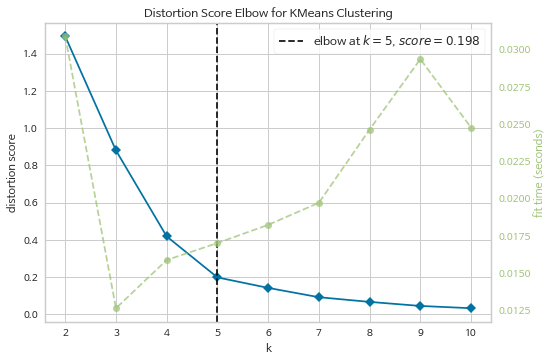

In [28]:
# 적절한 k값을 찾기 위해 Elbow Method 사용

km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(서대문_df)
Elbow_M.show()

plt.show()

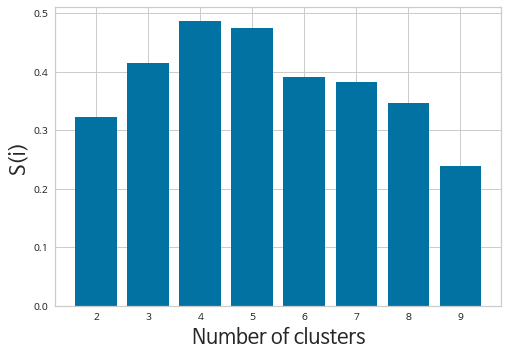

In [29]:
# 적절한 k값을 찾기 위해 Silhouette Method 사용

silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(서대문_df)
    silhouette_scores.append(silhouette_score(서대문_df, m1.fit_predict(서대문_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [30]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)  #  Silhouette Method 사용 결과 적절한 k값 출력

Number of Cluster Required is :  4


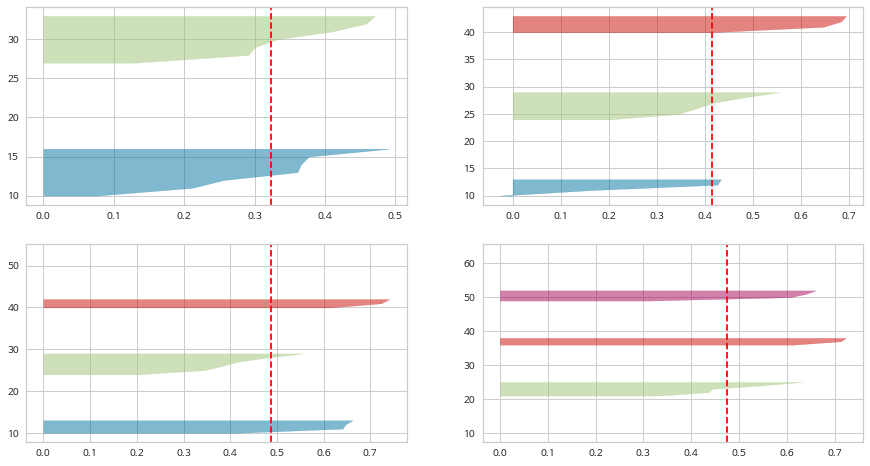

In [31]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [2, 3, 4, 5]:
    # Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(서대문_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


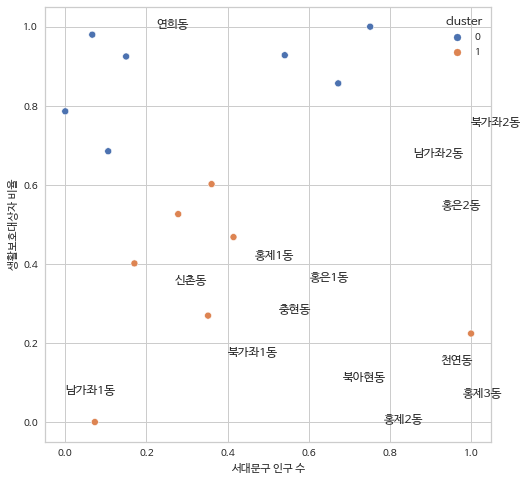

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


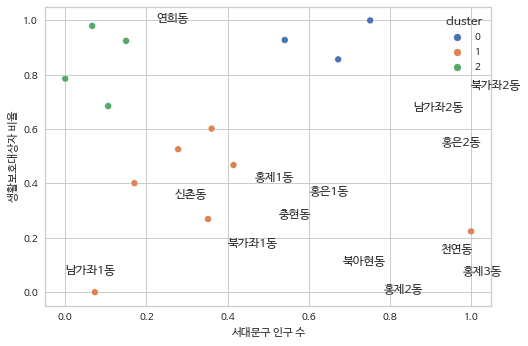

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


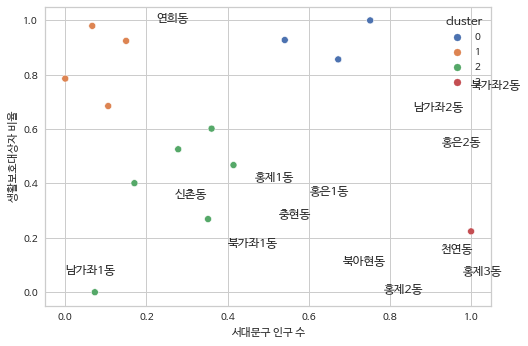

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


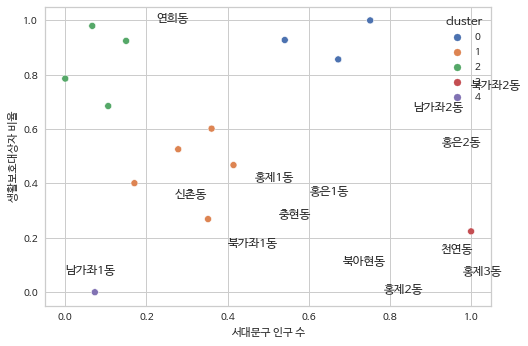

In [32]:
plt.figure(figsize = (8, 8))

for i in range(2,6):

  k = i
  model = KMeans(n_clusters = k, random_state = 10)
  model.fit(서대문_df)
  서대문_df['cluster'] = model.fit_predict(서대문_df)

  cluster_df = pd.DataFrame()
  cluster_df['동'] = 동_df['동']
  cluster_df['인구 수'] = 서대문_df['인구 수']
  cluster_df['생활보호대상자 비율'] = 서대문_df['생활보호대상자 비율']
  cluster_df['cluster'] = 서대문_df['cluster']

  cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})

  sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

  for index, dong, population, ratio, cluster in cluster_df.itertuples():
    plt.annotate(dong, (ratio, population))
  plt.xlabel('서대문구 인구 수')
  plt.ylabel('생활보호대상자 비율')
  
  plt.show()

k=4로 결정

In [33]:
k = 4

# 그룹 수, random_state 설정 (실행할 때마다 같은 결과가 나오도록 고정)
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(서대문_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
서대문_df['cluster'] = model.fit_predict(서대문_df)

In [34]:
서대문_df['cluster'].value_counts()  # 군집별로 몇 개의 동이 있는지 확인

2    5
1    4
0    3
3    2
Name: cluster, dtype: int64

In [35]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[6.54999798e-01, 9.28172629e-01, 2.22044605e-16],
       [8.05982802e-02, 8.43838377e-01, 2.00000000e+00],
       [3.15183077e-01, 4.53209101e-01, 1.00000000e+00],
       [5.36474103e-01, 1.11927440e-01, 3.50000000e+00]])

In [36]:
# 동, 정규화한 인구 수, 정규화한 생활보호대상자 비율, 클러스터 넘버를 데이터프레임으로 만들기

cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 서대문_df['인구 수']
cluster_df['생활보호대상자 비율'] = 서대문_df['생활보호대상자 비율']
cluster_df['cluster'] = 서대문_df['cluster']
cluster_df

동      인구 수  생활보호대상자 비율  cluster
0     천연동  0.149974    0.924647        1
1    홍제1동  0.414598    0.467839        2
2    홍제2동  0.000000    0.785922        1
3    홍제3동  0.066570    0.979826        1
4    홍은1동  0.360583    0.601857        2
5    홍은2동  0.540955    0.927890        0
6   남가좌1동  0.072948    0.000000        3
7   남가좌2동  0.672641    0.856628        0
8   북가좌1동  0.170482    0.401251        2
9   북가좌2동  0.751403    1.000000        0
10    충현동  0.278350    0.525969        2
11   북아현동  0.105850    0.684959        1
12    신촌동  0.351903    0.269130        2
13    연희동  1.000000    0.223855        3

In [37]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

dong  population     ratio  cluster
0     천연동    0.149974  0.924647        1
1    홍제1동    0.414598  0.467839        2
2    홍제2동    0.000000  0.785922        1
3    홍제3동    0.066570  0.979826        1
4    홍은1동    0.360583  0.601857        2
5    홍은2동    0.540955  0.927890        0
6   남가좌1동    0.072948  0.000000        3
7   남가좌2동    0.672641  0.856628        0
8   북가좌1동    0.170482  0.401251        2
9   북가좌2동    0.751403  1.000000        0
10    충현동    0.278350  0.525969        2
11   북아현동    0.105850  0.684959        1
12    신촌동    0.351903  0.269130        2
13    연희동    1.000000  0.223855        3

In [ ]:
cluster_df.to_csv('/content/drive/MyDrive/project/15. 모델 평가/서대문_cluster.csv')

#### 2-1. 군집화

In [38]:
# 클러스터별로 동 이름 출력하기

for i in range(4):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['홍은2동', '남가좌2동', '북가좌2동']
cluster 1 :  ['천연동', '홍제2동', '홍제3동', '북아현동']
cluster 2 :  ['홍제1동', '홍은1동', '북가좌1동', '충현동', '신촌동']
cluster 3 :  ['남가좌1동', '연희동']


#### 2-2. 클러스터별 인구수, 체육시설 수

In [39]:
# 클러스터별로 인구 수 합치기

서대문_peo_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/서대문구_인구수, 수급인구비율.csv', index_col=0)
서대문_peo_df = 서대문_peo_df[['동', '인구 수']]
서대문_peo_df = 서대문_peo_df.rename(columns={'동':'dong'})
서대문_peo_df

dong     인구 수
0     천연동  18049.0
1    홍제1동  24604.0
2    홍제2동  14334.0
3    홍제3동  15983.0
4    홍은1동  23266.0
5    홍은2동  27734.0
6   남가좌1동  16141.0
7   남가좌2동  30996.0
8   북가좌1동  18557.0
9   북가좌2동  32947.0
10    충현동  21229.0
11   북아현동  16956.0
12    신촌동  23051.0
13    연희동  39105.0

In [40]:
df_all = pd.merge(cluster_df, 서대문_peo_df, on='dong')
df_all

dong  population     ratio  cluster     인구 수
0     천연동    0.149974  0.924647        1  18049.0
1    홍제1동    0.414598  0.467839        2  24604.0
2    홍제2동    0.000000  0.785922        1  14334.0
3    홍제3동    0.066570  0.979826        1  15983.0
4    홍은1동    0.360583  0.601857        2  23266.0
5    홍은2동    0.540955  0.927890        0  27734.0
6   남가좌1동    0.072948  0.000000        3  16141.0
7   남가좌2동    0.672641  0.856628        0  30996.0
8   북가좌1동    0.170482  0.401251        2  18557.0
9   북가좌2동    0.751403  1.000000        0  32947.0
10    충현동    0.278350  0.525969        2  21229.0
11   북아현동    0.105850  0.684959        1  16956.0
12    신촌동    0.351903  0.269130        2  23051.0
13    연희동    1.000000  0.223855        3  39105.0

In [41]:
# 클러스터별로 인구 수 합계

for i in range(df_all['cluster'].nunique()):
  num = 0
  for j in range(len(df_all)):
    if df_all['cluster'][j] == i:
      num += df_all['인구 수'][j]
  print('cluster ' + str(i) + ' : ', num)

cluster 0 :  91677.0
cluster 1 :  65322.0
cluster 2 :  110707.0
cluster 3 :  55246.0


In [42]:
# a+b+c+d=7

def prop(a, b, c, d):
  
  p1 = a*10000/91677
  p2 = b*10000/65322
  p3 = c*10000/110707
  p4 = d*10000/55246

  return ((p1-p2)**2 + (p1-p3)**2 + (p1-p4)**2 + (p2-p3)**2 + (p2-p4)**2 + (p3-p4)**2)

In [43]:
lst = []

In [44]:
for i, j, k, l in product(range(8), range(8), range(8), range(8)):
  if (i+j+k+l==7):
    lst.append([prop(i,j,k,l), (i,j,k,l)])

In [45]:
lst

[[4.816323576653945, (0, 0, 0, 7)],
 [3.36679831529582, (0, 0, 1, 6)],
 [2.2282140961161856, (0, 0, 2, 5)],
 [1.40057091911504, (0, 0, 3, 4)],
 [0.8838687842923835, (0, 0, 4, 3)],
 [0.6781076916482159, (0, 0, 5, 2)],
 [0.7832876411825376, (0, 0, 6, 1)],
 [1.1994086328953482, (0, 0, 7, 0)],
 [3.2763086288369707, (0, 1, 0, 6)],
 [2.083832495962539, (0, 1, 1, 5)],
 [1.2022974052665965, (0, 1, 2, 4)],
 [0.6317033567491429, (0, 1, 3, 3)],
 [0.37205035041017825, (0, 1, 4, 2)],
 [0.4233383862497028, (0, 1, 5, 1)],
 [0.7855674642677164, (0, 1, 6, 0)],
 [2.1843343350539697, (0, 2, 0, 5)],
 [1.24890733066323, (0, 2, 1, 4)],
 [0.6244213684509793, (0, 2, 2, 3)],
 [0.3108764484172176, (0, 2, 3, 2)],
 [0.308272570561945, (0, 2, 4, 1)],
 [0.6166097348851614, (0, 2, 5, 0)],
 [1.5404006953049403, (0, 3, 0, 4)],
 [0.8620228193978925, (0, 3, 1, 3)],
 [0.4945859856693338, (0, 3, 2, 2)],
 [0.4380901941192641, (0, 3, 3, 1)],
 [0.6925354447476835, (0, 3, 4, 0)],
 [1.344507709589883, (0, 4, 0, 3)],
 [0.923178

In [46]:
lst.sort()

In [47]:
lst

[[0.031180209490282842, (2, 1, 3, 1)],
 [0.041955305917017925, (2, 2, 2, 1)],
 [0.07473505815958419, (3, 1, 2, 1)],
 [0.09523595922314433, (1, 2, 3, 1)],
 [0.10363901597917821, (2, 1, 2, 2)],
 [0.14738131885365569, (1, 1, 4, 1)],
 [0.14843061064356572, (3, 2, 1, 1)],
 [0.15796670417834116, (1, 1, 3, 2)],
 [0.15971325824262686, (1, 2, 2, 2)],
 [0.16830602610071038, (2, 2, 1, 2)],
 [0.20906728581268946, (3, 1, 1, 2)],
 [0.22654562791181448, (2, 2, 3, 0)],
 [0.24592294492067962, (3, 0, 3, 1)],
 [0.2513438726849679, (3, 1, 3, 0)],
 [0.2652885523086248, (2, 0, 4, 1)],
 [0.2696624451798765, (2, 1, 4, 0)],
 [0.27114751147415234, (3, 2, 2, 0)],
 [0.2780458648615598, (4, 1, 1, 1)],
 [0.28385544510272304, (2, 0, 3, 2)],
 [0.2879740388377099, (1, 3, 2, 1)],
 [0.2976138415888299, (2, 3, 1, 1)],
 [0.308272570561945, (0, 2, 4, 1)],
 [0.3108764484172176, (0, 2, 3, 2)],
 [0.3263632588789878, (3, 0, 2, 2)],
 [0.3366547519914681, (3, 2, 0, 2)],
 [0.3416997023821508, (1, 2, 4, 0)],
 [0.37205035041017825,

#### **공공체육시설 입지 선정 모델 결과**
- cluster0 : '홍은2동', '남가좌2동', '북가좌2동' (2개)
- cluster1 : '천연동', '홍제2동', '홍제3동', '북아현동' (1개)
- cluster2 : '홍제1동', '홍은1동', '북가좌1동', '충현동', '신촌동' (3개)
- cluster3 : '남가좌1동', '연희동' (1개)

#### **2020년 기준 서대문구 공공체육시설 설치 개수**
- cluster0 : 홍은2동(1개) + 남가좌2동(1개) + 북가좌2동(0개) = 2개
- cluster1 : 천연동(0개) + 홍제2동(1개) + 홍제3동(0개) + 북아현동(1개) = 2개
- cluster2 : 홍제1동(0개) + 홍은1동(0개) + 북가좌1동(0개) + 충현동(0개) + 신촌동(1개) = 1개
- cluster3 : 남가좌1동(0개) + 연희동(2개) = 2개

### 3. 마포구

In [48]:
# 동별 정규화한 인구수, 정규화한 생활보호대상자 비율 데이터 불러오기

마포_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/마포구_인구수, 수급인구비율.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] =마포_df['동']
마포_df = 마포_df.iloc[:,2:]
마포_df = 마포_df.rename(columns={'인구수_scaled':'인구 수', '수급인구비율_scaled':'생활보호대상자 비율'})
마포_df

인구 수  생활보호대상자 비율
0   0.337817    0.182198
1   0.107858    0.377893
2   0.000000    0.376703
3   0.386333    0.117565
4   0.507714    0.094878
5   0.205431    0.455475
6   0.296673    0.499622
7   0.228448    0.395222
8   0.137313    0.124357
9   0.245100    0.381192
10  1.000000    1.000000
11  0.688114    0.456303
12  0.328502    0.270650
13  0.450351    0.000000
14  0.930984    0.382633
15  0.480381    0.158712

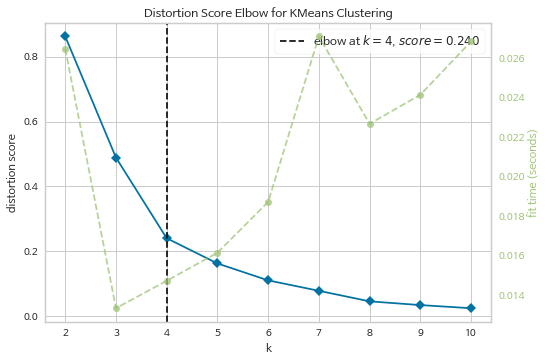

In [49]:
# 적절한 k값을 찾기 위해 Elbow Method 사용

km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(마포_df)
Elbow_M.show()

plt.show()


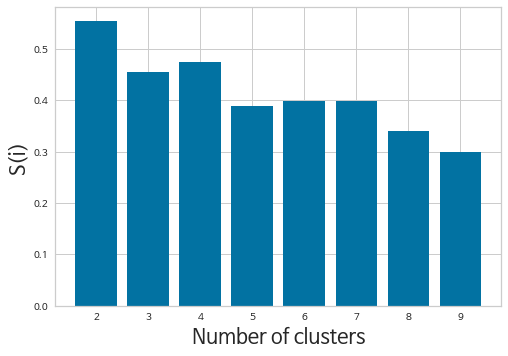

In [50]:
# 적절한 k값을 찾기 위해 Silhouette Method 사용

silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(마포_df)
    silhouette_scores.append(silhouette_score(마포_df, m1.fit_predict(마포_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [51]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)  #  Silhouette Method 사용 결과 적절한 k값 출력

Number of Cluster Required is :  2


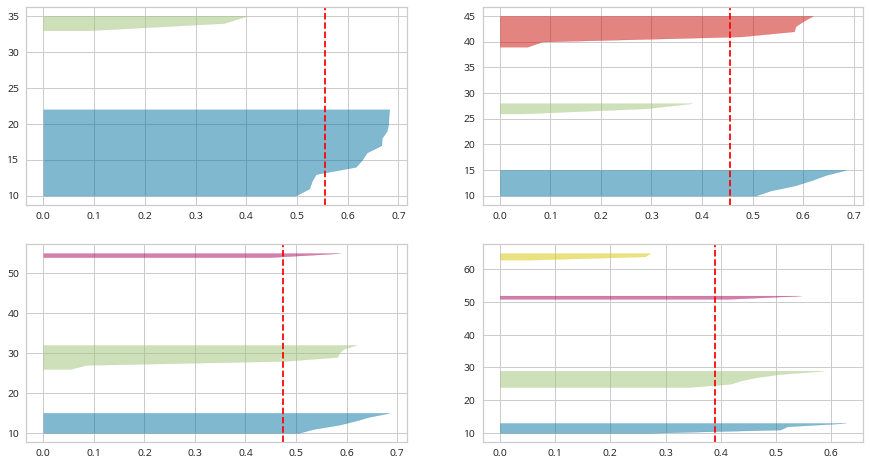

In [52]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [2, 3, 4, 5]:
    # Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(마포_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


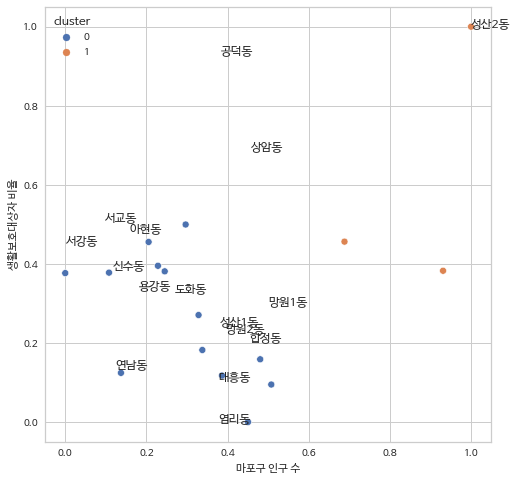

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


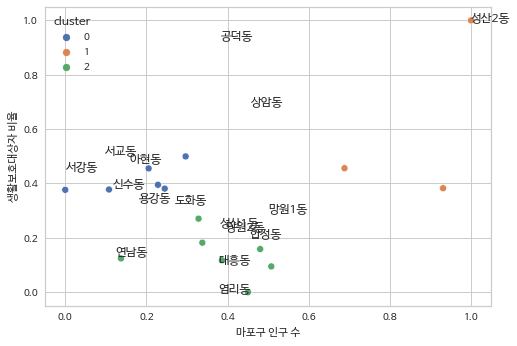

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


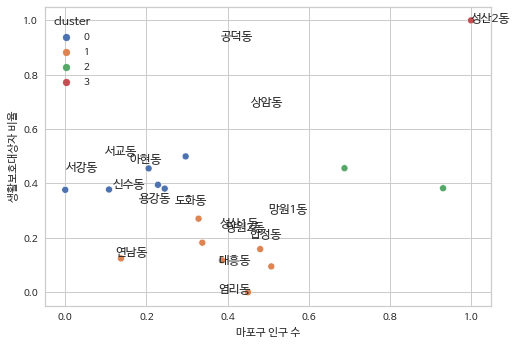

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


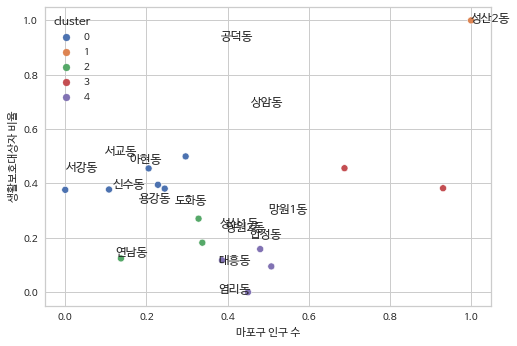

In [53]:
plt.figure(figsize = (8, 8))

for i in range(2,6):

  k = i
  model = KMeans(n_clusters = k, random_state = 10)
  model.fit(마포_df)
  마포_df['cluster'] = model.fit_predict(마포_df)

  cluster_df = pd.DataFrame()
  cluster_df['동'] = 동_df['동']
  cluster_df['인구 수'] = 마포_df['인구 수']
  cluster_df['생활보호대상자 비율'] = 마포_df['생활보호대상자 비율']
  cluster_df['cluster'] = 마포_df['cluster']

  cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})

  sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

  for index, dong, population, ratio, cluster in cluster_df.itertuples():
    plt.annotate(dong, (ratio, population))
  plt.xlabel('마포구 인구 수')
  plt.ylabel('생활보호대상자 비율')
  
  plt.show()

k=4로 결정

In [54]:
k = 4

# 그룹 수, random_state 설정 (실행할 때마다 같은 결과가 나오도록 고정)
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(마포_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
마포_df['cluster'] = model.fit_predict(마포_df)

In [55]:
마포_df['cluster'].value_counts()  # 군집별로 몇 개의 동이 있는지 확인

1    6
2    5
0    4
3    1
Name: cluster, dtype: int64

In [56]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.45619493, 0.09278882, 4.        ],
       [0.18058503, 0.41435121, 0.        ],
       [0.48454594, 0.28322798, 2.4       ],
       [1.        , 1.        , 1.        ]])

In [57]:
# 동, 정규화한 인구 수, 정규화한 생활보호대상자 비율, 클러스터 넘버를 데이터프레임으로 만들기

cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 마포_df['인구 수']
cluster_df['생활보호대상자 비율'] = 마포_df['생활보호대상자 비율']
cluster_df['cluster'] = 마포_df['cluster']
cluster_df

동      인구 수  생활보호대상자 비율  cluster
0    용강동  0.337817    0.182198        2
1    대흥동  0.107858    0.377893        1
2    염리동  0.000000    0.376703        1
3    신수동  0.386333    0.117565        0
4    서교동  0.507714    0.094878        0
5    합정동  0.205431    0.455475        1
6   망원1동  0.296673    0.499622        1
7   망원2동  0.228448    0.395222        1
8    연남동  0.137313    0.124357        2
9   성산1동  0.245100    0.381192        1
10  성산2동  1.000000    1.000000        3
11   상암동  0.688114    0.456303        2
12   도화동  0.328502    0.270650        2
13   서강동  0.450351    0.000000        0
14   공덕동  0.930984    0.382633        2
15   아현동  0.480381    0.158712        0

In [58]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

dong  population     ratio  cluster
0    용강동    0.337817  0.182198        2
1    대흥동    0.107858  0.377893        1
2    염리동    0.000000  0.376703        1
3    신수동    0.386333  0.117565        0
4    서교동    0.507714  0.094878        0
5    합정동    0.205431  0.455475        1
6   망원1동    0.296673  0.499622        1
7   망원2동    0.228448  0.395222        1
8    연남동    0.137313  0.124357        2
9   성산1동    0.245100  0.381192        1
10  성산2동    1.000000  1.000000        3
11   상암동    0.688114  0.456303        2
12   도화동    0.328502  0.270650        2
13   서강동    0.450351  0.000000        0
14   공덕동    0.930984  0.382633        2
15   아현동    0.480381  0.158712        0

In [ ]:
cluster_df.to_csv('/content/drive/MyDrive/project/15. 모델 평가/마포_cluster.csv')

#### 3-1. 군집화

In [59]:
# 클러스터별로 동 이름 출력하기

for i in range(4):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['신수동', '서교동', '서강동', '아현동']
cluster 1 :  ['대흥동', '염리동', '합정동', '망원1동', '망원2동', '성산1동']
cluster 2 :  ['용강동', '연남동', '상암동', '도화동', '공덕동']
cluster 3 :  ['성산2동']


#### 3-2. 클러스터별 인구수, 체육시설 수

In [60]:
# 클러스터별로 인구 수 합치기

마포_peo_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/마포구_인구수, 수급인구비율.csv', index_col=0)
마포_peo_df = 마포_peo_df[['동', '인구 수']]
마포_peo_df = 마포_peo_df.rename(columns={'동':'dong'})
마포_peo_df

dong     인구 수
0    용강동  22257.0
1    대흥동  15863.0
2    염리동  12864.0
3    신수동  23606.0
4    서교동  26981.0
5    합정동  18576.0
6   망원1동  21113.0
7   망원2동  19216.0
8    연남동  16682.0
9   성산1동  19679.0
10  성산2동  40669.0
11   상암동  31997.0
12   도화동  21998.0
13   서강동  25386.0
14   공덕동  38750.0
15   아현동  26221.0

In [61]:
df_all = pd.merge(cluster_df, 마포_peo_df, on='dong')
df_all

dong  population     ratio  cluster     인구 수
0    용강동    0.337817  0.182198        2  22257.0
1    대흥동    0.107858  0.377893        1  15863.0
2    염리동    0.000000  0.376703        1  12864.0
3    신수동    0.386333  0.117565        0  23606.0
4    서교동    0.507714  0.094878        0  26981.0
5    합정동    0.205431  0.455475        1  18576.0
6   망원1동    0.296673  0.499622        1  21113.0
7   망원2동    0.228448  0.395222        1  19216.0
8    연남동    0.137313  0.124357        2  16682.0
9   성산1동    0.245100  0.381192        1  19679.0
10  성산2동    1.000000  1.000000        3  40669.0
11   상암동    0.688114  0.456303        2  31997.0
12   도화동    0.328502  0.270650        2  21998.0
13   서강동    0.450351  0.000000        0  25386.0
14   공덕동    0.930984  0.382633        2  38750.0
15   아현동    0.480381  0.158712        0  26221.0

In [62]:
# 클러스터별로 인구 수 합계

for i in range(df_all['cluster'].nunique()):
  num = 0
  for j in range(len(df_all)):
    if df_all['cluster'][j] == i:
      num += df_all['인구 수'][j]
  print('cluster ' + str(i) + ' : ', num)

cluster 0 :  102194.0
cluster 1 :  107311.0
cluster 2 :  131684.0
cluster 3 :  40669.0


In [63]:
# a+b+c+d=8

def prop(a, b, c, d):
  
  p1 = a*10000/102194
  p2 = b*10000/107311
  p3 = c*10000/131684
  p4 = d*10000/40669

  return ((p1-p2)**2 + (p1-p3)**2 + (p1-p4)**2 + (p2-p3)**2 + (p2-p4)**2 + (p3-p4)**2)

In [64]:
lst = []

for i, j, k, l in product(range(9), range(9), range(9), range(9)):
  if (i+j+k+l==8):
    lst.append([prop(i,j,k,l), (i,j,k,l)])

In [65]:
lst.sort()
lst

[[0.009222367998501256, (2, 2, 3, 1)],
 [0.03774508843078406, (2, 3, 2, 1)],
 [0.04740405999286286, (3, 2, 2, 1)],
 [0.07596073500162935, (1, 3, 3, 1)],
 [0.08851296819781677, (3, 1, 3, 1)],
 [0.0928163939716135, (1, 2, 4, 1)],
 [0.09570965560572214, (2, 1, 4, 1)],
 [0.1213051598274126, (3, 3, 1, 1)],
 [0.17411508407114887, (1, 4, 2, 1)],
 [0.17909671901699403, (2, 3, 3, 0)],
 [0.18127781690257055, (2, 4, 1, 1)],
 [0.19034165062396813, (3, 2, 3, 0)],
 [0.19084586474541154, (2, 2, 4, 0)],
 [0.20309199875738523, (4, 1, 2, 1)],
 [0.20736146995469826, (4, 2, 1, 1)],
 [0.22397088429781759, (3, 3, 2, 0)],
 [0.22468206098110136, (1, 1, 5, 1)],
 [0.23595209953994845, (0, 3, 4, 1)],
 [0.24463188444227435, (3, 0, 4, 1)],
 [0.25599827170364436, (1, 3, 4, 0)],
 [0.2717224249896223, (3, 1, 4, 0)],
 [0.28235758132808025, (2, 4, 2, 0)],
 [0.28872806920720095, (0, 4, 3, 1)],
 [0.2972069512524467, (2, 0, 5, 1)],
 [0.29818613791219956, (0, 2, 5, 1)],
 [0.29965384308936655, (2, 2, 2, 2)],
 [0.31021626770

#### **공공체육시설 입지 선정 모델 결과**
- cluster0 : '신수동', '서교동', '서강동', '아현동' (2개)
- cluster1 : '대흥동', '염리동', '합정동', '망원1동', '망원2동', '성산1동' (2개)
- cluster2 : '용강동', '연남동', '상암동', '도화동', '공덕동' (3개)
- cluster3 : '성산2동' (1개)

#### **2020년 기준 서대문구 공공체육시설 설치 개수**
- cluster0 : 신수동(1개) + 서교동(0개) + 서강동(0개) + 아현동(1개) = 2개
- cluster1 : 대흥동(2개) + 염리동(0개) + 합정동(0개) + 망원1동(0개) + 망원2동(1개) + 성산1동(1개) = 4개
- cluster2 : 용강동(1개) + 연남동(0개) + 상암동(0개) + 도화동(0개) + 공덕동(1개) = 2개
- cluster3 : 성산2동(3개) = 3개

### 4. 중구

In [66]:
# 동별 정규화한 인구수, 정규화한 생활보호대상자 비율 데이터 불러오기

중구_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/중구_인구수, 수급인구비율.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] =중구_df['동']
중구_df = 중구_df.iloc[:,2:]
중구_df = 중구_df.rename(columns={'인구수_scaled':'인구 수', '수급인구비율_scaled':'생활보호대상자 비율'})
중구_df

인구 수  생활보호대상자 비율
0   0.067849    0.000000
1   0.246312    1.000000
2   0.111653    0.095991
3   0.181127    0.049312
4   0.227530    0.105963
5   0.289140    0.211977
6   0.000000    0.713043
7   0.578410    0.334665
8   0.751544    0.292376
9   0.704101    0.456875
10  0.469487    0.332758
11  0.829141    0.218839
12  1.000000    0.462792
13  0.800286    0.490131
14  0.575811    0.029880

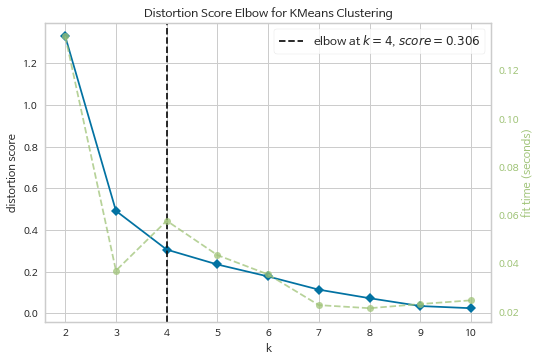

In [67]:
# 적절한 k값을 찾기 위해 Elbow Method 사용

km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(중구_df)
Elbow_M.show()

plt.show()

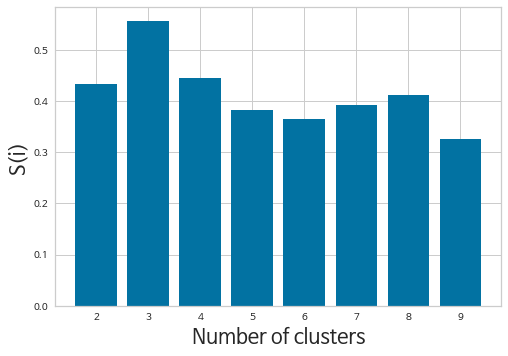

In [68]:
# 적절한 k값을 찾기 위해 Silhouette Method 사용

silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(중구_df)
    silhouette_scores.append(silhouette_score(중구_df, m1.fit_predict(중구_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [69]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)  #  Silhouette Method 사용 결과 적절한 k값 출력

Number of Cluster Required is :  3


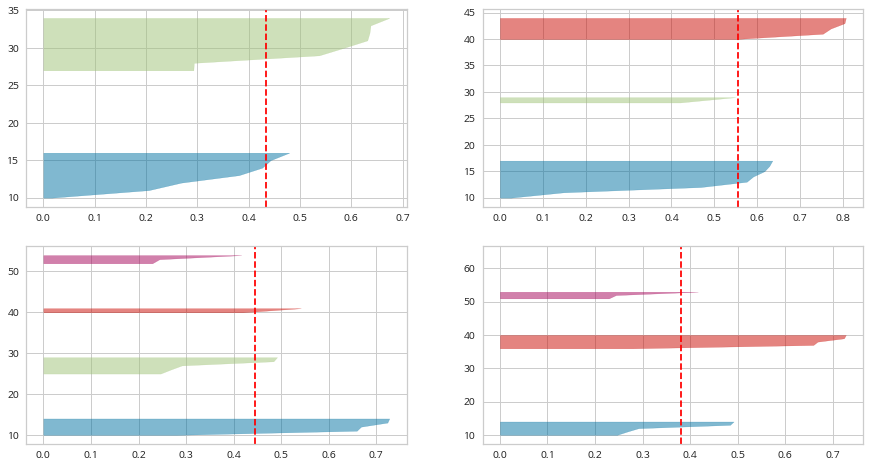

In [70]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [2, 3, 4, 5]:
    # Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(중구_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


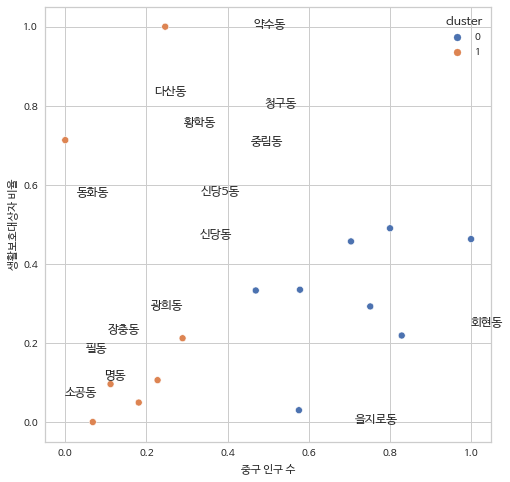

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


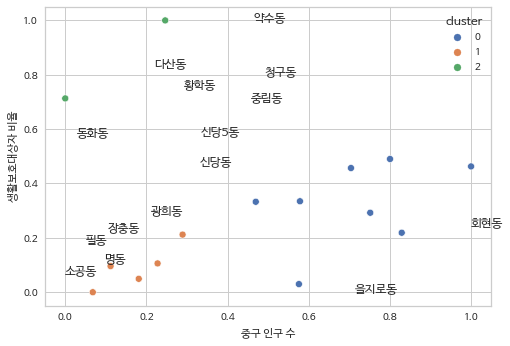

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


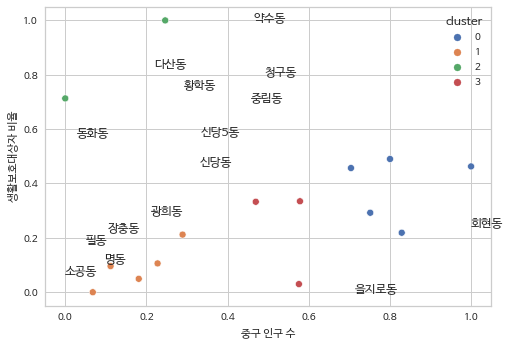

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


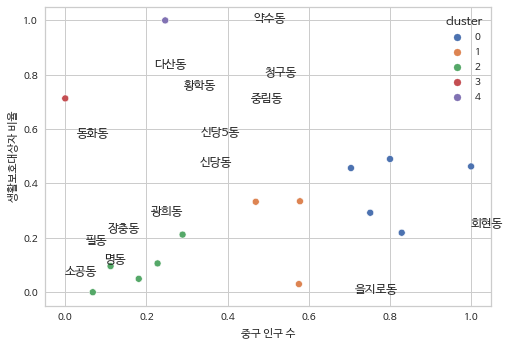

In [71]:
plt.figure(figsize = (8, 8))

for i in range(2,6):

  k = i
  model = KMeans(n_clusters = k, random_state = 10)
  model.fit(중구_df)
  중구_df['cluster'] = model.fit_predict(중구_df)

  cluster_df = pd.DataFrame()
  cluster_df['동'] = 동_df['동']
  cluster_df['인구 수'] = 중구_df['인구 수']
  cluster_df['생활보호대상자 비율'] = 중구_df['생활보호대상자 비율']
  cluster_df['cluster'] = 중구_df['cluster']

  cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})

  sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

  for index, dong, population, ratio, cluster in cluster_df.itertuples():
    plt.annotate(dong, (ratio, population))
  plt.xlabel('중구 인구 수')
  plt.ylabel('생활보호대상자 비율')
  
  plt.show()


k=4

In [72]:
k = 4

# 그룹 수, random_state 설정 (실행할 때마다 같은 결과가 나오도록 고정)
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(중구_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
중구_df['cluster'] = model.fit_predict(중구_df)

In [73]:
중구_df['cluster'].value_counts()  # 군집별로 몇 개의 동이 있는지 확인

2    5
1    5
3    3
0    2
Name: cluster, dtype: int64

In [74]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.12315591, 0.85652152, 3.5       ],
       [0.81701436, 0.3842026 , 0.        ],
       [0.1754598 , 0.09264862, 2.        ],
       [0.54123611, 0.23243403, 1.        ]])

In [75]:
# 동, 정규화한 인구 수, 정규화한 생활보호대상자 비율, 클러스터 넘버를 데이터프레임으로 만들기

cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 중구_df['인구 수']
cluster_df['생활보호대상자 비율'] = 중구_df['생활보호대상자 비율']
cluster_df['cluster'] = 중구_df['cluster']
cluster_df

동      인구 수  생활보호대상자 비율  cluster
0    소공동  0.067849    0.000000        2
1    회현동  0.246312    1.000000        0
2     명동  0.111653    0.095991        2
3     필동  0.181127    0.049312        2
4    장충동  0.227530    0.105963        2
5    광희동  0.289140    0.211977        2
6   을지로동  0.000000    0.713043        0
7   신당5동  0.578410    0.334665        3
8    황학동  0.751544    0.292376        1
9    중림동  0.704101    0.456875        1
10   신당동  0.469487    0.332758        3
11   다산동  0.829141    0.218839        1
12   약수동  1.000000    0.462792        1
13   청구동  0.800286    0.490131        1
14   동화동  0.575811    0.029880        3

In [76]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

dong  population     ratio  cluster
0    소공동    0.067849  0.000000        2
1    회현동    0.246312  1.000000        0
2     명동    0.111653  0.095991        2
3     필동    0.181127  0.049312        2
4    장충동    0.227530  0.105963        2
5    광희동    0.289140  0.211977        2
6   을지로동    0.000000  0.713043        0
7   신당5동    0.578410  0.334665        3
8    황학동    0.751544  0.292376        1
9    중림동    0.704101  0.456875        1
10   신당동    0.469487  0.332758        3
11   다산동    0.829141  0.218839        1
12   약수동    1.000000  0.462792        1
13   청구동    0.800286  0.490131        1
14   동화동    0.575811  0.029880        3

In [ ]:
cluster_df.to_csv('/content/drive/MyDrive/project/15. 모델 평가/중구_cluster.csv')

In [77]:
# 클러스터별로 동 이름 출력하기

for i in range(4):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['회현동', '을지로동']
cluster 1 :  ['황학동', '중림동', '다산동', '약수동', '청구동']
cluster 2 :  ['소공동', '명동', '필동', '장충동', '광희동']
cluster 3 :  ['신당5동', '신당동', '동화동']


### 5. 구로구

In [78]:
# 동별 정규화한 인구수, 정규화한 생활보호대상자 비율 데이터 불러오기

구로_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/구로구_인구수, 수급인구비율.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] =구로_df['동']
구로_df = 구로_df.iloc[:,2:]
구로_df = 구로_df.rename(columns={'인구수_scaled':'인구 수', '수급인구비율_scaled':'생활보호대상자 비율'})
구로_df

인구 수  생활보호대상자 비율
0   0.872078    0.019501
1   0.289071    0.000000
2   0.736976    0.639076
3   0.449514    0.267071
4   0.422407    0.705713
5   0.709085    0.203414
6   0.364193    0.515424
7   0.533108    0.790313
8   0.822846    0.904466
9   0.704339    0.435399
10  0.275420    0.598574
11  0.356857    0.894852
12  1.000000    0.795978
13  0.393614    0.665240
14  0.000000    1.000000
15  0.083987    0.669218

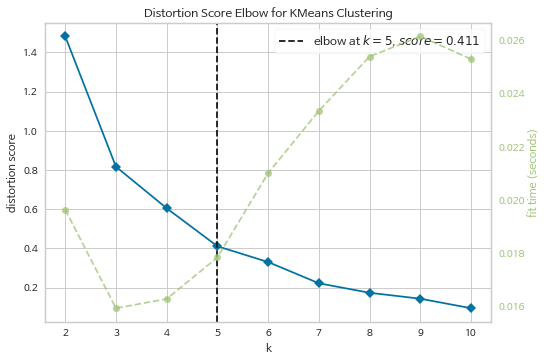

In [79]:
# 적절한 k값을 찾기 위해 Elbow Method 사용

km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(구로_df)
Elbow_M.show()

plt.show()

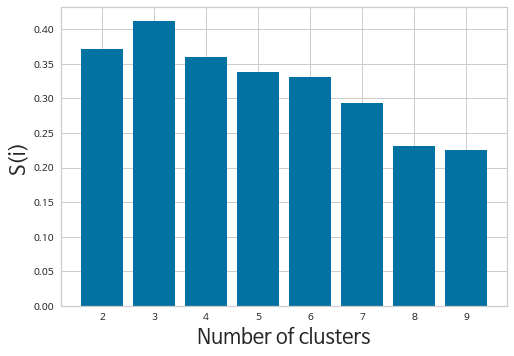

In [80]:
# 적절한 k값을 찾기 위해 Silhouette Method 사용

silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(구로_df)
    silhouette_scores.append(silhouette_score(구로_df, m1.fit_predict(구로_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [81]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)  #  Silhouette Method 사용 결과 적절한 k값 출력

Number of Cluster Required is :  3


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


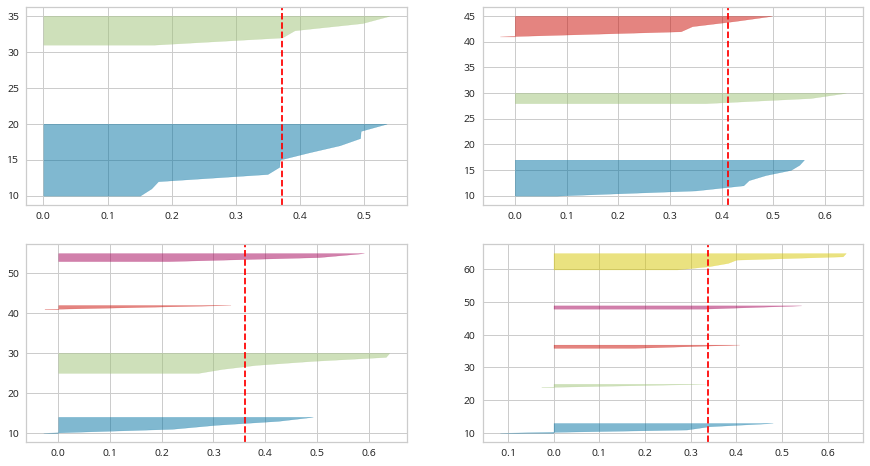

In [82]:

fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [2, 3, 4, 5]:
    # Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(구로_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


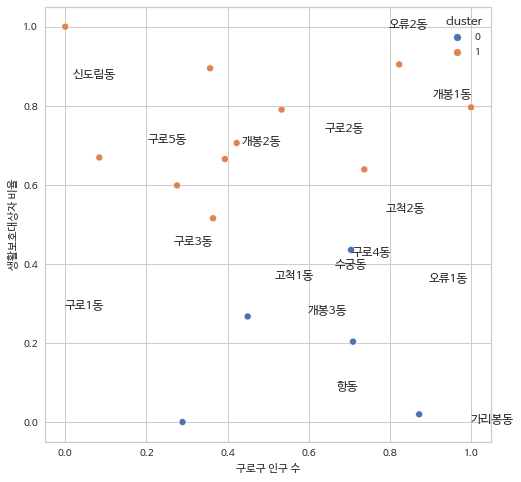

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


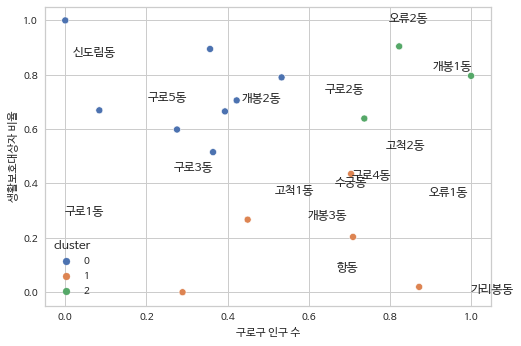

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


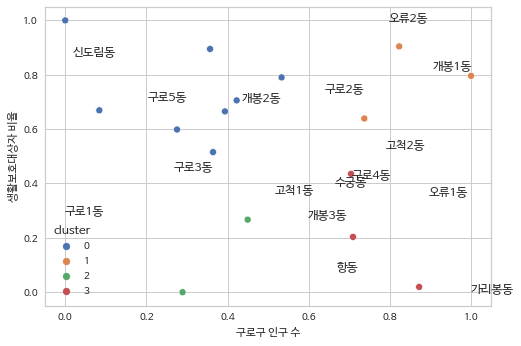

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


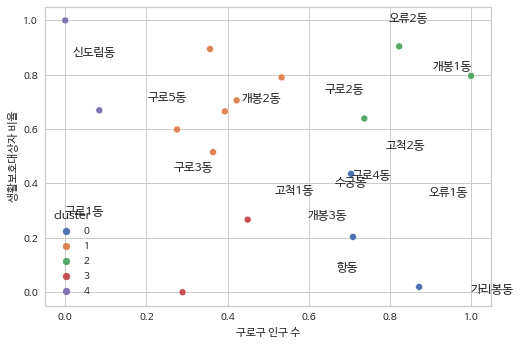

In [83]:
plt.figure(figsize = (8, 8))

for i in range(2,6):

  k = i
  model = KMeans(n_clusters = k, random_state = 10)
  model.fit(구로_df)
  구로_df['cluster'] = model.fit_predict(구로_df)

  cluster_df = pd.DataFrame()
  cluster_df['동'] = 동_df['동']
  cluster_df['인구 수'] = 구로_df['인구 수']
  cluster_df['생활보호대상자 비율'] = 구로_df['생활보호대상자 비율']
  cluster_df['cluster'] = 구로_df['cluster']

  cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})

  sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

  for index, dong, population, ratio, cluster in cluster_df.itertuples():
    plt.annotate(dong, (ratio, population))
  plt.xlabel('구로구 인구 수')
  plt.ylabel('생활보호대상자 비율')
  
  plt.show()

k=3으로 결정

In [84]:
k = 3

# 그룹 수, random_state 설정 (실행할 때마다 같은 결과가 나오도록 고정)
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(구로_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
구로_df['cluster'] = model.fit_predict(구로_df)

In [85]:
구로_df['cluster'].value_counts()  # 군집별로 몇 개의 동이 있는지 확인

0    9
1    4
2    3
Name: cluster, dtype: int64

In [86]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.54504681, 0.72329273, 1.33333333],
       [0.20564295, 0.48407221, 3.5       ],
       [0.76183378, 0.21943771, 0.        ]])

In [87]:
# 동, 정규화한 인구 수, 정규화한 생활보호대상자 비율, 클러스터 넘버를 데이터프레임으로 만들기

cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 구로_df['인구 수']
cluster_df['생활보호대상자 비율'] = 구로_df['생활보호대상자 비율']
cluster_df['cluster'] = 구로_df['cluster']
cluster_df

동      인구 수  생활보호대상자 비율  cluster
0   신도림동  0.872078    0.019501        2
1   구로1동  0.289071    0.000000        1
2   구로2동  0.736976    0.639076        0
3   구로3동  0.449514    0.267071        1
4   구로4동  0.422407    0.705713        0
5   구로5동  0.709085    0.203414        2
6   고척1동  0.364193    0.515424        0
7   고척2동  0.533108    0.790313        0
8   개봉1동  0.822846    0.904466        0
9   개봉2동  0.704339    0.435399        2
10  개봉3동  0.275420    0.598574        0
11  오류1동  0.356857    0.894852        0
12  오류2동  1.000000    0.795978        0
13   수궁동  0.393614    0.665240        0
14  가리봉동  0.000000    1.000000        1
15    항동  0.083987    0.669218        1

In [88]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

dong  population     ratio  cluster
0   신도림동    0.872078  0.019501        2
1   구로1동    0.289071  0.000000        1
2   구로2동    0.736976  0.639076        0
3   구로3동    0.449514  0.267071        1
4   구로4동    0.422407  0.705713        0
5   구로5동    0.709085  0.203414        2
6   고척1동    0.364193  0.515424        0
7   고척2동    0.533108  0.790313        0
8   개봉1동    0.822846  0.904466        0
9   개봉2동    0.704339  0.435399        2
10  개봉3동    0.275420  0.598574        0
11  오류1동    0.356857  0.894852        0
12  오류2동    1.000000  0.795978        0
13   수궁동    0.393614  0.665240        0
14  가리봉동    0.000000  1.000000        1
15    항동    0.083987  0.669218        1

In [ ]:
cluster_df.to_csv('/content/drive/MyDrive/project/15. 모델 평가/구로_cluster.csv')

#### 5-1. 군집화

In [89]:
# 클러스터별로 동 이름 출력하기

for i in range(3):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['구로2동', '구로4동', '고척1동', '고척2동', '개봉1동', '개봉3동', '오류1동', '오류2동', '수궁동']
cluster 1 :  ['구로1동', '구로3동', '가리봉동', '항동']
cluster 2 :  ['신도림동', '구로5동', '개봉2동']


#### 5-2. 클러스터별 인구수, 체육시설 수

In [90]:
# 클러스터별로 인구 수 합치기

구로_peo_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/구로구_인구수, 수급인구비율.csv', index_col=0)
구로_peo_df = 구로_peo_df[['동', '인구 수']]
구로_peo_df = 구로_peo_df.rename(columns={'동':'dong'})
구로_peo_df

dong     인구 수
0   신도림동  36494.0
1   구로1동  21632.0
2   구로2동  33050.0
3   구로3동  25722.0
4   구로4동  25031.0
5   구로5동  32339.0
6   고척1동  23547.0
7   고척2동  27853.0
8   개봉1동  35239.0
9   개봉2동  32218.0
10  개봉3동  21284.0
11  오류1동  23360.0
12  오류2동  39755.0
13   수궁동  24297.0
14  가리봉동  14263.0
15    항동  16404.0

In [91]:
df_all = pd.merge(cluster_df, 구로_peo_df, on='dong')
df_all

dong  population     ratio  cluster     인구 수
0   신도림동    0.872078  0.019501        2  36494.0
1   구로1동    0.289071  0.000000        1  21632.0
2   구로2동    0.736976  0.639076        0  33050.0
3   구로3동    0.449514  0.267071        1  25722.0
4   구로4동    0.422407  0.705713        0  25031.0
5   구로5동    0.709085  0.203414        2  32339.0
6   고척1동    0.364193  0.515424        0  23547.0
7   고척2동    0.533108  0.790313        0  27853.0
8   개봉1동    0.822846  0.904466        0  35239.0
9   개봉2동    0.704339  0.435399        2  32218.0
10  개봉3동    0.275420  0.598574        0  21284.0
11  오류1동    0.356857  0.894852        0  23360.0
12  오류2동    1.000000  0.795978        0  39755.0
13   수궁동    0.393614  0.665240        0  24297.0
14  가리봉동    0.000000  1.000000        1  14263.0
15    항동    0.083987  0.669218        1  16404.0

In [92]:
# 클러스터별로 인구 수 합계

for i in range(df_all['cluster'].nunique()):
  num = 0
  for j in range(len(df_all)):
    if df_all['cluster'][j] == i:
      num += df_all['인구 수'][j]
  print('cluster ' + str(i) + ' : ', num)

cluster 0 :  253416.0
cluster 1 :  78021.0
cluster 2 :  101051.0


In [93]:
# a+b+c=9

def prop(a, b, c):
  
  p1 = a*10000/253416
  p2 = b*10000/78021
  p3 = c*10000/101051

  return ((p1-p2)**2 + (p1-p3)**2  + (p2-p3)**2)

In [94]:
lst = []

for i, j, k in product(range(10), range(10), range(10)):
  if (i+j+k==9):
    lst.append([prop(i,j,k), (i,j,k)])

In [95]:
lst.sort()
lst

[[0.006898828225252635, (5, 2, 2)],
 [0.01816659496795537, (6, 1, 2)],
 [0.03067639835760387, (4, 2, 3)],
 [0.043157545397087604, (5, 1, 3)],
 [0.044142306466935136, (6, 2, 1)],
 [0.05419669291285686, (7, 1, 1)],
 [0.08780137965902318, (4, 3, 2)],
 [0.11036556949459342, (3, 3, 3)],
 [0.11547501686398887, (3, 2, 4)],
 [0.12160467988713142, (7, 0, 2)],
 [0.12625823819748666, (5, 3, 1)],
 [0.12916954420025356, (4, 1, 4)],
 [0.14240683308265137, (7, 2, 0)],
 [0.14780901061304463, (6, 0, 3)],
 [0.15124783923179208, (8, 1, 0)],
 [0.1564213975352519, (8, 0, 1)],
 [0.19395080770419743, (2, 3, 4)],
 [0.2257361451099839, (6, 3, 0)],
 [0.23503438971299162, (5, 0, 4)],
 [0.25225916355740613, (9, 0, 0)],
 [0.26087424926926706, (3, 4, 2)],
 [0.2612946837444075, (2, 2, 5)],
 [0.27620259137745323, (3, 1, 5)],
 [0.2822250588080564, (2, 4, 3)],
 [0.3005444881045116, (4, 4, 1)],
 [0.3385570942878351, (1, 3, 5)],
 [0.3645969167208794, (1, 4, 4)],
 [0.38328081718697227, (4, 0, 5)],
 [0.40123577531378984, (

#### **공공체육시설 입지 선정 모델 결과**
- cluster0 : '구로2동', '구로4동', '고척1동', '고척2동', '개봉1동', '개봉3동', '오류1동', '오류2동', '수궁동' (5개)
- cluster1 : '구로1동', '구로3동', '가리봉동', '항동' (2개)
- cluster2 : '신도림동', '구로5동', '개봉2동' (2개)

#### **2020년 기준 서대문구 공공체육시설 설치 개수**
- cluster0 : 구로2동(1개) + 구로4동(0개) + 고척1동(1개) + 고척2동(1개) + 개봉1동(0개) + 개봉3동(1개) + 오류1동(0개) + 오류2동(1개) + 수궁동(1개) = 5개
- cluster1 : 구로1동(0개) + 구로3동(2개) + 가리봉동(0개) + 항동(1개) = 3개
- cluster2 : 신도림동(1개) + 구로5동(1개) + 개봉2동(0개) = 2개

### 6. 송파구

In [96]:
# 동별 정규화한 인구수, 정규화한 생활보호대상자 비율 데이터 불러오기

송파_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/송파구_인구수, 수급인구비율.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] =송파_df['동']
송파_df = 송파_df.iloc[:,2:]
송파_df = 송파_df.rename(columns={'인구수_scaled':'인구 수', '수급인구비율_scaled':'생활보호대상자 비율'})
송파_df

인구 수  생활보호대상자 비율
0   0.157299    0.465521
1   0.530825    0.271603
2   0.106635    0.594410
3   0.316714    0.521952
4   0.336167    1.000000
5   0.329783    0.925694
6   0.214850    0.250514
7   0.563481    0.359906
8   0.288661    0.000000
9   1.000000    0.488571
10  0.513590    0.268570
11  0.366101    0.206298
12  0.781556    0.378369
13  0.736973    0.419289
14  0.586763    0.289095
15  0.603830    0.037107
16  0.782832    0.208739
17  0.368386    0.230410
18  0.659970    0.032781
19  0.687620    0.584035
20  0.644717    0.371563
21  0.884025    0.000894
22  0.859869    0.008376
23  0.399630    0.005259
24  0.250731    0.021416
25  0.000000    0.003365
26  0.687485    0.221360

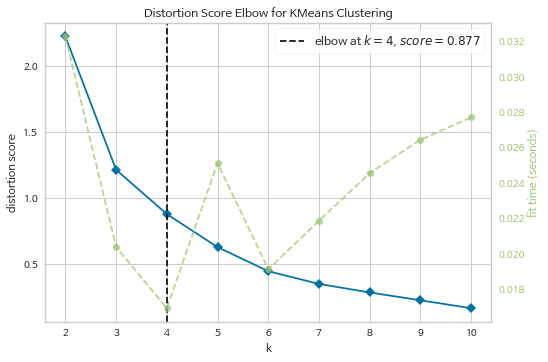

In [97]:
# 적절한 k값을 찾기 위해 Elbow Method 사용

km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(송파_df)
Elbow_M.show()

plt.show()

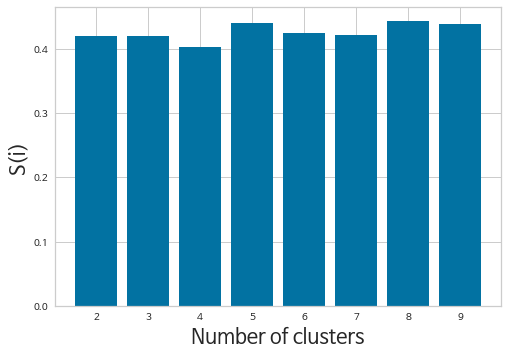

In [98]:
# 적절한 k값을 찾기 위해 Silhouette Method 사용

silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(송파_df)
    silhouette_scores.append(silhouette_score(송파_df, m1.fit_predict(송파_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [99]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)  #  Silhouette Method 사용 결과 적절한 k값 출력

Number of Cluster Required is :  8


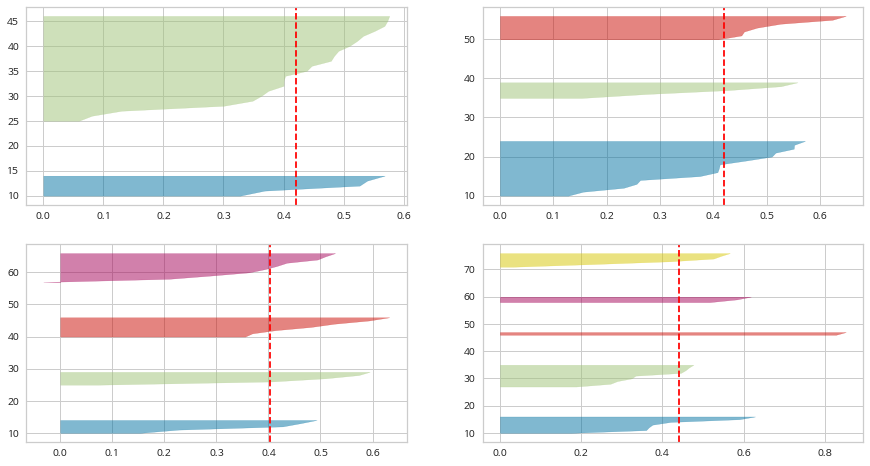

In [100]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [2, 3, 4, 5]:
    # Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(송파_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


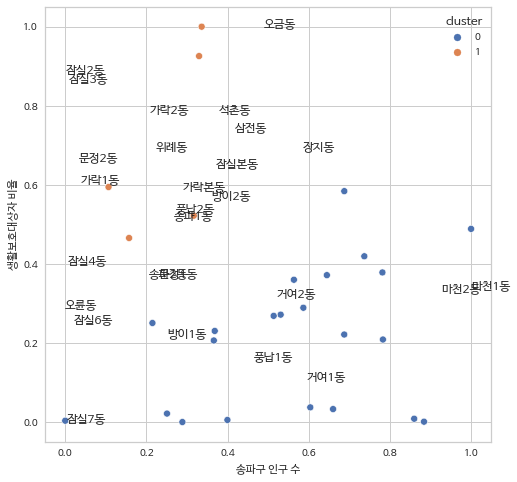

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


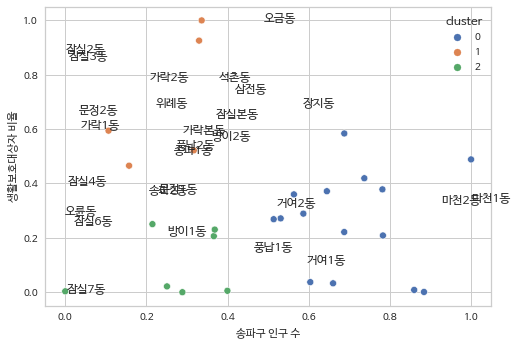

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


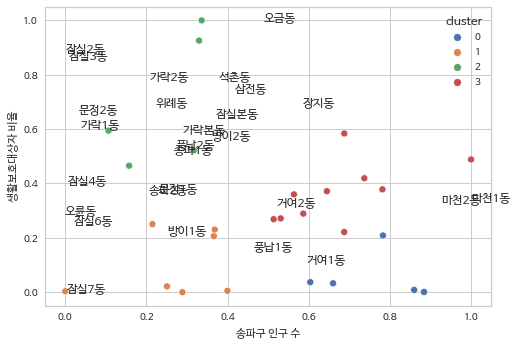

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


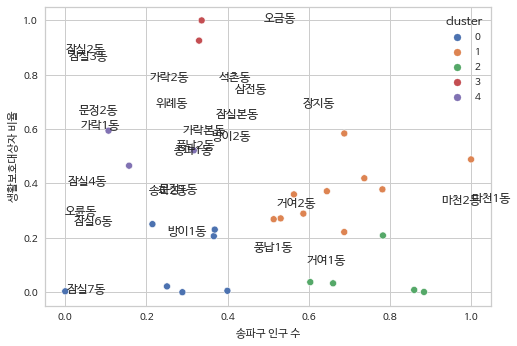

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


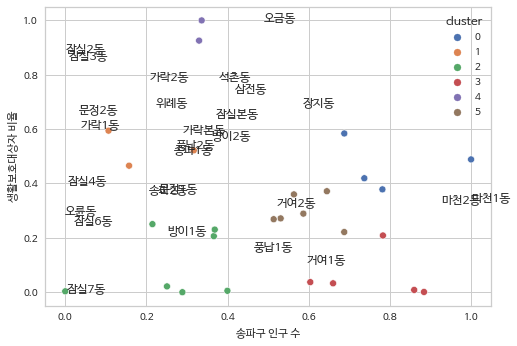

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


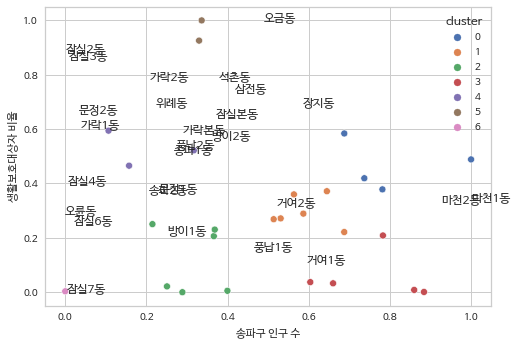

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


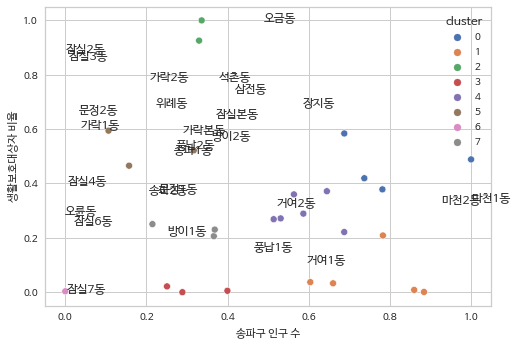

In [101]:
plt.figure(figsize = (8, 8))

for i in range(2,9):

  k = i
  model = KMeans(n_clusters = k, random_state = 10)
  model.fit(송파_df)
  송파_df['cluster'] = model.fit_predict(송파_df)

  cluster_df = pd.DataFrame()
  cluster_df['동'] = 동_df['동']
  cluster_df['인구 수'] = 송파_df['인구 수']
  cluster_df['생활보호대상자 비율'] = 송파_df['생활보호대상자 비율']
  cluster_df['cluster'] = 송파_df['cluster']

  cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})

  sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

  for index, dong, population, ratio, cluster in cluster_df.itertuples():
    plt.annotate(dong, (ratio, population))
  plt.xlabel('송파구 인구 수')
  plt.ylabel('생활보호대상자 비율')
  
  plt.show()

k=4로 결정

In [102]:
k = 4

# 그룹 수, random_state 설정 (실행할 때마다 같은 결과가 나오도록 고정)
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(송파_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
송파_df['cluster'] = model.fit_predict(송파_df)


In [103]:
송파_df['cluster'].value_counts()  # 군집별로 몇 개의 동이 있는지 확인

2    9
3    9
0    5
1    4
Name: cluster, dtype: int64

In [104]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.32099446, 0.39047392, 2.6       ],
       [0.23733412, 0.17264698, 6.75      ],
       [0.45638987, 0.37377557, 4.33333333],
       [0.77740822, 0.23979574, 0.55555556]])

In [105]:
# 동, 정규화한 인구 수, 정규화한 생활보호대상자 비율, 클러스터 넘버를 데이터프레임으로 만들기

cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 송파_df['인구 수']
cluster_df['생활보호대상자 비율'] = 송파_df['생활보호대상자 비율']
cluster_df['cluster'] = 송파_df['cluster']
cluster_df

동      인구 수  생활보호대상자 비율  cluster
0   풍납1동  0.157299    0.465521        2
1   풍납2동  0.530825    0.271603        2
2   거여1동  0.106635    0.594410        2
3   거여2동  0.316714    0.521952        2
4   마천1동  0.336167    1.000000        0
5   마천2동  0.329783    0.925694        0
6   방이1동  0.214850    0.250514        1
7   방이2동  0.563481    0.359906        2
8    오륜동  0.288661    0.000000        0
9    오금동  1.000000    0.488571        3
10  송파1동  0.513590    0.268570        2
11  송파2동  0.366101    0.206298        1
12   석촌동  0.781556    0.378369        3
13   삼전동  0.736973    0.419289        3
14  가락본동  0.586763    0.289095        2
15  가락1동  0.603830    0.037107        3
16  가락2동  0.782832    0.208739        3
17  문정1동  0.368386    0.230410        1
18  문정2동  0.659970    0.032781        3
19   장지동  0.687620    0.584035        3
20  잠실본동  0.644717    0.371563        2
21  잠실2동  0.884025    0.000894        3
22  잠실3동  0.859869    0.008376        3
23  잠실4동  0.399630    0.005259        0
24  잠실6동  0.250731    0.021416        0
25  잠실7동  0.000000    0.003365        1
26   위례동  0.687485    0.221360        2

In [106]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

dong  population     ratio  cluster
0   풍납1동    0.157299  0.465521        2
1   풍납2동    0.530825  0.271603        2
2   거여1동    0.106635  0.594410        2
3   거여2동    0.316714  0.521952        2
4   마천1동    0.336167  1.000000        0
5   마천2동    0.329783  0.925694        0
6   방이1동    0.214850  0.250514        1
7   방이2동    0.563481  0.359906        2
8    오륜동    0.288661  0.000000        0
9    오금동    1.000000  0.488571        3
10  송파1동    0.513590  0.268570        2
11  송파2동    0.366101  0.206298        1
12   석촌동    0.781556  0.378369        3
13   삼전동    0.736973  0.419289        3
14  가락본동    0.586763  0.289095        2
15  가락1동    0.603830  0.037107        3
16  가락2동    0.782832  0.208739        3
17  문정1동    0.368386  0.230410        1
18  문정2동    0.659970  0.032781        3
19   장지동    0.687620  0.584035        3
20  잠실본동    0.644717  0.371563        2
21  잠실2동    0.884025  0.000894        3
22  잠실3동    0.859869  0.008376        3
23  잠실4동    0.399630  0.005259        0
24  잠실6동    0.250731  0.021416        0
25  잠실7동    0.000000  0.003365        1
26   위례동    0.687485  0.221360        2

In [ ]:
cluster_df.to_csv('/content/drive/MyDrive/project/15. 모델 평가/송파_cluster.csv')

#### 6-1. 군집화

In [107]:
# 클러스터별로 동 이름 출력하기

for i in range(4):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['마천1동', '마천2동', '오륜동', '잠실4동', '잠실6동']
cluster 1 :  ['방이1동', '송파2동', '문정1동', '잠실7동']
cluster 2 :  ['풍납1동', '풍납2동', '거여1동', '거여2동', '방이2동', '송파1동', '가락본동', '잠실본동', '위례동']
cluster 3 :  ['오금동', '석촌동', '삼전동', '가락1동', '가락2동', '문정2동', '장지동', '잠실2동', '잠실3동']


#### 6-2. 클러스터별 인구수, 체육시설 수

In [108]:
# 클러스터별로 인구 수 합치기

송파_peo_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/송파구_인구수, 수급인구비율.csv', index_col=0)
송파_peo_df = 송파_peo_df[['동', '인구 수']]
송파_peo_df = 송파_peo_df.rename(columns={'동':'dong'})
송파_peo_df

dong     인구 수
0   풍납1동  14585.0
1   풍납2동  25703.0
2   거여1동  13077.0
3   거여2동  19330.0
4   마천1동  19909.0
5   마천2동  19719.0
6   방이1동  16298.0
7   방이2동  26675.0
8    오륜동  18495.0
9    오금동  39668.0
10  송파1동  25190.0
11  송파2동  20800.0
12   석촌동  33166.0
13   삼전동  31839.0
14  가락본동  27368.0
15  가락1동  27876.0
16  가락2동  33204.0
17  문정1동  20868.0
18  문정2동  29547.0
19   장지동  30370.0
20  잠실본동  29093.0
21  잠실2동  36216.0
22  잠실3동  35497.0
23  잠실4동  21798.0
24  잠실6동  17366.0
25  잠실7동   9903.0
26   위례동  30366.0

In [109]:
df_all = pd.merge(cluster_df, 송파_peo_df, on='dong')
df_all

dong  population     ratio  cluster     인구 수
0   풍납1동    0.157299  0.465521        2  14585.0
1   풍납2동    0.530825  0.271603        2  25703.0
2   거여1동    0.106635  0.594410        2  13077.0
3   거여2동    0.316714  0.521952        2  19330.0
4   마천1동    0.336167  1.000000        0  19909.0
5   마천2동    0.329783  0.925694        0  19719.0
6   방이1동    0.214850  0.250514        1  16298.0
7   방이2동    0.563481  0.359906        2  26675.0
8    오륜동    0.288661  0.000000        0  18495.0
9    오금동    1.000000  0.488571        3  39668.0
10  송파1동    0.513590  0.268570        2  25190.0
11  송파2동    0.366101  0.206298        1  20800.0
12   석촌동    0.781556  0.378369        3  33166.0
13   삼전동    0.736973  0.419289        3  31839.0
14  가락본동    0.586763  0.289095        2  27368.0
15  가락1동    0.603830  0.037107        3  27876.0
16  가락2동    0.782832  0.208739        3  33204.0
17  문정1동    0.368386  0.230410        1  20868.0
18  문정2동    0.659970  0.032781        3  29547.0
19   장지동    0.687620  0.584035        3  30370.0
20  잠실본동    0.644717  0.371563        2  29093.0
21  잠실2동    0.884025  0.000894        3  36216.0
22  잠실3동    0.859869  0.008376        3  35497.0
23  잠실4동    0.399630  0.005259        0  21798.0
24  잠실6동    0.250731  0.021416        0  17366.0
25  잠실7동    0.000000  0.003365        1   9903.0
26   위례동    0.687485  0.221360        2  30366.0

In [110]:
# 클러스터별로 인구 수 합계

for i in range(df_all['cluster'].nunique()):
  num = 0
  for j in range(len(df_all)):
    if df_all['cluster'][j] == i:
      num += df_all['인구 수'][j]
  print('cluster ' + str(i) + ' : ', num)

cluster 0 :  97287.0
cluster 1 :  67869.0
cluster 2 :  211387.0
cluster 3 :  297383.0


In [111]:
# a+b+c+d=14

def prop(a, b, c, d):
  
  p1 = a*10000/97287
  p2 = b*10000/67869
  p3 = c*10000/211387
  p4 = d*10000/297383

  return ((p1-p2)**2 + (p1-p3)**2 + (p1-p4)**2 + (p2-p3)**2 + (p2-p4)**2 + (p3-p4)**2)

In [112]:
lst = []

for i, j, k, l in product(range(15), range(15), range(15), range(15)):
  if (i+j+k+l==14):
    lst.append([prop(i,j,k,l), (i,j,k,l)])

In [113]:
lst.sort()
lst

[[0.016183991916202203, (2, 1, 4, 7)],
 [0.016489419154215368, (2, 1, 5, 6)],
 [0.02813596627726045, (2, 2, 4, 6)],
 [0.03437616328608993, (2, 2, 5, 5)],
 [0.04245362156577955, (2, 1, 3, 8)],
 [0.043369903279819016, (2, 1, 6, 5)],
 [0.04847082615602147, (2, 2, 3, 7)],
 [0.05316282260274802, (1, 1, 5, 7)],
 [0.056360152697571185, (3, 1, 4, 6)],
 [0.060011156741521514, (1, 1, 4, 8)],
 [0.061628500999403306, (3, 2, 4, 5)],
 [0.06381934131237099, (3, 1, 5, 5)],
 [0.0671914171825099, (2, 2, 6, 4)],
 [0.07288954535156501, (1, 1, 6, 6)],
 [0.07480959950137767, (3, 2, 3, 6)],
 [0.07502245938501942, (3, 2, 5, 4)],
 [0.07547602097036187, (3, 1, 3, 7)],
 [0.07773319279384872, (1, 2, 5, 6)],
 [0.0786467571618059, (1, 2, 4, 7)],
 [0.09343454776788551, (1, 1, 3, 9)],
 [0.09529830810294737, (2, 1, 2, 9)],
 [0.095380742922373, (2, 2, 2, 8)],
 [0.09682544429301321, (2, 1, 7, 4)],
 [0.09785358681476128, (3, 1, 6, 4)],
 [0.10339468531348206, (1, 2, 6, 5)],
 [0.1061353784173536, (1, 2, 3, 8)],
 [0.1145657

#### **공공체육시설 입지 선정 모델 결과**
- cluster0 : '마천1동', '마천2동', '오륜동', '잠실4동', '잠실6동' (2개)
- cluster1 : '방이1동', '송파2동', '문정1동', '잠실7동' (1개)
- cluster2 : '풍납1동', '풍납2동', '거여1동', '거여2동', '방이2동', '송파1동', '가락본동', '잠실본동', '위례동' (4개)
- cluster3 : '오금동', '석촌동', '삼전동', '가락1동', '가락2동', '문정2동', '장지동', '잠실2동', '잠실3동' (7개)

#### **2020년 기준 서대문구 공공체육시설 설치 개수**
- cluster0 : 마천1동(1개) + 마천2동(0개) + 오륜동(2개) + 잠실4동(0개) + 잠실6동(2개) = 5개
- cluster1 : 방이1동(0개) + 송파2동(0개) + 문정1동(1개) + 잠실7동(0개) = 1개
- cluster2 : 풍납1동(0개) + 풍납2동(0개) + 거여1동(2개) + 거여2동(0개) + 방이2동(1개) + 송파1동(0개) + 가락본동(1개) + 잠실본동(0개) + 위례동(0개) = 4개
- cluster3 : 오금동(1개) + 석촌동(0개) + 삼전동(0개) + 가락1동(0개) + 가락2동(0개) + 문정2동(1개) + 장지동(1개) + 잠실2동(4개) + 잠실3동(2개) = 9개

### 7. 강남구

In [114]:
# 동별 정규화한 인구수, 정규화한 생활보호대상자 비율 데이터 불러오기

강남_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/강남구_인구수, 수급인구비율.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] =강남_df['동']
강남_df = 강남_df.iloc[:,2:]
강남_df = 강남_df.rename(columns={'인구수_scaled':'인구 수', '수급인구비율_scaled':'생활보호대상자 비율'})
강남_df

인구 수  생활보호대상자 비율
0   0.270969    0.052488
1   0.496125    0.033705
2   0.451369    0.146521
3   0.405423    0.096038
4   0.183309    0.046273
5   0.626848    0.068724
6   0.482793    0.000000
7   0.822166    0.016618
8   0.372279    0.120814
9   0.796217    0.109162
10  0.809972    0.062547
11  0.411506    0.027336
12  0.724031    0.006279
13  0.000000    0.104511
14  0.413358    0.032346
15  0.425737    0.133945
16  0.456950    0.018576
17  0.242217    0.481451
18  0.291998    0.325674
19  0.228250    1.000000
20  1.000000    0.228744
21  0.549398    0.018689
22  0.544796    0.034493

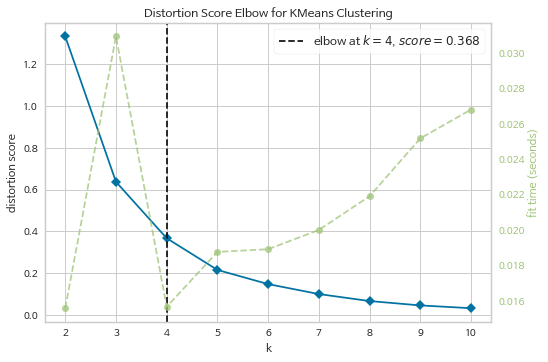

In [115]:
# 적절한 k값을 찾기 위해 Elbow Method 사용

km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(강남_df)
Elbow_M.show()

plt.show()

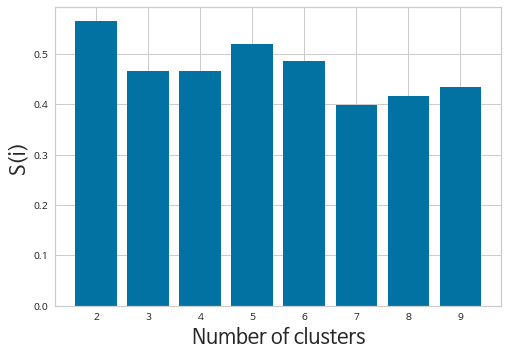

In [116]:
# 적절한 k값을 찾기 위해 Silhouette Method 사용

silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(강남_df)
    silhouette_scores.append(silhouette_score(강남_df, m1.fit_predict(강남_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [117]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)  #  Silhouette Method 사용 결과 적절한 k값 출력

Number of Cluster Required is :  2


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


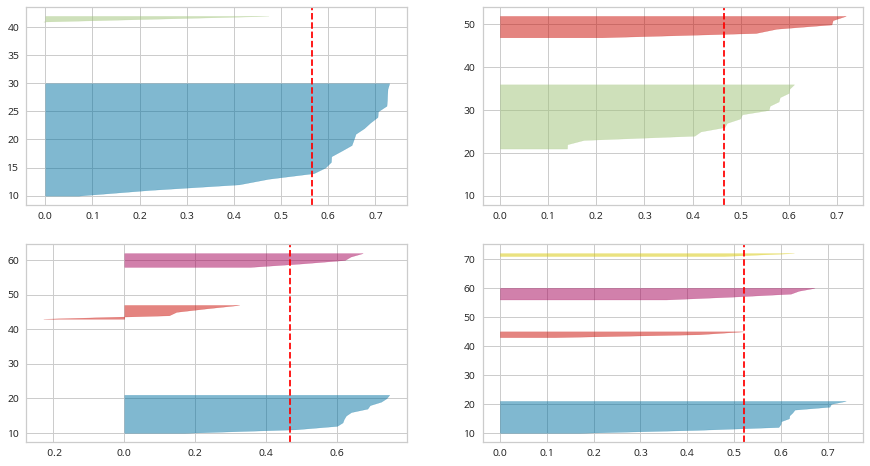

In [118]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [2, 3, 4, 5]:
    # Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(강남_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


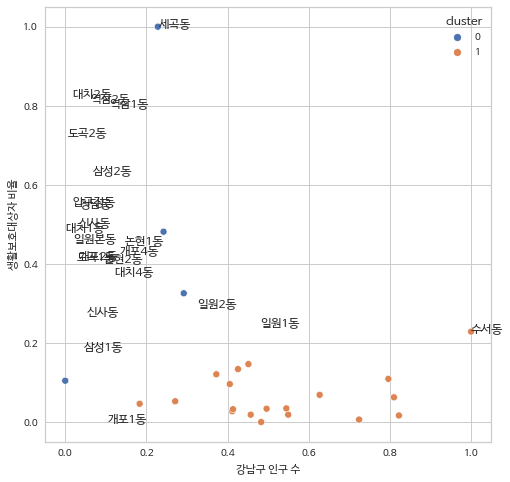

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


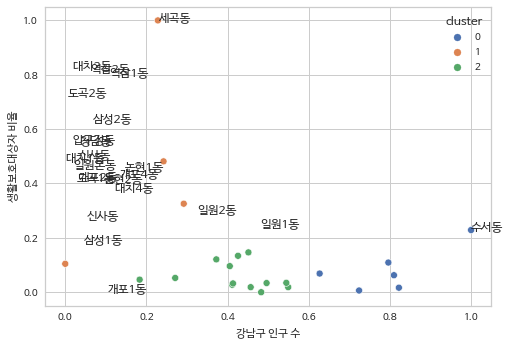

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


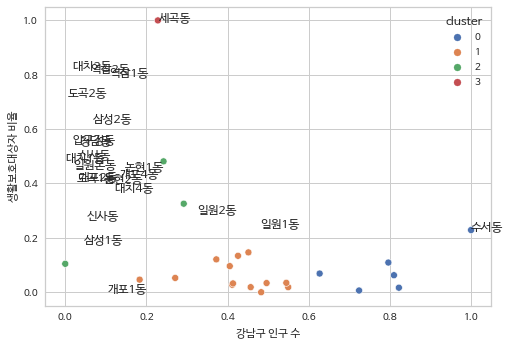

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


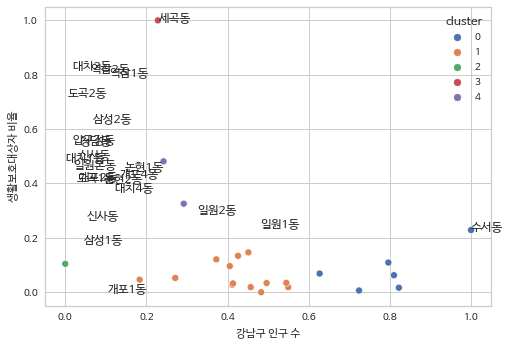

In [119]:
plt.figure(figsize = (8, 8))

for i in range(2,6):

  k = i
  model = KMeans(n_clusters = k, random_state = 10)
  model.fit(강남_df)
  강남_df['cluster'] = model.fit_predict(강남_df)

  cluster_df = pd.DataFrame()
  cluster_df['동'] = 동_df['동']
  cluster_df['인구 수'] = 강남_df['인구 수']
  cluster_df['생활보호대상자 비율'] = 강남_df['생활보호대상자 비율']
  cluster_df['cluster'] = 강남_df['cluster']

  cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})

  sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

  for index, dong, population, ratio, cluster in cluster_df.itertuples():
    plt.annotate(dong, (ratio, population))
  plt.xlabel('강남구 인구 수')
  plt.ylabel('생활보호대상자 비율')
  
  plt.show()

k=4

In [120]:
k = 4

# 그룹 수, random_state 설정 (실행할 때마다 같은 결과가 나오도록 고정)
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(강남_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
강남_df['cluster'] = model.fit_predict(강남_df)

In [121]:
강남_df['cluster'].value_counts()  # 군집별로 몇 개의 동이 있는지 확인

1    13
2     6
0     3
3     1
Name: cluster, dtype: int64

In [122]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[2.54155094e-01, 6.02374921e-01, 3.66666667e+00],
       [4.20308669e-01, 5.85557971e-02, 1.00000000e+00],
       [7.96539258e-01, 8.20122582e-02, 2.22044605e-16],
       [0.00000000e+00, 1.04511195e-01, 2.00000000e+00]])

In [123]:
# 동, 정규화한 인구 수, 정규화한 생활보호대상자 비율, 클러스터 넘버를 데이터프레임으로 만들기

cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 강남_df['인구 수']
cluster_df['생활보호대상자 비율'] = 강남_df['생활보호대상자 비율']
cluster_df['cluster'] = 강남_df['cluster']
cluster_df

동      인구 수  생활보호대상자 비율  cluster
0    신사동  0.270969    0.052488        1
1    신사동  0.496125    0.033705        1
2   논현1동  0.451369    0.146521        1
3   논현2동  0.405423    0.096038        1
4   삼성1동  0.183309    0.046273        1
5   삼성2동  0.626848    0.068724        2
6   대치1동  0.482793    0.000000        1
7   대치2동  0.822166    0.016618        2
8   대치4동  0.372279    0.120814        1
9   역삼1동  0.796217    0.109162        2
10  역삼2동  0.809972    0.062547        2
11  도곡1동  0.411506    0.027336        1
12  도곡2동  0.724031    0.006279        2
13  개포1동  0.000000    0.104511        3
14  개포2동  0.413358    0.032346        1
15  개포4동  0.425737    0.133945        1
16  일원본동  0.456950    0.018576        1
17  일원1동  0.242217    0.481451        0
18  일원2동  0.291998    0.325674        0
19   수서동  0.228250    1.000000        0
20   세곡동  1.000000    0.228744        2
21  압구정동  0.549398    0.018689        1
22   청담동  0.544796    0.034493        1

In [124]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

dong  population     ratio  cluster
0    신사동    0.270969  0.052488        1
1    신사동    0.496125  0.033705        1
2   논현1동    0.451369  0.146521        1
3   논현2동    0.405423  0.096038        1
4   삼성1동    0.183309  0.046273        1
5   삼성2동    0.626848  0.068724        2
6   대치1동    0.482793  0.000000        1
7   대치2동    0.822166  0.016618        2
8   대치4동    0.372279  0.120814        1
9   역삼1동    0.796217  0.109162        2
10  역삼2동    0.809972  0.062547        2
11  도곡1동    0.411506  0.027336        1
12  도곡2동    0.724031  0.006279        2
13  개포1동    0.000000  0.104511        3
14  개포2동    0.413358  0.032346        1
15  개포4동    0.425737  0.133945        1
16  일원본동    0.456950  0.018576        1
17  일원1동    0.242217  0.481451        0
18  일원2동    0.291998  0.325674        0
19   수서동    0.228250  1.000000        0
20   세곡동    1.000000  0.228744        2
21  압구정동    0.549398  0.018689        1
22   청담동    0.544796  0.034493        1

In [ ]:
cluster_df.to_csv('/content/drive/MyDrive/project/15. 모델 평가/강남_cluster.csv')

#### 7-1. 군집화

In [125]:
# 클러스터별로 동 이름 출력하기

for i in range(4):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['일원1동', '일원2동', '수서동']
cluster 1 :  ['신사동', '신사동', '논현1동', '논현2동', '삼성1동', '대치1동', '대치4동', '도곡1동', '개포2동', '개포4동', '일원본동', '압구정동', '청담동']
cluster 2 :  ['삼성2동', '대치2동', '역삼1동', '역삼2동', '도곡2동', '세곡동']
cluster 3 :  ['개포1동']


#### 7-2. 클러스터별 인구수, 체육시설 수

In [126]:
# 클러스터별로 인구 수 합치기

강남_peo_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/강남구_인구수, 수급인구비율.csv', index_col=0)
강남_peo_df = 강남_peo_df[['동', '인구 수']]
강남_peo_df = 강남_peo_df.rename(columns={'동':'dong'})
강남_peo_df

dong     인구 수
0    신사동  16914.0
1    신사동  25426.0
2   논현1동  23734.0
3   논현2동  21997.0
4   삼성1동  13600.0
5   삼성2동  30368.0
6   대치1동  24922.0
7   대치2동  37752.0
8   대치4동  20744.0
9   역삼1동  36771.0
10  역삼2동  37291.0
11  도곡1동  22227.0
12  도곡2동  34042.0
13  개포1동   6670.0
14  개포2동  22297.0
15  개포4동  22765.0
16  일원본동  23945.0
17  일원1동  15827.0
18  일원2동  17709.0
19   수서동  15299.0
20   세곡동  44475.0
21  압구정동  27440.0
22   청담동  27266.0

In [127]:
df_all = pd.merge(cluster_df, 강남_peo_df, on='dong')
df_all

dong  population     ratio  cluster     인구 수
0    신사동    0.270969  0.052488        1  16914.0
1    신사동    0.270969  0.052488        1  25426.0
2    신사동    0.496125  0.033705        1  16914.0
3    신사동    0.496125  0.033705        1  25426.0
4   논현1동    0.451369  0.146521        1  23734.0
5   논현2동    0.405423  0.096038        1  21997.0
6   삼성1동    0.183309  0.046273        1  13600.0
7   삼성2동    0.626848  0.068724        2  30368.0
8   대치1동    0.482793  0.000000        1  24922.0
9   대치2동    0.822166  0.016618        2  37752.0
10  대치4동    0.372279  0.120814        1  20744.0
11  역삼1동    0.796217  0.109162        2  36771.0
12  역삼2동    0.809972  0.062547        2  37291.0
13  도곡1동    0.411506  0.027336        1  22227.0
14  도곡2동    0.724031  0.006279        2  34042.0
15  개포1동    0.000000  0.104511        3   6670.0
16  개포2동    0.413358  0.032346        1  22297.0
17  개포4동    0.425737  0.133945        1  22765.0
18  일원본동    0.456950  0.018576        1  23945.0
19  일원1동    0.242217  0.481451        0  15827.0
20  일원2동    0.291998  0.325674        0  17709.0
21   수서동    0.228250  1.000000        0  15299.0
22   세곡동    1.000000  0.228744        2  44475.0
23  압구정동    0.549398  0.018689        1  27440.0
24   청담동    0.544796  0.034493        1  27266.0

In [128]:
# 클러스터별로 인구 수 합계

for i in range(df_all['cluster'].nunique()):
  num = 0
  for j in range(len(df_all)):
    if df_all['cluster'][j] == i:
      num += df_all['인구 수'][j]
  print('cluster ' + str(i) + ' : ', num)

cluster 0 :  48835.0
cluster 1 :  335617.0
cluster 2 :  220699.0
cluster 3 :  6670.0


In [129]:
# a+b+c+d=12

def prop(a, b, c, d):
  
  p1 = a*10000/48835
  p2 = b*10000/335617
  p3 = c*10000/220699
  p4 = d*10000/6670

  return ((p1-p2)**2 + (p1-p3)**2 + (p1-p4)**2 + (p2-p3)**2 + (p2-p4)**2 + (p3-p4)**2)

In [130]:
lst = []

for i, j, k, l in product(range(13), range(13), range(13), range(13)):
  if (i+j+k+l==12):
    lst.append([prop(i,j,k,l), (i,j,k,l)])

In [131]:
lst.sort()
lst

[[0.11959681367272104, (1, 7, 4, 0)],
 [0.1286509691904826, (1, 6, 5, 0)],
 [0.13358798604343677, (1, 8, 3, 0)],
 [0.16075045259672144, (1, 5, 6, 0)],
 [0.1706244863026298, (1, 9, 2, 0)],
 [0.18259838745274232, (0, 8, 4, 0)],
 [0.18997957580147462, (0, 7, 5, 0)],
 [0.1982625269924873, (0, 9, 3, 0)],
 [0.21589526389143757, (1, 4, 7, 0)],
 [0.2204060920386842, (0, 6, 6, 0)],
 [0.23070631445030002, (1, 10, 1, 0)],
 [0.23697199442070957, (0, 10, 2, 0)],
 [0.27387793616437106, (0, 5, 7, 0)],
 [0.29408540307463094, (1, 3, 8, 0)],
 [0.29872678973740907, (0, 11, 1, 0)],
 [0.3138334704864476, (1, 11, 0, 0)],
 [0.3379147297837983, (2, 6, 4, 0)],
 [0.3486418524705891, (2, 5, 5, 0)],
 [0.35023293498548475, (2, 7, 3, 0)],
 [0.3503951081785352, (0, 4, 8, 0)],
 [0.3824143030458571, (2, 4, 6, 0)],
 [0.3835269129425859, (0, 12, 0, 0)],
 [0.3855964680756484, (2, 8, 2, 0)],
 [0.3953208701463017, (1, 2, 9, 0)],
 [0.43923208150960263, (2, 3, 7, 0)],
 [0.44400532905428947, (2, 9, 1, 0)],
 [0.449957608081176

#### **공공체육시설 입지 선정 모델 결과**
- cluster0 : '일원1동', '일원2동', '수서동' (1개)
- cluster1 : '신사동', '신사동', '논현1동', '논현2동', '삼성1동', '대치1동', '대치4동', '도곡1동', '개포2동', '개포4동', '일원본동', '압구정동', '청담동' (7개)
- cluster2 : '삼성2동', '대치2동', '역삼1동', '역삼2동', '도곡2동', '세곡동' (4개)
- cluster3 : '개포1동' (0개)

#### **2020년 기준 서대문구 공공체육시설 설치 개수**
- cluster0 : 일원1동(2개) + 일원2동(3개) + 수서동(2개) = 6개
- cluster1 : 신사동(2개) + 논현1동(1개) + 논현2동(1개) + 삼성1동(3개) + 대치1동(0개) + 대치4동(2개) + 도곡1동(1개) + 개포2동(0개) + 개포4동(1개) + 일원본동(1개) + 압구정동(2개) + 청담동(3개) = 17개
- cluster2 : 삼성2동(0개) + 대치2동(2개) + 역삼1동(2개) + 역삼2동(3개) + 도곡2동(2개) + 세곡동(0개) = 9개
- cluster3 : 개포1동(0개) = 0개

### 8. 광진구

In [ ]:
# 동별 정규화한 인구수, 정규화한 생활보호대상자 비율 데이터 불러오기

광진_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/광진구_인구수, 수급인구비율.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] =광진_df['동']
광진_df = 광진_df.iloc[:,2:]
광진_df = 광진_df.rename(columns={'인구수_scaled':'인구 수', '수급인구비율_scaled':'생활보호대상자 비율'})
광진_df

인구 수  생활보호대상자 비율
0   0.574876    0.282145
1   0.421412    0.523713
2   0.180418    0.769007
3   0.437526    0.533419
4   0.210453    1.000000
5   0.755167    0.702302
6   0.000000    0.339497
7   0.455032    0.561281
8   0.655151    0.543070
9   0.745592    0.191942
10  1.000000    0.000000
11  0.497638    0.728769
12  0.594913    0.389766
13  0.718974    0.092464
14  0.405509    0.580504

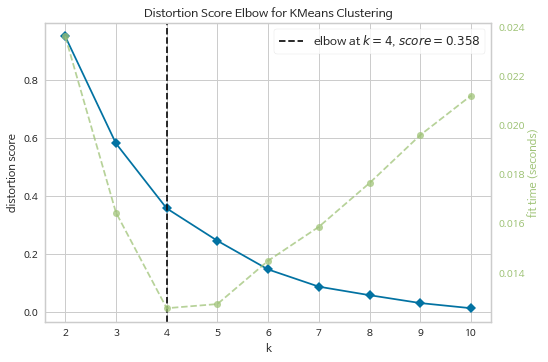

In [ ]:
# 적절한 k값을 찾기 위해 Elbow Method 사용

km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(광진_df)
Elbow_M.show()

plt.show()

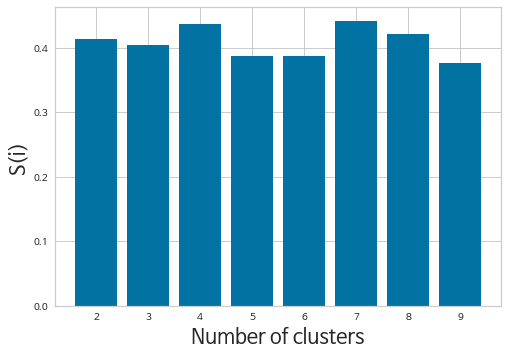

In [ ]:
# 적절한 k값을 찾기 위해 Silhouette Method 사용

silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(광진_df)
    silhouette_scores.append(silhouette_score(광진_df, m1.fit_predict(광진_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [ ]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)  #  Silhouette Method 사용 결과 적절한 k값 출력

Number of Cluster Required is :  7


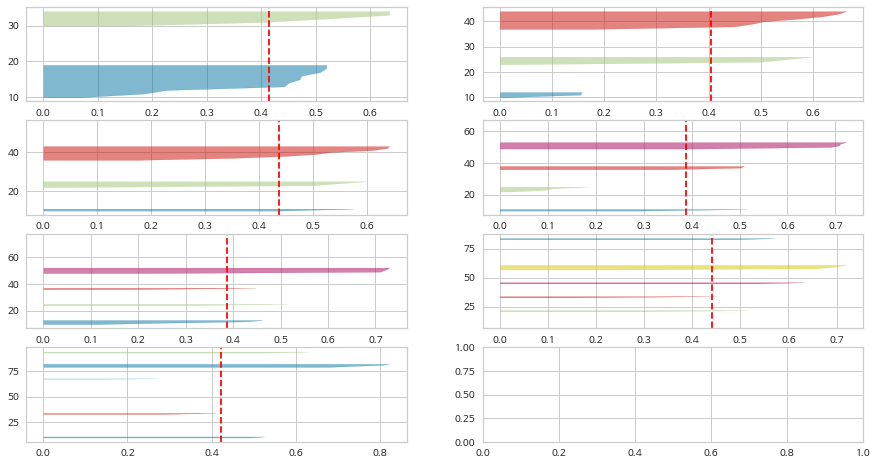

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(15,8))

for i in [2, 3, 4, 5, 6, 7, 8]:
    # Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(광진_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


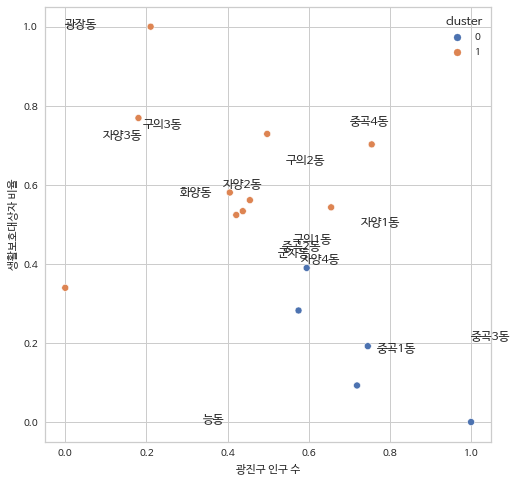

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


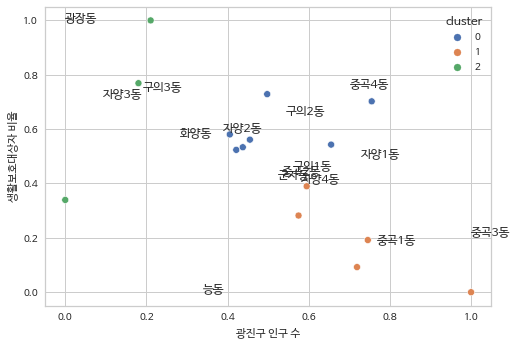

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


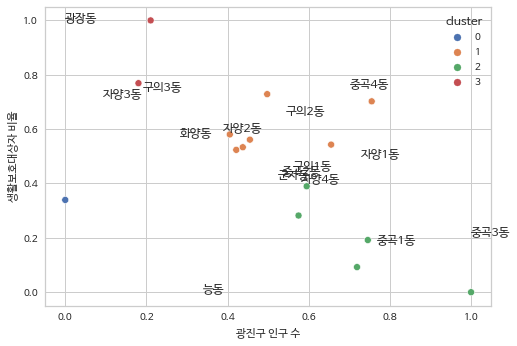

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


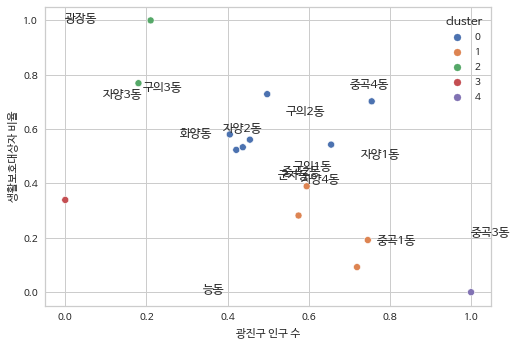

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


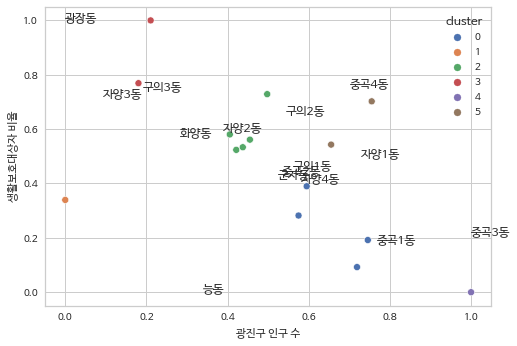

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


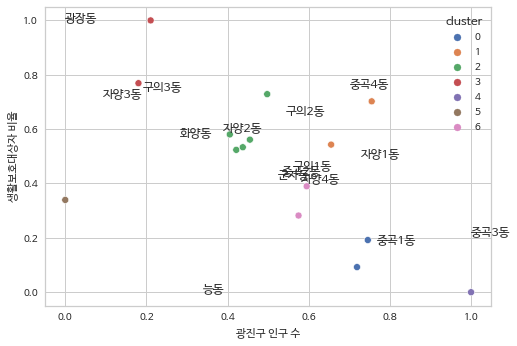

In [ ]:
plt.figure(figsize = (8, 8))

for i in range(2,8):

  k = i
  model = KMeans(n_clusters = k, random_state = 10)
  model.fit(광진_df)
  광진_df['cluster'] = model.fit_predict(광진_df)

  cluster_df = pd.DataFrame()
  cluster_df['동'] = 동_df['동']
  cluster_df['인구 수'] = 광진_df['인구 수']
  cluster_df['생활보호대상자 비율'] = 광진_df['생활보호대상자 비율']
  cluster_df['cluster'] = 광진_df['cluster']

  cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})

  sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

  for index, dong, population, ratio, cluster in cluster_df.itertuples():
    plt.annotate(dong, (ratio, population))
  plt.xlabel('광진구 인구 수')
  plt.ylabel('생활보호대상자 비율')
  
  plt.show()

k=4로 결정

In [ ]:
k = 4

# 그룹 수, random_state 설정 (실행할 때마다 같은 결과가 나오도록 고정)
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(광진_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
광진_df['cluster'] = model.fit_predict(광진_df)

In [ ]:
광진_df['cluster'].value_counts()  # 군집별로 몇 개의 동이 있는지 확인

2    7
0    4
1    3
3    1
Name: cluster, dtype: int64

In [ ]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.718721  , 0.38244454, 0.5       ],
       [0.38992941, 0.33713591, 5.66666667],
       [0.37256993, 0.67095614, 2.28571429],
       [1.        , 0.        , 4.        ]])

In [ ]:
# 동, 정규화한 인구 수, 정규화한 생활보호대상자 비율, 클러스터 넘버를 데이터프레임으로 만들기

cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 광진_df['인구 수']
cluster_df['생활보호대상자 비율'] = 광진_df['생활보호대상자 비율']
cluster_df['cluster'] = 광진_df['cluster']
cluster_df

동      인구 수  생활보호대상자 비율  cluster
0    화양동  0.574876    0.282145        1
1    군자동  0.421412    0.523713        2
2   중곡1동  0.180418    0.769007        2
3   중곡2동  0.437526    0.533419        2
4   중곡3동  0.210453    1.000000        2
5   중곡4동  0.755167    0.702302        0
6     능동  0.000000    0.339497        1
7   구의1동  0.455032    0.561281        2
8   구의2동  0.655151    0.543070        0
9   구의3동  0.745592    0.191942        0
10   광장동  1.000000    0.000000        3
11  자양1동  0.497638    0.728769        2
12  자양2동  0.594913    0.389766        1
13  자양3동  0.718974    0.092464        0
14  자양4동  0.405509    0.580504        2

In [ ]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

dong  population     ratio  cluster
0    화양동    0.574876  0.282145        1
1    군자동    0.421412  0.523713        2
2   중곡1동    0.180418  0.769007        2
3   중곡2동    0.437526  0.533419        2
4   중곡3동    0.210453  1.000000        2
5   중곡4동    0.755167  0.702302        0
6     능동    0.000000  0.339497        1
7   구의1동    0.455032  0.561281        2
8   구의2동    0.655151  0.543070        0
9   구의3동    0.745592  0.191942        0
10   광장동    1.000000  0.000000        3
11  자양1동    0.497638  0.728769        2
12  자양2동    0.594913  0.389766        1
13  자양3동    0.718974  0.092464        0
14  자양4동    0.405509  0.580504        2

In [ ]:
cluster_df.to_csv('/content/drive/MyDrive/project/15. 모델 평가/광진_cluster.csv')

#### 8-1. 군집화

In [ ]:
# 클러스터별로 동 이름 출력하기

for i in range(4):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['중곡4동', '구의2동', '구의3동', '자양3동']
cluster 1 :  ['화양동', '능동', '자양2동']
cluster 2 :  ['군자동', '중곡1동', '중곡2동', '중곡3동', '구의1동', '자양1동', '자양4동']
cluster 3 :  ['광장동']


#### 8-2. 클러스터별 인구수, 체육시설 수

In [ ]:
# 클러스터별로 인구 수 합치기

광진_peo_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/광진구_인구수, 수급인구비율.csv', index_col=0)
광진_peo_df = 광진_peo_df[['동', '인구 수']]
광진_peo_df = 광진_peo_df.rename(columns={'동':'dong'})
광진_peo_df


df_all = pd.merge(cluster_df, 광진_peo_df, on='dong')
df_all

dong  population     ratio  cluster     인구 수
0    화양동    0.574876  0.282145        1  25541.0
1    군자동    0.421412  0.523713        2  21903.0
2   중곡1동    0.180418  0.769007        2  16190.0
3   중곡2동    0.437526  0.533419        2  22285.0
4   중곡3동    0.210453  1.000000        2  16902.0
5   중곡4동    0.755167  0.702302        0  29815.0
6     능동    0.000000  0.339497        1  11913.0
7   구의1동    0.455032  0.561281        2  22700.0
8   구의2동    0.655151  0.543070        0  27444.0
9   구의3동    0.745592  0.191942        0  29588.0
10   광장동    1.000000  0.000000        3  35619.0
11  자양1동    0.497638  0.728769        2  23710.0
12  자양2동    0.594913  0.389766        1  26016.0
13  자양3동    0.718974  0.092464        0  28957.0
14  자양4동    0.405509  0.580504        2  21526.0

In [ ]:
# 클러스터별로 인구 수 합계

for i in range(df_all['cluster'].nunique()):
  num = 0
  for j in range(len(df_all)):
    if df_all['cluster'][j] == i:
      num += df_all['인구 수'][j]
  print('cluster ' + str(i) + ' : ', num)

cluster 0 :  115804.0
cluster 1 :  63470.0
cluster 2 :  145216.0
cluster 3 :  35619.0


In [ ]:
# a+b+c=8

def prop(a, b, c, d):
  
  p1 = a*10000/115804.0
  p2 = b*10000/63470.0
  p3 = c*10000/145216.0
  p4 = d*10000/35619.0

  return ((p1-p2)**2 + (p1-p3)**2 + (p1-p4)**2 + (p2-p3)**2 + (p2-p4)**2 + (p3-p4)**2)

In [ ]:
lst = []

for i, j, k, l in product(range(9), range(9), range(9), range(9)):
  if (i+j+k+l==8):
    lst.append([prop(i,j,k,l), (i,j,k,l)])

In [ ]:
lst.sort()
lst

[[0.03660744677432321, (3, 1, 3, 1)],
 [0.05155744638858562, (2, 2, 3, 1)],
 [0.05156429432393481, (2, 1, 4, 1)],
 [0.0714350133685609, (3, 2, 2, 1)],
 [0.1186300917477523, (4, 1, 2, 1)],
 [0.12865937193165103, (1, 2, 4, 1)],
 [0.16350063439658713, (1, 1, 5, 1)],
 [0.1882920728715769, (4, 2, 1, 1)],
 [0.19227985462423236, (3, 1, 4, 0)],
 [0.22257222950769565, (3, 0, 4, 1)],
 [0.2267557166105646, (3, 2, 3, 0)],
 [0.23740326053338523, (2, 2, 4, 0)],
 [0.2377618130766399, (2, 1, 5, 0)],
 [0.24377738869486565, (4, 1, 3, 0)],
 [0.2697604599515379, (4, 0, 3, 1)],
 [0.27234294778084667, (2, 3, 2, 1)],
 [0.2723634915868942, (2, 0, 5, 1)],
 [0.29763222924422217, (5, 1, 1, 1)],
 [0.3027407899977572, (0, 2, 5, 1)],
 [0.31308766521078474, (4, 2, 2, 0)],
 [0.3146104587943252, (1, 3, 3, 1)],
 [0.32705492929040875, (3, 3, 1, 1)],
 [0.3450302969792466, (1, 2, 5, 0)],
 [0.3724164669922801, (0, 1, 6, 1)],
 [0.3785963419655104, (3, 0, 5, 0)],
 [0.38022326405208806, (1, 1, 6, 0)],
 [0.39225441528853955, (

#### **공공체육시설 입지 선정 모델 결과**
- cluster 0 :  '중곡4동', '구의2동', '구의3동', '자양3동' (3개)
- cluster 1 :  '화양동', '능동', '자양2동' (1개)
- cluster 2 :  '군자동', '중곡1동', '중곡2동', '중곡3동', '구의1동', '자양1동', '자양4동' (3개)
- cluster 3 :  '광장동' (1개)

#### **2020년 기준 광진구 공공체육시설 설치 개수**
- cluster 0 :  구의2동(1개) + 구의3동(1개) + 자양3동(1개) = 3개
- cluster 1 :  자양2동(1개) = 1개
- cluster 2 :  중곡2동(1개) + 중곡3동(1개) = 2개
- cluster 3 :  광장동(3개) = 3개

### 9. 서초구

In [ ]:
# 동별 정규화한 인구수, 정규화한 생활보호대상자 비율 데이터 불러오기

서초_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/서초구_인구수, 수급인구비율.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] =서초_df['동']
서초_df = 서초_df.iloc[:,2:]
서초_df = 서초_df.rename(columns={'인구수_scaled':'인구 수', '수급인구비율_scaled':'생활보호대상자 비율'})
서초_df

인구 수  생활보호대상자 비율
0   0.279522    0.315116
1   0.296058    0.100608
2   0.617526    0.226028
3   0.599623    0.029514
4   0.502781    0.176689
5   0.000000    0.064080
6   0.627344    0.235400
7   0.129153    0.000000
8   0.316757    0.024645
9   0.242743    0.090945
10  0.282744    0.311527
11  0.163835    0.346583
12  0.255722    0.427028
13  0.287243    0.248136
14  0.366121    0.225926
15  1.000000    1.000000
16  0.325785    0.556358
17  0.187088    0.839015

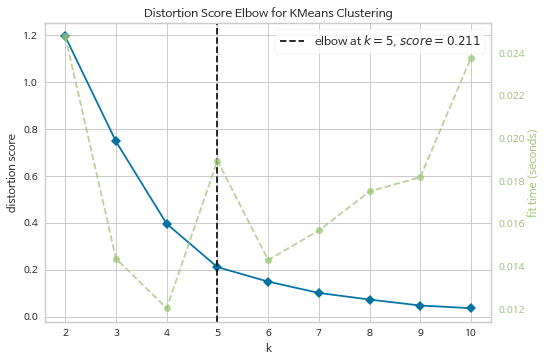

In [ ]:
# 적절한 k값을 찾기 위해 Elbow Method 사용

km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(서초_df)
Elbow_M.show()

plt.show()

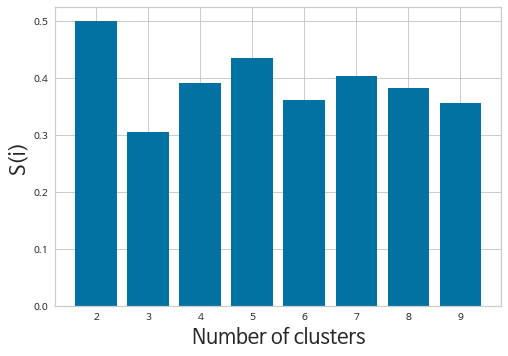

In [ ]:
# 적절한 k값을 찾기 위해 Silhouette Method 사용

silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(서초_df)
    silhouette_scores.append(silhouette_score(서초_df, m1.fit_predict(서초_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [ ]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)  #  Silhouette Method 사용 결과 적절한 k값 출력

Number of Cluster Required is :  2


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


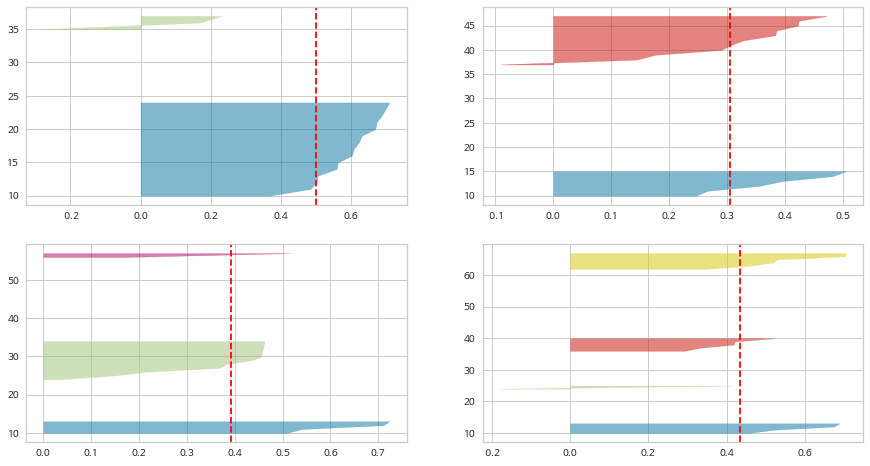

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [2, 3, 4, 5]:
    # Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(서초_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


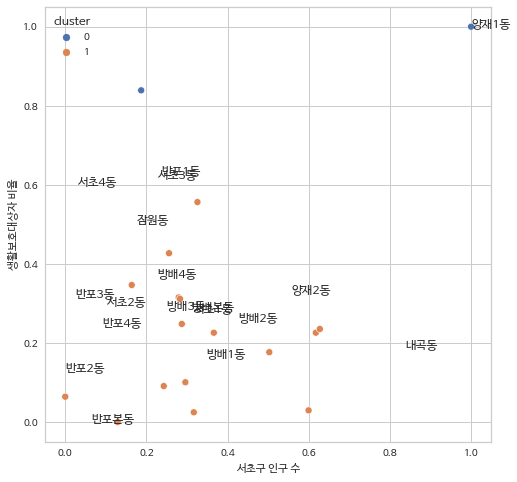

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


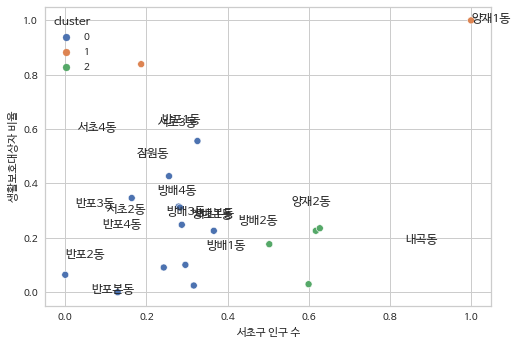

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


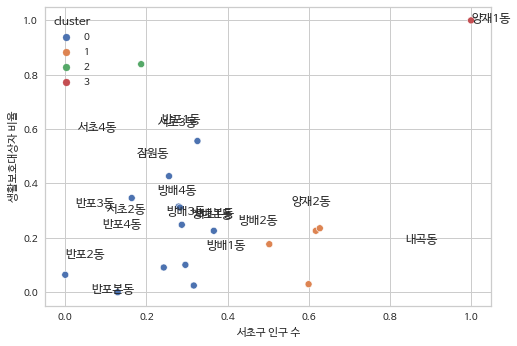

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


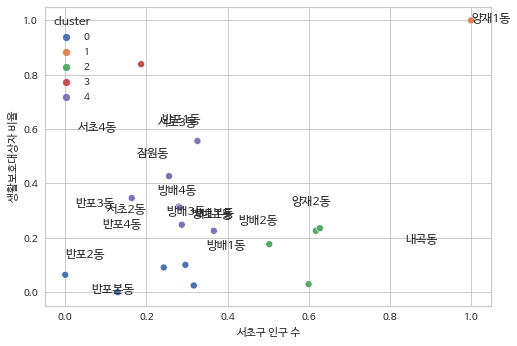

In [ ]:
plt.figure(figsize = (8, 8))

for i in range(2,6):

  k = i
  model = KMeans(n_clusters = k, random_state = 10)
  model.fit(서초_df)
  서초_df['cluster'] = model.fit_predict(서초_df)

  cluster_df = pd.DataFrame()
  cluster_df['동'] = 동_df['동']
  cluster_df['인구 수'] = 서초_df['인구 수']
  cluster_df['생활보호대상자 비율'] = 서초_df['생활보호대상자 비율']
  cluster_df['cluster'] = 서초_df['cluster']

  cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})

  sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

  for index, dong, population, ratio, cluster in cluster_df.itertuples():
    plt.annotate(dong, (ratio, population))
  plt.xlabel('서초구 인구 수')
  plt.ylabel('생활보호대상자 비율')
  
  plt.show()

k=5

In [ ]:
k = 5

# 그룹 수, random_state 설정 (실행할 때마다 같은 결과가 나오도록 고정)
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(서초_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
서초_df['cluster'] = model.fit_predict(서초_df)

In [ ]:
서초_df['cluster'].value_counts()  # 군집별로 몇 개의 동이 있는지 확인

0    7
1    5
2    4
3    1
4    1
Name: cluster, dtype: int64

In [ ]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.28013878, 0.34723923, 4.        ],
       [0.19694216, 0.05605558, 0.        ],
       [0.58681875, 0.16690777, 2.        ],
       [1.        , 1.        , 1.        ],
       [0.18708775, 0.83901501, 3.        ]])

In [ ]:
# 동, 정규화한 인구 수, 정규화한 생활보호대상자 비율, 클러스터 넘버를 데이터프레임으로 만들기

cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 서초_df['인구 수']
cluster_df['생활보호대상자 비율'] = 서초_df['생활보호대상자 비율']
cluster_df['cluster'] = 서초_df['cluster']
cluster_df

동      인구 수  생활보호대상자 비율  cluster
0   서초1동  0.279522    0.315116        0
1   서초2동  0.296058    0.100608        1
2   서초3동  0.617526    0.226028        2
3   서초4동  0.599623    0.029514        2
4    잠원동  0.502781    0.176689        2
5   반포본동  0.000000    0.064080        1
6   반포1동  0.627344    0.235400        2
7   반포2동  0.129153    0.000000        1
8   반포3동  0.316757    0.024645        1
9   반포4동  0.242743    0.090945        1
10  방배본동  0.282744    0.311527        0
11  방배1동  0.163835    0.346583        0
12  방배2동  0.255722    0.427028        0
13  방배3동  0.287243    0.248136        0
14  방배4동  0.366121    0.225926        0
15  양재1동  1.000000    1.000000        3
16  양재2동  0.325785    0.556358        0
17   내곡동  0.187088    0.839015        4

In [ ]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

dong  population     ratio  cluster
0   서초1동    0.279522  0.315116        0
1   서초2동    0.296058  0.100608        1
2   서초3동    0.617526  0.226028        2
3   서초4동    0.599623  0.029514        2
4    잠원동    0.502781  0.176689        2
5   반포본동    0.000000  0.064080        1
6   반포1동    0.627344  0.235400        2
7   반포2동    0.129153  0.000000        1
8   반포3동    0.316757  0.024645        1
9   반포4동    0.242743  0.090945        1
10  방배본동    0.282744  0.311527        0
11  방배1동    0.163835  0.346583        0
12  방배2동    0.255722  0.427028        0
13  방배3동    0.287243  0.248136        0
14  방배4동    0.366121  0.225926        0
15  양재1동    1.000000  1.000000        3
16  양재2동    0.325785  0.556358        0
17   내곡동    0.187088  0.839015        4

In [ ]:
cluster_df.to_csv('/content/drive/MyDrive/project/15. 모델 평가/서초_cluster.csv')

In [ ]:
# 클러스터별로 동 이름 출력하기

for i in range(5):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['서초1동', '방배본동', '방배1동', '방배2동', '방배3동', '방배4동', '양재2동']
cluster 1 :  ['서초2동', '반포본동', '반포2동', '반포3동', '반포4동']
cluster 2 :  ['서초3동', '서초4동', '잠원동', '반포1동']
cluster 3 :  ['양재1동']
cluster 4 :  ['내곡동']


### 10. 양천구

In [ ]:
# 동별 정규화한 인구수, 정규화한 생활보호대상자 비율 데이터 불러오기

양천_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/양천구_인구수, 수급인구비율.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] =양천_df['동']
양천_df = 양천_df.iloc[:,2:]
양천_df = 양천_df.rename(columns={'인구수_scaled':'인구 수', '수급인구비율_scaled':'생활보호대상자 비율'})
양천_df

인구 수  생활보호대상자 비율
0   0.543484    0.100271
1   0.512504    0.319044
2   0.268120    0.483198
3   0.375640    0.389048
4   0.863621    0.000000
5   0.225772    0.905837
6   0.234078    0.366319
7   0.065689    1.000000
8   0.142138    0.214819
9   0.042166    0.513861
10  0.000000    0.156757
11  0.207736    0.558564
12  0.220558    0.125003
13  0.194277    0.336248
14  1.000000    0.480036
15  0.618176    0.523038
16  0.340720    0.013554
17  0.493407    0.633046

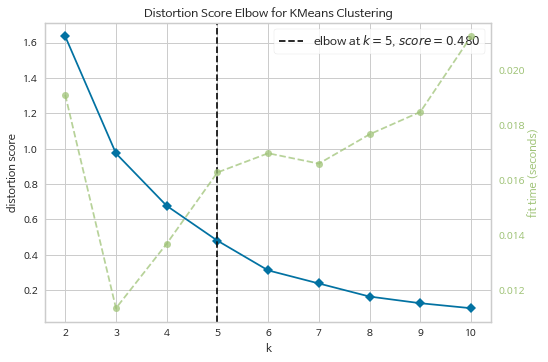

In [ ]:
# 적절한 k값을 찾기 위해 Elbow Method 사용

km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(양천_df)
Elbow_M.show()

plt.show()

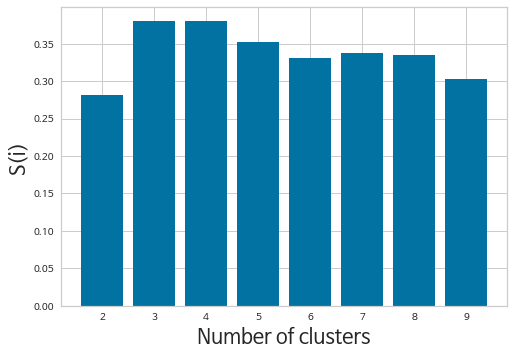

In [ ]:
# 적절한 k값을 찾기 위해 Silhouette Method 사용

silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(양천_df)
    silhouette_scores.append(silhouette_score(양천_df, m1.fit_predict(양천_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [ ]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)  #  Silhouette Method 사용 결과 적절한 k값 출력

Number of Cluster Required is :  4


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


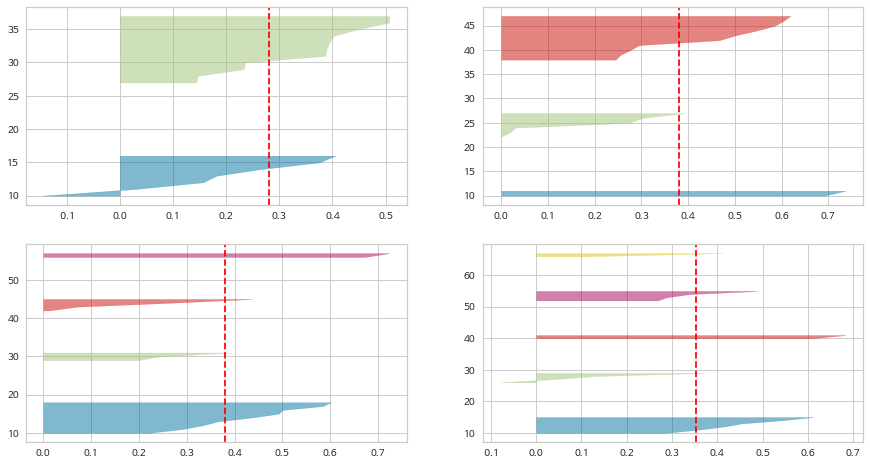

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [2, 3, 4, 5]:
    # Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(양천_df)

k=4

In [ ]:
k = 4

# 그룹 수, random_state 설정 (실행할 때마다 같은 결과가 나오도록 고정)
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(양천_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
양천_df['cluster'] = model.fit_predict(양천_df)

In [ ]:
양천_df['cluster'].value_counts()  # 군집별로 몇 개의 동이 있는지 확인

2    9
1    4
3    3
0    2
Name: cluster, dtype: int64

In [ ]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.14573039, 0.9529183 ],
       [0.5650823 , 0.10821718],
       [0.18719034, 0.34931309],
       [0.70386088, 0.54537367]])

In [ ]:
# 동, 정규화한 인구 수, 정규화한 생활보호대상자 비율, 클러스터 넘버를 데이터프레임으로 만들기

cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 양천_df['인구 수']
cluster_df['생활보호대상자 비율'] = 양천_df['생활보호대상자 비율']
cluster_df['cluster'] = 양천_df['cluster']
cluster_df

동      인구 수  생활보호대상자 비율  cluster
0    목1동  0.543484    0.100271        1
1    목2동  0.512504    0.319044        1
2    목3동  0.268120    0.483198        2
3    목4동  0.375640    0.389048        2
4    목5동  0.863621    0.000000        1
5   신월1동  0.225772    0.905837        0
6   신월2동  0.234078    0.366319        2
7   신월3동  0.065689    1.000000        0
8   신월4동  0.142138    0.214819        2
9   신월5동  0.042166    0.513861        2
10  신월6동  0.000000    0.156757        2
11  신월7동  0.207736    0.558564        2
12  신정1동  0.220558    0.125003        2
13  신정2동  0.194277    0.336248        2
14  신정3동  1.000000    0.480036        3
15  신정4동  0.618176    0.523038        3
16  신정6동  0.340720    0.013554        1
17  신정7동  0.493407    0.633046        3

In [ ]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

dong  population     ratio  cluster
0    목1동    0.543484  0.100271        1
1    목2동    0.512504  0.319044        1
2    목3동    0.268120  0.483198        2
3    목4동    0.375640  0.389048        2
4    목5동    0.863621  0.000000        1
5   신월1동    0.225772  0.905837        0
6   신월2동    0.234078  0.366319        2
7   신월3동    0.065689  1.000000        0
8   신월4동    0.142138  0.214819        2
9   신월5동    0.042166  0.513861        2
10  신월6동    0.000000  0.156757        2
11  신월7동    0.207736  0.558564        2
12  신정1동    0.220558  0.125003        2
13  신정2동    0.194277  0.336248        2
14  신정3동    1.000000  0.480036        3
15  신정4동    0.618176  0.523038        3
16  신정6동    0.340720  0.013554        1
17  신정7동    0.493407  0.633046        3

In [ ]:
cluster_df.to_csv('/content/drive/MyDrive/project/15. 모델 평가/양천_cluster.csv')

#### 10-1. 군집화

In [ ]:
# 클러스터별로 동 이름 출력하기

for i in range(4):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['신월1동', '신월3동']
cluster 1 :  ['목1동', '목2동', '목5동', '신정6동']
cluster 2 :  ['목3동', '목4동', '신월2동', '신월4동', '신월5동', '신월6동', '신월7동', '신정1동', '신정2동']
cluster 3 :  ['신정3동', '신정4동', '신정7동']


#### 10-2. 클러스터별 인구수, 체육시설 수

In [ ]:
# 클러스터별로 인구 수 합치기

양천_peo_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/양천구_인구수, 수급인구비율.csv', index_col=0)
양천_peo_df = 양천_peo_df[['동', '인구 수']]
양천_peo_df = 양천_peo_df.rename(columns={'동':'dong'})
양천_peo_df


df_all = pd.merge(cluster_df, 양천_peo_df, on='dong')
df_all

dong  population     ratio  cluster     인구 수
0    목1동    0.543484  0.100271        1  31727.0
1    목2동    0.512504  0.319044        1  30705.0
2    목3동    0.268120  0.483198        2  22643.0
3    목4동    0.375640  0.389048        2  26190.0
4    목5동    0.863621  0.000000        1  42288.0
5   신월1동    0.225772  0.905837        0  21246.0
6   신월2동    0.234078  0.366319        2  21520.0
7   신월3동    0.065689  1.000000        0  15965.0
8   신월4동    0.142138  0.214819        2  18487.0
9   신월5동    0.042166  0.513861        2  15189.0
10  신월6동    0.000000  0.156757        2  13798.0
11  신월7동    0.207736  0.558564        2  20651.0
12  신정1동    0.220558  0.125003        2  21074.0
13  신정2동    0.194277  0.336248        2  20207.0
14  신정3동    1.000000  0.480036        3  46787.0
15  신정4동    0.618176  0.523038        3  34191.0
16  신정6동    0.340720  0.013554        1  25038.0
17  신정7동    0.493407  0.633046        3  30075.0

In [ ]:
# 클러스터별로 인구 수 합계

for i in range(df_all['cluster'].nunique()):
  num = 0
  for j in range(len(df_all)):
    if df_all['cluster'][j] == i:
      num += df_all['인구 수'][j]
  print('cluster ' + str(i) + ' : ', num)

cluster 0 :  37211.0
cluster 1 :  129758.0
cluster 2 :  179759.0
cluster 3 :  111053.0


In [ ]:
# a+b+c=11

def prop(a, b, c, d):
  
  p1 = a*10000/37211.0
  p2 = b*10000/129758.0
  p3 = c*10000/179759.0
  p4 = d*10000/111053.0

  return ((p1-p2)**2 + (p1-p3)**2 + (p1-p4)**2 + (p2-p3)**2 + (p2-p4)**2 + (p3-p4)**2)

In [ ]:
lst = []

for i, j, k, l in product(range(12), range(12), range(12), range(12)):
  if (i+j+k+l==11):
    lst.append([prop(i,j,k,l), (i,j,k,l)])

In [ ]:
lst.sort()
lst

[[0.0074067045011526845, (1, 3, 4, 3)],
 [0.02378648398327754, (1, 3, 5, 2)],
 [0.03713663306285485, (1, 4, 4, 2)],
 [0.042127082580736455, (1, 2, 5, 3)],
 [0.0440389000441282, (1, 4, 3, 3)],
 [0.0782833004741943, (1, 3, 3, 4)],
 [0.08178890852625953, (1, 2, 6, 2)],
 [0.08972163209037985, (1, 2, 4, 4)],
 [0.11749074153674793, (1, 4, 5, 1)],
 [0.12183935576499147, (1, 5, 3, 2)],
 [0.12742263892056888, (1, 3, 6, 1)],
 [0.13819754248056804, (1, 4, 2, 4)],
 [0.14820003428287948, (1, 1, 6, 3)],
 [0.1520236692096631, (1, 5, 2, 3)],
 [0.17251253732912467, (1, 1, 5, 4)],
 [0.17891141777548636, (1, 5, 4, 1)],
 [0.20758205686523545, (0, 3, 5, 3)],
 [0.20870710992694907, (1, 2, 7, 1)],
 [0.21114390669180083, (1, 1, 7, 2)],
 [0.22457255705518964, (1, 2, 3, 5)],
 [0.22859321038243202, (0, 4, 4, 3)],
 [0.23177947280126804, (0, 4, 5, 2)],
 [0.23405036574746974, (0, 3, 6, 2)],
 [0.23641627190240228, (1, 3, 2, 5)],
 [0.2579234769705982, (0, 2, 6, 3)],
 [0.26837012343816774, (0, 3, 4, 4)],
 [0.269464358

#### **공공체육시설 입지 선정 모델 결과** 
- cluster 0 :  '신월1동', '신월3동' (1개)
- cluster 1 :  '목1동', '목2동', '목5동', '신정6동' (3개)
- cluster 2 :  '목3동', '목4동', '신월2동', '신월4동', '신월5동', '신월6동', '신월7동', '신정1동', '신정2동' (4개)
- cluster 3 :  '신정3동', '신정4동', '신정7동' (3개)

#### **2020년 기준 양천구 공공체육시설 설치 개수**
- cluster 0 :  신월1동(1개) = 1개
- cluster 1 :  목1동(3개) + 목2동(1개) + 목5동(2개) + 신정6동(2개) = 8개
- cluster 2 :  신월7동(1개) + 신정1동(1개) + 신정2동(1개) = 3개
- cluster 3 :  신정3동(1개) + 신정4동(1개) = 2개

### 11. 영등포구

In [ ]:
# 동별 정규화한 인구수, 정규화한 생활보호대상자 비율 데이터 불러오기

영등포_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/영등포구_인구수, 수급인구비율.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] =영등포_df['동']
영등포_df = 영등포_df.iloc[:,2:]
영등포_df = 영등포_df.rename(columns={'인구수_scaled':'인구 수', '수급인구비율_scaled':'생활보호대상자 비율'})
영등포_df

인구 수  생활보호대상자 비율
0   0.860945    0.000000
1   0.341015    0.377683
2   1.000000    0.047494
3   0.204037    0.228412
4   0.396120    0.127156
5   0.261454    0.707621
6   0.219087    0.760767
7   0.018734    0.916069
8   0.000000    0.736405
9   0.257692    0.378823
10  0.313463    0.125098
11  0.205957    0.492495
12  0.285322    0.390279
13  0.567392    0.536647
14  0.442642    0.651263
15  0.636998    1.000000
16  0.320165    0.557544
17  0.819244    0.075956

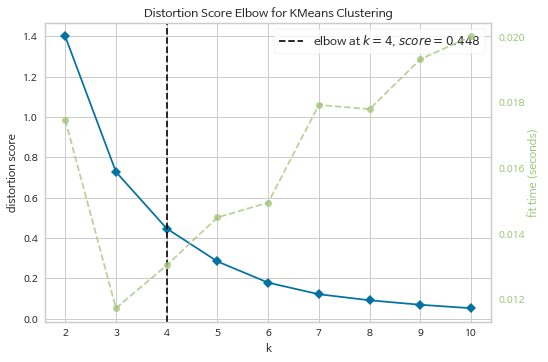

In [ ]:
# 적절한 k값을 찾기 위해 Elbow Method 사용

km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(영등포_df)
Elbow_M.show()

plt.show()

In [1]:
from google.colab import drive
import os

drive.mount('/content/drive')
%cd drive/MyDrive

Mounted at /content/drive
/content/drive/MyDrive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import json
from itertools import product

pd.set_option('display.max_columns', None)

In [1]:
# 1. 나눔 폰트 설치 (Nanum)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (49.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [12]:
# 2. matplotlib의 폰트를 Nanum 폰트로 지정
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [4]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [5]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

### 8. 광진구

In [17]:
# 동별 정규화한 인구수, 정규화한 생활보호대상자 비율 데이터 불러오기

광진_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/광진구_인구수, 수급인구비율.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] =광진_df['동']
광진_df = 광진_df.iloc[:,2:]
광진_df = 광진_df.rename(columns={'인구수_scaled':'인구 수', '수급인구비율_scaled':'생활보호대상자 비율'})
광진_df

인구 수  생활보호대상자 비율
0   0.574876    0.282145
1   0.421412    0.523713
2   0.180418    0.769007
3   0.437526    0.533419
4   0.210453    1.000000
5   0.755167    0.702302
6   0.000000    0.339497
7   0.455032    0.561281
8   0.655151    0.543070
9   0.745592    0.191942
10  1.000000    0.000000
11  0.497638    0.728769
12  0.594913    0.389766
13  0.718974    0.092464
14  0.405509    0.580504

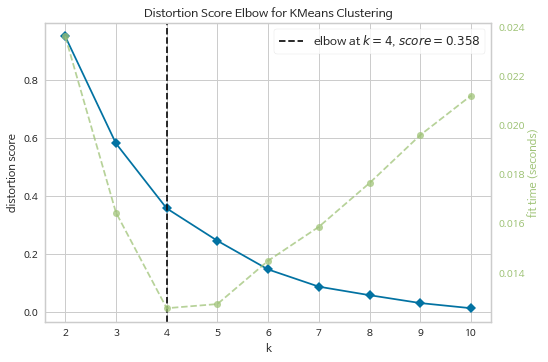

In [18]:
# 적절한 k값을 찾기 위해 Elbow Method 사용

km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(광진_df)
Elbow_M.show()

plt.show()

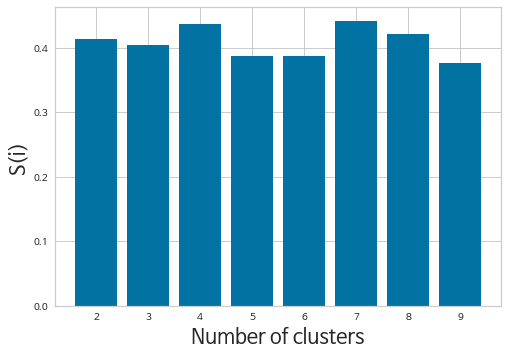

In [19]:
# 적절한 k값을 찾기 위해 Silhouette Method 사용

silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(광진_df)
    silhouette_scores.append(silhouette_score(광진_df, m1.fit_predict(광진_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [20]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)  #  Silhouette Method 사용 결과 적절한 k값 출력

Number of Cluster Required is :  7


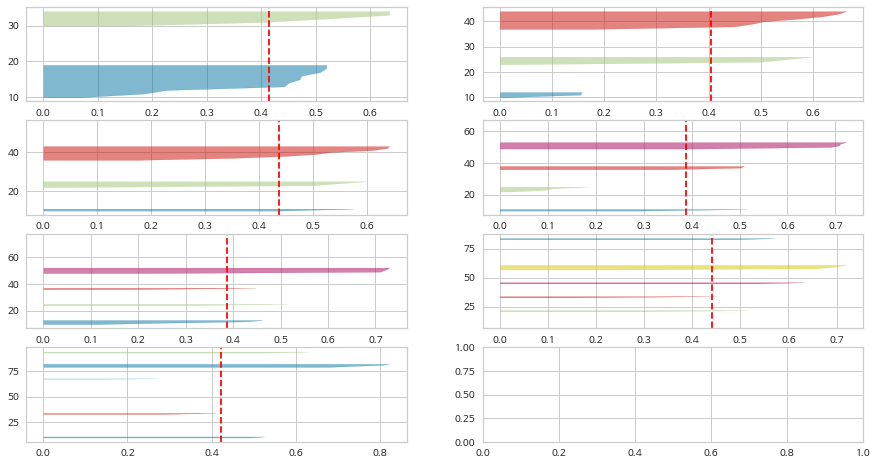

In [21]:
fig, ax = plt.subplots(4, 2, figsize=(15,8))

for i in [2, 3, 4, 5, 6, 7, 8]:
    # Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(광진_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


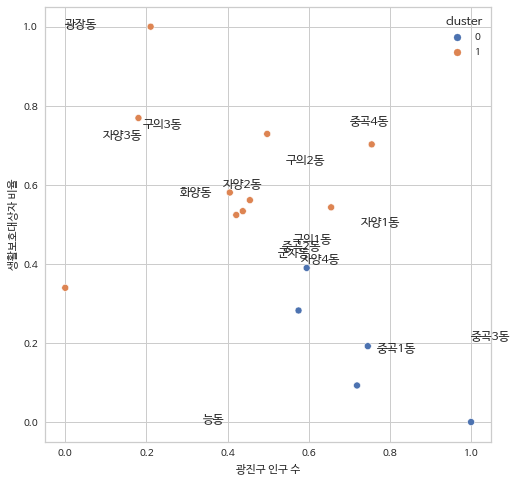

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


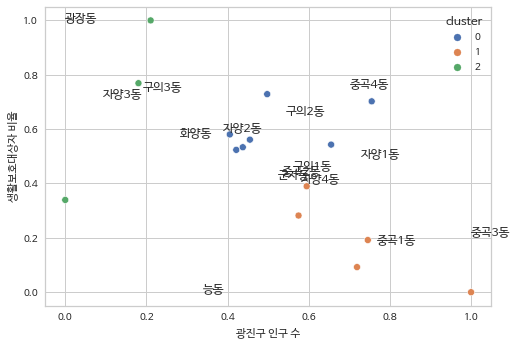

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


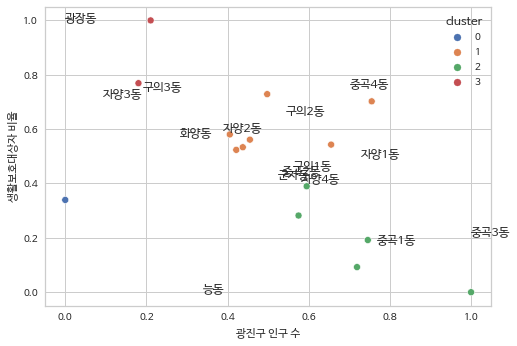

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


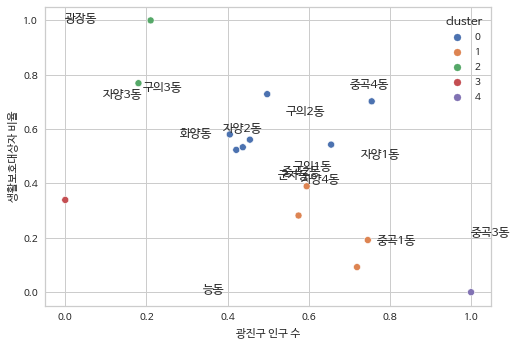

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


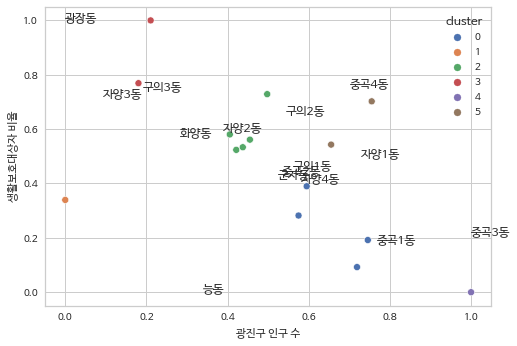

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


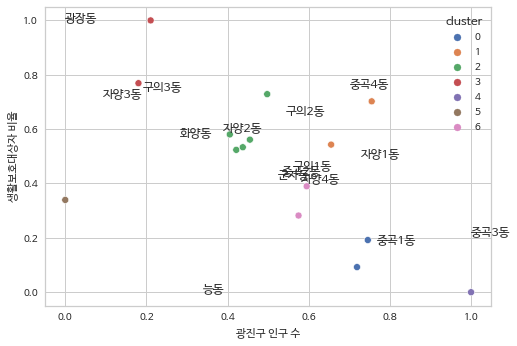

In [22]:
plt.figure(figsize = (8, 8))

for i in range(2,8):

  k = i
  model = KMeans(n_clusters = k, random_state = 10)
  model.fit(광진_df)
  광진_df['cluster'] = model.fit_predict(광진_df)

  cluster_df = pd.DataFrame()
  cluster_df['동'] = 동_df['동']
  cluster_df['인구 수'] = 광진_df['인구 수']
  cluster_df['생활보호대상자 비율'] = 광진_df['생활보호대상자 비율']
  cluster_df['cluster'] = 광진_df['cluster']

  cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})

  sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

  for index, dong, population, ratio, cluster in cluster_df.itertuples():
    plt.annotate(dong, (ratio, population))
  plt.xlabel('광진구 인구 수')
  plt.ylabel('생활보호대상자 비율')
  
  plt.show()

k=4로 결정

In [23]:
k = 4

# 그룹 수, random_state 설정 (실행할 때마다 같은 결과가 나오도록 고정)
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(광진_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
광진_df['cluster'] = model.fit_predict(광진_df)

In [24]:
광진_df['cluster'].value_counts()  # 군집별로 몇 개의 동이 있는지 확인

2    7
0    4
1    3
3    1
Name: cluster, dtype: int64

In [25]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.718721  , 0.38244454, 0.5       ],
       [0.38992941, 0.33713591, 5.66666667],
       [0.37256993, 0.67095614, 2.28571429],
       [1.        , 0.        , 4.        ]])

In [26]:
# 동, 정규화한 인구 수, 정규화한 생활보호대상자 비율, 클러스터 넘버를 데이터프레임으로 만들기

cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 광진_df['인구 수']
cluster_df['생활보호대상자 비율'] = 광진_df['생활보호대상자 비율']
cluster_df['cluster'] = 광진_df['cluster']
cluster_df

동      인구 수  생활보호대상자 비율  cluster
0    화양동  0.574876    0.282145        1
1    군자동  0.421412    0.523713        2
2   중곡1동  0.180418    0.769007        2
3   중곡2동  0.437526    0.533419        2
4   중곡3동  0.210453    1.000000        2
5   중곡4동  0.755167    0.702302        0
6     능동  0.000000    0.339497        1
7   구의1동  0.455032    0.561281        2
8   구의2동  0.655151    0.543070        0
9   구의3동  0.745592    0.191942        0
10   광장동  1.000000    0.000000        3
11  자양1동  0.497638    0.728769        2
12  자양2동  0.594913    0.389766        1
13  자양3동  0.718974    0.092464        0
14  자양4동  0.405509    0.580504        2

In [27]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

dong  population     ratio  cluster
0    화양동    0.574876  0.282145        1
1    군자동    0.421412  0.523713        2
2   중곡1동    0.180418  0.769007        2
3   중곡2동    0.437526  0.533419        2
4   중곡3동    0.210453  1.000000        2
5   중곡4동    0.755167  0.702302        0
6     능동    0.000000  0.339497        1
7   구의1동    0.455032  0.561281        2
8   구의2동    0.655151  0.543070        0
9   구의3동    0.745592  0.191942        0
10   광장동    1.000000  0.000000        3
11  자양1동    0.497638  0.728769        2
12  자양2동    0.594913  0.389766        1
13  자양3동    0.718974  0.092464        0
14  자양4동    0.405509  0.580504        2

In [ ]:
cluster_df.to_csv('/content/drive/MyDrive/project/15. 모델 평가/광진_cluster.csv')

#### 8-1. 군집화

In [28]:
# 클러스터별로 동 이름 출력하기

for i in range(4):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['중곡4동', '구의2동', '구의3동', '자양3동']
cluster 1 :  ['화양동', '능동', '자양2동']
cluster 2 :  ['군자동', '중곡1동', '중곡2동', '중곡3동', '구의1동', '자양1동', '자양4동']
cluster 3 :  ['광장동']


#### 8-2. 클러스터별 인구수, 체육시설 수

In [29]:
# 클러스터별로 인구 수 합치기

광진_peo_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/광진구_인구수, 수급인구비율.csv', index_col=0)
광진_peo_df = 광진_peo_df[['동', '인구 수']]
광진_peo_df = 광진_peo_df.rename(columns={'동':'dong'})
광진_peo_df


df_all = pd.merge(cluster_df, 광진_peo_df, on='dong')
df_all

dong  population     ratio  cluster     인구 수
0    화양동    0.574876  0.282145        1  25541.0
1    군자동    0.421412  0.523713        2  21903.0
2   중곡1동    0.180418  0.769007        2  16190.0
3   중곡2동    0.437526  0.533419        2  22285.0
4   중곡3동    0.210453  1.000000        2  16902.0
5   중곡4동    0.755167  0.702302        0  29815.0
6     능동    0.000000  0.339497        1  11913.0
7   구의1동    0.455032  0.561281        2  22700.0
8   구의2동    0.655151  0.543070        0  27444.0
9   구의3동    0.745592  0.191942        0  29588.0
10   광장동    1.000000  0.000000        3  35619.0
11  자양1동    0.497638  0.728769        2  23710.0
12  자양2동    0.594913  0.389766        1  26016.0
13  자양3동    0.718974  0.092464        0  28957.0
14  자양4동    0.405509  0.580504        2  21526.0

In [30]:
# 클러스터별로 인구 수 합계

for i in range(df_all['cluster'].nunique()):
  num = 0
  for j in range(len(df_all)):
    if df_all['cluster'][j] == i:
      num += df_all['인구 수'][j]
  print('cluster ' + str(i) + ' : ', num)

cluster 0 :  115804.0
cluster 1 :  63470.0
cluster 2 :  145216.0
cluster 3 :  35619.0


In [31]:
# a+b+c=8

def prop(a, b, c, d):
  
  p1 = a*10000/115804.0
  p2 = b*10000/63470.0
  p3 = c*10000/145216.0
  p4 = d*10000/35619.0

  return ((p1-p2)**2 + (p1-p3)**2 + (p1-p4)**2 + (p2-p3)**2 + (p2-p4)**2 + (p3-p4)**2)

In [32]:
lst = []

for i, j, k, l in product(range(9), range(9), range(9), range(9)):
  if (i+j+k+l==8):
    lst.append([prop(i,j,k,l), (i,j,k,l)])

In [33]:
lst.sort()
lst

[[0.03660744677432321, (3, 1, 3, 1)],
 [0.05155744638858562, (2, 2, 3, 1)],
 [0.05156429432393481, (2, 1, 4, 1)],
 [0.0714350133685609, (3, 2, 2, 1)],
 [0.1186300917477523, (4, 1, 2, 1)],
 [0.12865937193165103, (1, 2, 4, 1)],
 [0.16350063439658713, (1, 1, 5, 1)],
 [0.1882920728715769, (4, 2, 1, 1)],
 [0.19227985462423236, (3, 1, 4, 0)],
 [0.22257222950769565, (3, 0, 4, 1)],
 [0.2267557166105646, (3, 2, 3, 0)],
 [0.23740326053338523, (2, 2, 4, 0)],
 [0.2377618130766399, (2, 1, 5, 0)],
 [0.24377738869486565, (4, 1, 3, 0)],
 [0.2697604599515379, (4, 0, 3, 1)],
 [0.27234294778084667, (2, 3, 2, 1)],
 [0.2723634915868942, (2, 0, 5, 1)],
 [0.29763222924422217, (5, 1, 1, 1)],
 [0.3027407899977572, (0, 2, 5, 1)],
 [0.31308766521078474, (4, 2, 2, 0)],
 [0.3146104587943252, (1, 3, 3, 1)],
 [0.32705492929040875, (3, 3, 1, 1)],
 [0.3450302969792466, (1, 2, 5, 0)],
 [0.3724164669922801, (0, 1, 6, 1)],
 [0.3785963419655104, (3, 0, 5, 0)],
 [0.38022326405208806, (1, 1, 6, 0)],
 [0.39225441528853955, (

#### **공공체육시설 입지 선정 모델 결과**
- cluster 0 :  '중곡4동', '구의2동', '구의3동', '자양3동' (3개)
- cluster 1 :  '화양동', '능동', '자양2동' (1개)
- cluster 2 :  '군자동', '중곡1동', '중곡2동', '중곡3동', '구의1동', '자양1동', '자양4동' (3개)
- cluster 3 :  '광장동' (1개)

#### **2020년 기준 광진구 공공체육시설 설치 개수**
- cluster 0 :  구의2동(1개) + 구의3동(1개) + 자양3동(1개) = 3개
- cluster 1 :  자양2동(1개) = 1개
- cluster 2 :  중곡2동(1개) + 중곡3동(1개) = 2개
- cluster 3 :  광장동(3개) = 3개

### 9. 서초구

In [34]:
# 동별 정규화한 인구수, 정규화한 생활보호대상자 비율 데이터 불러오기

서초_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/서초구_인구수, 수급인구비율.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] =서초_df['동']
서초_df = 서초_df.iloc[:,2:]
서초_df = 서초_df.rename(columns={'인구수_scaled':'인구 수', '수급인구비율_scaled':'생활보호대상자 비율'})
서초_df

인구 수  생활보호대상자 비율
0   0.279522    0.315116
1   0.296058    0.100608
2   0.617526    0.226028
3   0.599623    0.029514
4   0.502781    0.176689
5   0.000000    0.064080
6   0.627344    0.235400
7   0.129153    0.000000
8   0.316757    0.024645
9   0.242743    0.090945
10  0.282744    0.311527
11  0.163835    0.346583
12  0.255722    0.427028
13  0.287243    0.248136
14  0.366121    0.225926
15  1.000000    1.000000
16  0.325785    0.556358
17  0.187088    0.839015

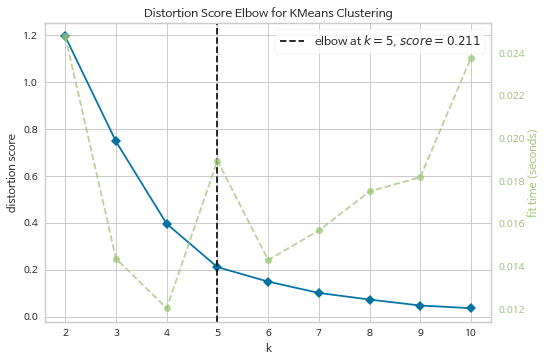

In [35]:
# 적절한 k값을 찾기 위해 Elbow Method 사용

km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(서초_df)
Elbow_M.show()

plt.show()

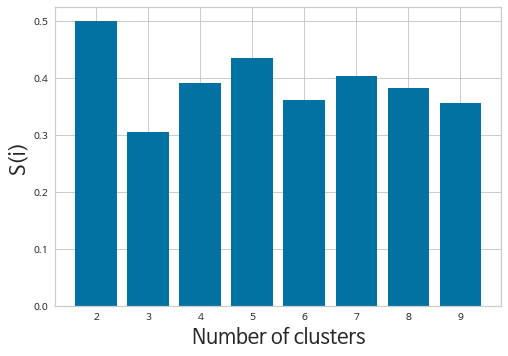

In [36]:
# 적절한 k값을 찾기 위해 Silhouette Method 사용

silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(서초_df)
    silhouette_scores.append(silhouette_score(서초_df, m1.fit_predict(서초_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [37]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)  #  Silhouette Method 사용 결과 적절한 k값 출력

Number of Cluster Required is :  2


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


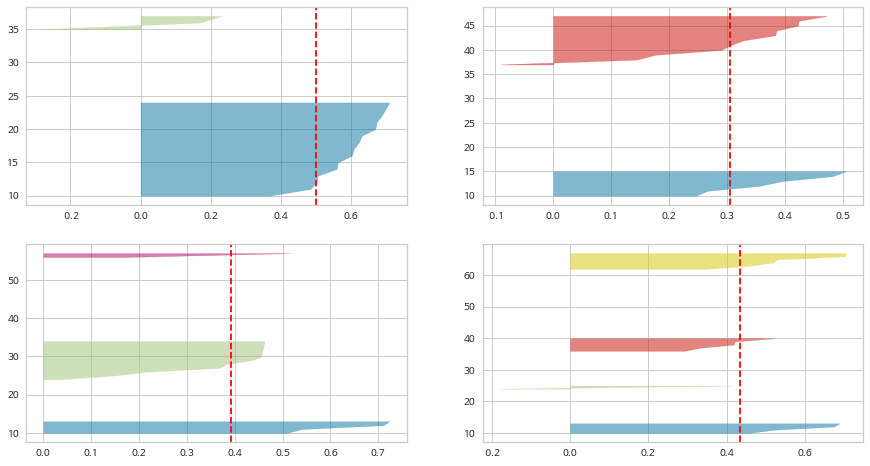

In [38]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [2, 3, 4, 5]:
    # Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(서초_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


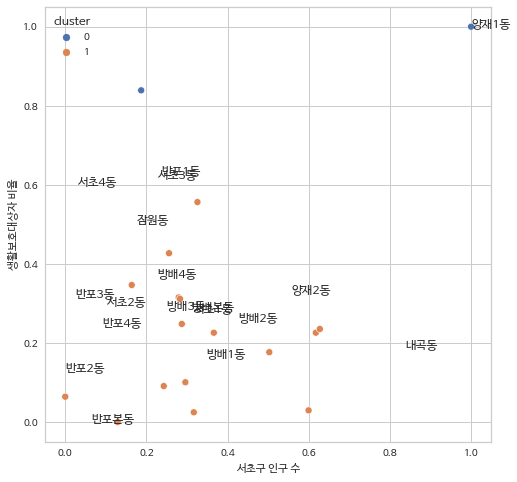

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


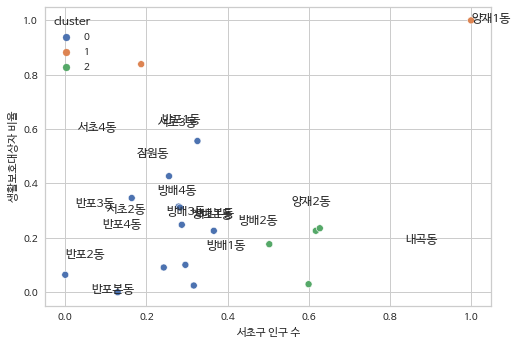

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


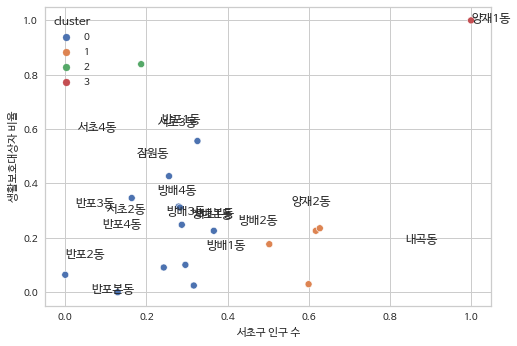

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


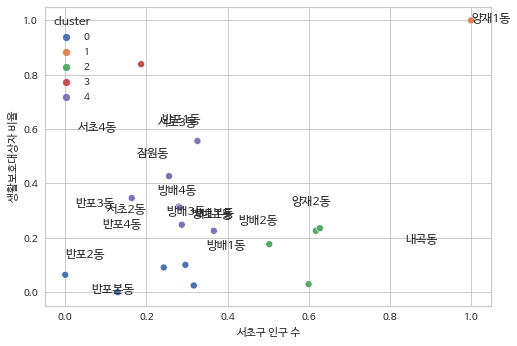

In [39]:
plt.figure(figsize = (8, 8))

for i in range(2,6):

  k = i
  model = KMeans(n_clusters = k, random_state = 10)
  model.fit(서초_df)
  서초_df['cluster'] = model.fit_predict(서초_df)

  cluster_df = pd.DataFrame()
  cluster_df['동'] = 동_df['동']
  cluster_df['인구 수'] = 서초_df['인구 수']
  cluster_df['생활보호대상자 비율'] = 서초_df['생활보호대상자 비율']
  cluster_df['cluster'] = 서초_df['cluster']

  cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})

  sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

  for index, dong, population, ratio, cluster in cluster_df.itertuples():
    plt.annotate(dong, (ratio, population))
  plt.xlabel('서초구 인구 수')
  plt.ylabel('생활보호대상자 비율')
  
  plt.show()

k=5

In [40]:
k = 5

# 그룹 수, random_state 설정 (실행할 때마다 같은 결과가 나오도록 고정)
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(서초_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
서초_df['cluster'] = model.fit_predict(서초_df)

In [41]:
서초_df['cluster'].value_counts()  # 군집별로 몇 개의 동이 있는지 확인

0    7
1    5
2    4
3    1
4    1
Name: cluster, dtype: int64

In [42]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.28013878, 0.34723923, 4.        ],
       [0.19694216, 0.05605558, 0.        ],
       [0.58681875, 0.16690777, 2.        ],
       [1.        , 1.        , 1.        ],
       [0.18708775, 0.83901501, 3.        ]])

In [43]:
# 동, 정규화한 인구 수, 정규화한 생활보호대상자 비율, 클러스터 넘버를 데이터프레임으로 만들기

cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 서초_df['인구 수']
cluster_df['생활보호대상자 비율'] = 서초_df['생활보호대상자 비율']
cluster_df['cluster'] = 서초_df['cluster']
cluster_df

동      인구 수  생활보호대상자 비율  cluster
0   서초1동  0.279522    0.315116        0
1   서초2동  0.296058    0.100608        1
2   서초3동  0.617526    0.226028        2
3   서초4동  0.599623    0.029514        2
4    잠원동  0.502781    0.176689        2
5   반포본동  0.000000    0.064080        1
6   반포1동  0.627344    0.235400        2
7   반포2동  0.129153    0.000000        1
8   반포3동  0.316757    0.024645        1
9   반포4동  0.242743    0.090945        1
10  방배본동  0.282744    0.311527        0
11  방배1동  0.163835    0.346583        0
12  방배2동  0.255722    0.427028        0
13  방배3동  0.287243    0.248136        0
14  방배4동  0.366121    0.225926        0
15  양재1동  1.000000    1.000000        3
16  양재2동  0.325785    0.556358        0
17   내곡동  0.187088    0.839015        4

In [44]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

dong  population     ratio  cluster
0   서초1동    0.279522  0.315116        0
1   서초2동    0.296058  0.100608        1
2   서초3동    0.617526  0.226028        2
3   서초4동    0.599623  0.029514        2
4    잠원동    0.502781  0.176689        2
5   반포본동    0.000000  0.064080        1
6   반포1동    0.627344  0.235400        2
7   반포2동    0.129153  0.000000        1
8   반포3동    0.316757  0.024645        1
9   반포4동    0.242743  0.090945        1
10  방배본동    0.282744  0.311527        0
11  방배1동    0.163835  0.346583        0
12  방배2동    0.255722  0.427028        0
13  방배3동    0.287243  0.248136        0
14  방배4동    0.366121  0.225926        0
15  양재1동    1.000000  1.000000        3
16  양재2동    0.325785  0.556358        0
17   내곡동    0.187088  0.839015        4

In [ ]:
cluster_df.to_csv('/content/drive/MyDrive/project/15. 모델 평가/서초_cluster.csv')

In [45]:
# 클러스터별로 동 이름 출력하기

for i in range(5):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['서초1동', '방배본동', '방배1동', '방배2동', '방배3동', '방배4동', '양재2동']
cluster 1 :  ['서초2동', '반포본동', '반포2동', '반포3동', '반포4동']
cluster 2 :  ['서초3동', '서초4동', '잠원동', '반포1동']
cluster 3 :  ['양재1동']
cluster 4 :  ['내곡동']


### 10. 양천구

In [46]:
# 동별 정규화한 인구수, 정규화한 생활보호대상자 비율 데이터 불러오기

양천_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/양천구_인구수, 수급인구비율.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] =양천_df['동']
양천_df = 양천_df.iloc[:,2:]
양천_df = 양천_df.rename(columns={'인구수_scaled':'인구 수', '수급인구비율_scaled':'생활보호대상자 비율'})
양천_df

인구 수  생활보호대상자 비율
0   0.543484    0.100271
1   0.512504    0.319044
2   0.268120    0.483198
3   0.375640    0.389048
4   0.863621    0.000000
5   0.225772    0.905837
6   0.234078    0.366319
7   0.065689    1.000000
8   0.142138    0.214819
9   0.042166    0.513861
10  0.000000    0.156757
11  0.207736    0.558564
12  0.220558    0.125003
13  0.194277    0.336248
14  1.000000    0.480036
15  0.618176    0.523038
16  0.340720    0.013554
17  0.493407    0.633046

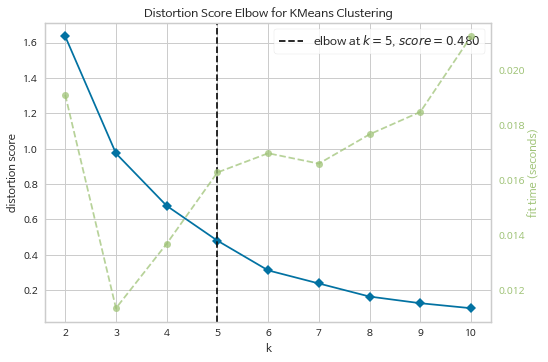

In [47]:
# 적절한 k값을 찾기 위해 Elbow Method 사용

km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(양천_df)
Elbow_M.show()

plt.show()

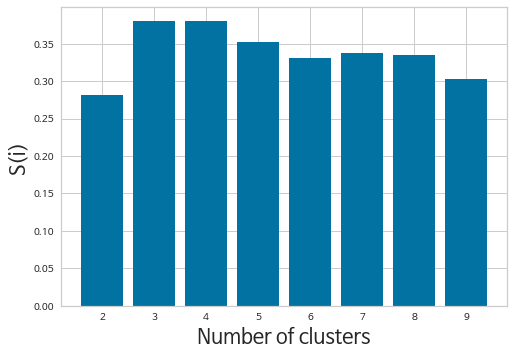

In [48]:
# 적절한 k값을 찾기 위해 Silhouette Method 사용

silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(양천_df)
    silhouette_scores.append(silhouette_score(양천_df, m1.fit_predict(양천_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [49]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)  #  Silhouette Method 사용 결과 적절한 k값 출력

Number of Cluster Required is :  4


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


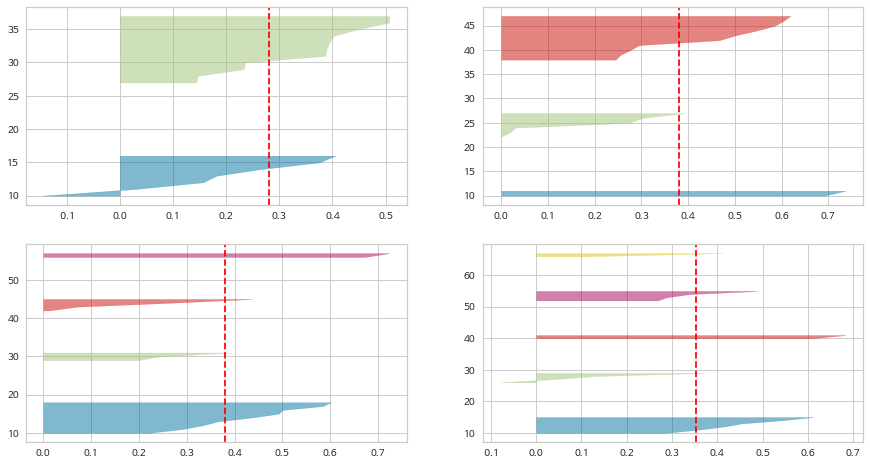

In [50]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [2, 3, 4, 5]:
    # Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(양천_df)

k=4

In [51]:
k = 4

# 그룹 수, random_state 설정 (실행할 때마다 같은 결과가 나오도록 고정)
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(양천_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
양천_df['cluster'] = model.fit_predict(양천_df)

In [52]:
양천_df['cluster'].value_counts()  # 군집별로 몇 개의 동이 있는지 확인

2    9
1    4
3    3
0    2
Name: cluster, dtype: int64

In [53]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.14573039, 0.9529183 ],
       [0.5650823 , 0.10821718],
       [0.18719034, 0.34931309],
       [0.70386088, 0.54537367]])

In [54]:
# 동, 정규화한 인구 수, 정규화한 생활보호대상자 비율, 클러스터 넘버를 데이터프레임으로 만들기

cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 양천_df['인구 수']
cluster_df['생활보호대상자 비율'] = 양천_df['생활보호대상자 비율']
cluster_df['cluster'] = 양천_df['cluster']
cluster_df

동      인구 수  생활보호대상자 비율  cluster
0    목1동  0.543484    0.100271        1
1    목2동  0.512504    0.319044        1
2    목3동  0.268120    0.483198        2
3    목4동  0.375640    0.389048        2
4    목5동  0.863621    0.000000        1
5   신월1동  0.225772    0.905837        0
6   신월2동  0.234078    0.366319        2
7   신월3동  0.065689    1.000000        0
8   신월4동  0.142138    0.214819        2
9   신월5동  0.042166    0.513861        2
10  신월6동  0.000000    0.156757        2
11  신월7동  0.207736    0.558564        2
12  신정1동  0.220558    0.125003        2
13  신정2동  0.194277    0.336248        2
14  신정3동  1.000000    0.480036        3
15  신정4동  0.618176    0.523038        3
16  신정6동  0.340720    0.013554        1
17  신정7동  0.493407    0.633046        3

In [55]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

dong  population     ratio  cluster
0    목1동    0.543484  0.100271        1
1    목2동    0.512504  0.319044        1
2    목3동    0.268120  0.483198        2
3    목4동    0.375640  0.389048        2
4    목5동    0.863621  0.000000        1
5   신월1동    0.225772  0.905837        0
6   신월2동    0.234078  0.366319        2
7   신월3동    0.065689  1.000000        0
8   신월4동    0.142138  0.214819        2
9   신월5동    0.042166  0.513861        2
10  신월6동    0.000000  0.156757        2
11  신월7동    0.207736  0.558564        2
12  신정1동    0.220558  0.125003        2
13  신정2동    0.194277  0.336248        2
14  신정3동    1.000000  0.480036        3
15  신정4동    0.618176  0.523038        3
16  신정6동    0.340720  0.013554        1
17  신정7동    0.493407  0.633046        3

In [ ]:
cluster_df.to_csv('/content/drive/MyDrive/project/15. 모델 평가/양천_cluster.csv')

#### 10-1. 군집화

In [56]:
# 클러스터별로 동 이름 출력하기

for i in range(4):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['신월1동', '신월3동']
cluster 1 :  ['목1동', '목2동', '목5동', '신정6동']
cluster 2 :  ['목3동', '목4동', '신월2동', '신월4동', '신월5동', '신월6동', '신월7동', '신정1동', '신정2동']
cluster 3 :  ['신정3동', '신정4동', '신정7동']


#### 10-2. 클러스터별 인구수, 체육시설 수

In [57]:
# 클러스터별로 인구 수 합치기

양천_peo_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/양천구_인구수, 수급인구비율.csv', index_col=0)
양천_peo_df = 양천_peo_df[['동', '인구 수']]
양천_peo_df = 양천_peo_df.rename(columns={'동':'dong'})
양천_peo_df


df_all = pd.merge(cluster_df, 양천_peo_df, on='dong')
df_all

dong  population     ratio  cluster     인구 수
0    목1동    0.543484  0.100271        1  31727.0
1    목2동    0.512504  0.319044        1  30705.0
2    목3동    0.268120  0.483198        2  22643.0
3    목4동    0.375640  0.389048        2  26190.0
4    목5동    0.863621  0.000000        1  42288.0
5   신월1동    0.225772  0.905837        0  21246.0
6   신월2동    0.234078  0.366319        2  21520.0
7   신월3동    0.065689  1.000000        0  15965.0
8   신월4동    0.142138  0.214819        2  18487.0
9   신월5동    0.042166  0.513861        2  15189.0
10  신월6동    0.000000  0.156757        2  13798.0
11  신월7동    0.207736  0.558564        2  20651.0
12  신정1동    0.220558  0.125003        2  21074.0
13  신정2동    0.194277  0.336248        2  20207.0
14  신정3동    1.000000  0.480036        3  46787.0
15  신정4동    0.618176  0.523038        3  34191.0
16  신정6동    0.340720  0.013554        1  25038.0
17  신정7동    0.493407  0.633046        3  30075.0

In [58]:
# 클러스터별로 인구 수 합계

for i in range(df_all['cluster'].nunique()):
  num = 0
  for j in range(len(df_all)):
    if df_all['cluster'][j] == i:
      num += df_all['인구 수'][j]
  print('cluster ' + str(i) + ' : ', num)

cluster 0 :  37211.0
cluster 1 :  129758.0
cluster 2 :  179759.0
cluster 3 :  111053.0


In [59]:
# a+b+c=11

def prop(a, b, c, d):
  
  p1 = a*10000/37211.0
  p2 = b*10000/129758.0
  p3 = c*10000/179759.0
  p4 = d*10000/111053.0

  return ((p1-p2)**2 + (p1-p3)**2 + (p1-p4)**2 + (p2-p3)**2 + (p2-p4)**2 + (p3-p4)**2)

In [60]:
lst = []

for i, j, k, l in product(range(12), range(12), range(12), range(12)):
  if (i+j+k+l==11):
    lst.append([prop(i,j,k,l), (i,j,k,l)])

In [61]:
lst.sort()
lst

[[0.0074067045011526845, (1, 3, 4, 3)],
 [0.02378648398327754, (1, 3, 5, 2)],
 [0.03713663306285485, (1, 4, 4, 2)],
 [0.042127082580736455, (1, 2, 5, 3)],
 [0.0440389000441282, (1, 4, 3, 3)],
 [0.0782833004741943, (1, 3, 3, 4)],
 [0.08178890852625953, (1, 2, 6, 2)],
 [0.08972163209037985, (1, 2, 4, 4)],
 [0.11749074153674793, (1, 4, 5, 1)],
 [0.12183935576499147, (1, 5, 3, 2)],
 [0.12742263892056888, (1, 3, 6, 1)],
 [0.13819754248056804, (1, 4, 2, 4)],
 [0.14820003428287948, (1, 1, 6, 3)],
 [0.1520236692096631, (1, 5, 2, 3)],
 [0.17251253732912467, (1, 1, 5, 4)],
 [0.17891141777548636, (1, 5, 4, 1)],
 [0.20758205686523545, (0, 3, 5, 3)],
 [0.20870710992694907, (1, 2, 7, 1)],
 [0.21114390669180083, (1, 1, 7, 2)],
 [0.22457255705518964, (1, 2, 3, 5)],
 [0.22859321038243202, (0, 4, 4, 3)],
 [0.23177947280126804, (0, 4, 5, 2)],
 [0.23405036574746974, (0, 3, 6, 2)],
 [0.23641627190240228, (1, 3, 2, 5)],
 [0.2579234769705982, (0, 2, 6, 3)],
 [0.26837012343816774, (0, 3, 4, 4)],
 [0.269464358

#### **공공체육시설 입지 선정 모델 결과** 
- cluster 0 :  '신월1동', '신월3동' (1개)
- cluster 1 :  '목1동', '목2동', '목5동', '신정6동' (3개)
- cluster 2 :  '목3동', '목4동', '신월2동', '신월4동', '신월5동', '신월6동', '신월7동', '신정1동', '신정2동' (4개)
- cluster 3 :  '신정3동', '신정4동', '신정7동' (3개)

#### **2020년 기준 양천구 공공체육시설 설치 개수**
- cluster 0 :  신월1동(1개) = 1개
- cluster 1 :  목1동(3개) + 목2동(1개) + 목5동(2개) + 신정6동(2개) = 8개
- cluster 2 :  신월7동(1개) + 신정1동(1개) + 신정2동(1개) = 3개
- cluster 3 :  신정3동(1개) + 신정4동(1개) = 2개

### 11. 영등포구

In [62]:
# 동별 정규화한 인구수, 정규화한 생활보호대상자 비율 데이터 불러오기

영등포_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/영등포구_인구수, 수급인구비율.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] =영등포_df['동']
영등포_df = 영등포_df.iloc[:,2:]
영등포_df = 영등포_df.rename(columns={'인구수_scaled':'인구 수', '수급인구비율_scaled':'생활보호대상자 비율'})
영등포_df

인구 수  생활보호대상자 비율
0   0.860945    0.000000
1   0.341015    0.377683
2   1.000000    0.047494
3   0.204037    0.228412
4   0.396120    0.127156
5   0.261454    0.707621
6   0.219087    0.760767
7   0.018734    0.916069
8   0.000000    0.736405
9   0.257692    0.378823
10  0.313463    0.125098
11  0.205957    0.492495
12  0.285322    0.390279
13  0.567392    0.536647
14  0.442642    0.651263
15  0.636998    1.000000
16  0.320165    0.557544
17  0.819244    0.075956

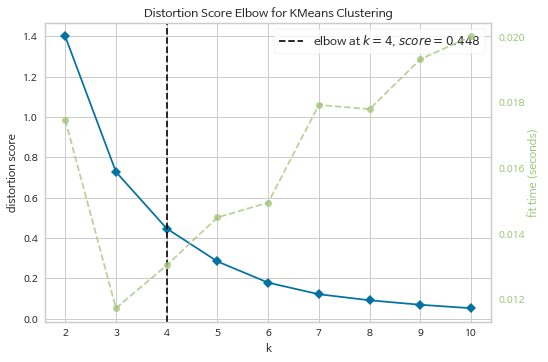

In [63]:
# 적절한 k값을 찾기 위해 Elbow Method 사용

km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(영등포_df)
Elbow_M.show()

plt.show()

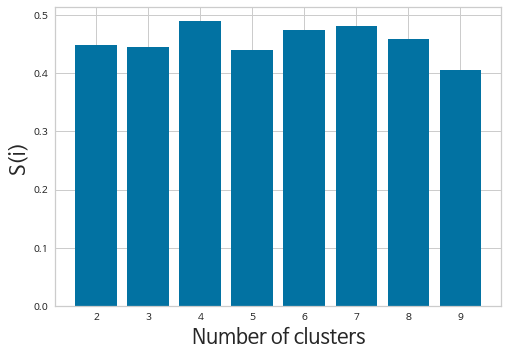

In [64]:
# 적절한 k값을 찾기 위해 Silhouette Method 사용

silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(영등포_df)
    silhouette_scores.append(silhouette_score(영등포_df, m1.fit_predict(영등포_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [65]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)  #  Silhouette Method 사용 결과 적절한 k값 출력

Number of Cluster Required is :  4


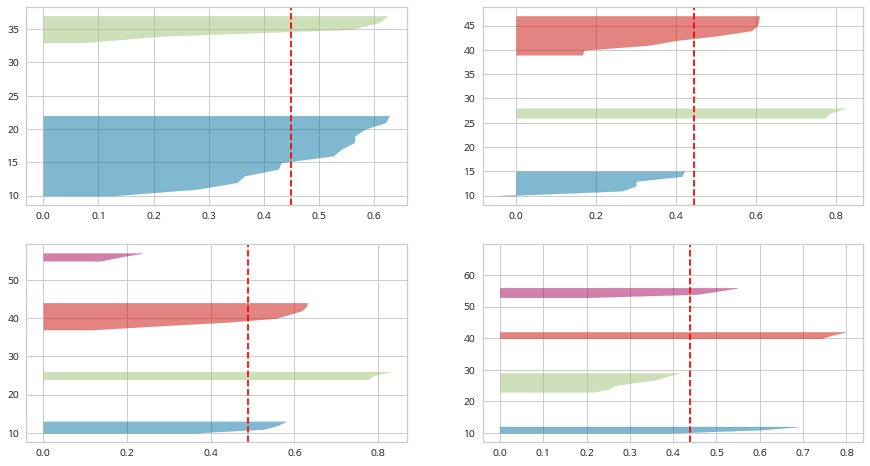

In [66]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [2, 3, 4, 5]:
    # Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(영등포_df)

k=4

In [67]:
k = 4

# 그룹 수, random_state 설정 (실행할 때마다 같은 결과가 나오도록 고정)
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(영등포_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
영등포_df['cluster'] = model.fit_predict(영등포_df)

In [68]:
영등포_df['cluster'].value_counts()  # 군집별로 몇 개의 동이 있는지 확인

3    7
0    5
2    3
1    3
Name: cluster, dtype: int64

In [69]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.16388791, 0.73568134],
       [0.54901039, 0.72930332],
       [0.89339604, 0.04114993],
       [0.28622939, 0.30284943]])

In [70]:
# 동, 정규화한 인구 수, 정규화한 생활보호대상자 비율, 클러스터 넘버를 데이터프레임으로 만들기

cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 영등포_df['인구 수']
cluster_df['생활보호대상자 비율'] = 영등포_df['생활보호대상자 비율']
cluster_df['cluster'] = 영등포_df['cluster']
cluster_df

동      인구 수  생활보호대상자 비율  cluster
0     여의동  0.860945    0.000000        2
1    당산1동  0.341015    0.377683        3
2    당산2동  1.000000    0.047494        2
3    양평1동  0.204037    0.228412        3
4    양평2동  0.396120    0.127156        3
5    신길1동  0.261454    0.707621        0
6    신길3동  0.219087    0.760767        0
7    신길4동  0.018734    0.916069        0
8    신길5동  0.000000    0.736405        0
9    신길6동  0.257692    0.378823        3
10   신길7동  0.313463    0.125098        3
11   대림1동  0.205957    0.492495        3
12   대림2동  0.285322    0.390279        3
13   대림3동  0.567392    0.536647        1
14  영등포본동  0.442642    0.651263        1
15   영등포동  0.636998    1.000000        1
16    도림동  0.320165    0.557544        0
17    문래동  0.819244    0.075956        2

In [71]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

dong  population     ratio  cluster
0     여의동    0.860945  0.000000        2
1    당산1동    0.341015  0.377683        3
2    당산2동    1.000000  0.047494        2
3    양평1동    0.204037  0.228412        3
4    양평2동    0.396120  0.127156        3
5    신길1동    0.261454  0.707621        0
6    신길3동    0.219087  0.760767        0
7    신길4동    0.018734  0.916069        0
8    신길5동    0.000000  0.736405        0
9    신길6동    0.257692  0.378823        3
10   신길7동    0.313463  0.125098        3
11   대림1동    0.205957  0.492495        3
12   대림2동    0.285322  0.390279        3
13   대림3동    0.567392  0.536647        1
14  영등포본동    0.442642  0.651263        1
15   영등포동    0.636998  1.000000        1
16    도림동    0.320165  0.557544        0
17    문래동    0.819244  0.075956        2

In [ ]:
cluster_df.to_csv('/content/drive/MyDrive/project/15. 모델 평가/영등포_cluster.csv')

#### 11.1 군집화

In [72]:
# 클러스터별로 동 이름 출력하기

for i in range(4):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['신길1동', '신길3동', '신길4동', '신길5동', '도림동']
cluster 1 :  ['대림3동', '영등포본동', '영등포동']
cluster 2 :  ['여의동', '당산2동', '문래동']
cluster 3 :  ['당산1동', '양평1동', '양평2동', '신길6동', '신길7동', '대림1동', '대림2동']


#### 11-2. 클러스터별 인구수, 체육시설 수

In [73]:
# 클러스터별로 인구 수 합치기

영등포_peo_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/영등포구_인구수, 수급인구비율.csv', index_col=0)
영등포_peo_df = 영등포_peo_df[['동', '인구 수']]
영등포_peo_df = 영등포_peo_df.rename(columns={'동':'dong'})
영등포_peo_df


df_all = pd.merge(cluster_df, 영등포_peo_df, on='dong')
df_all

dong  population     ratio  cluster     인구 수
0     여의동    0.860945  0.000000        2  34463.0
1    당산1동    0.341015  0.377683        3  21197.0
2    당산2동    1.000000  0.047494        2  38011.0
3    양평1동    0.204037  0.228412        3  17702.0
4    양평2동    0.396120  0.127156        3  22603.0
5    신길1동    0.261454  0.707621        0  19167.0
6    신길3동    0.219087  0.760767        0  18086.0
7    신길4동    0.018734  0.916069        0  12974.0
8    신길5동    0.000000  0.736405        0  12496.0
9    신길6동    0.257692  0.378823        3  19071.0
10   신길7동    0.313463  0.125098        3  20494.0
11   대림1동    0.205957  0.492495        3  17751.0
12   대림2동    0.285322  0.390279        3  19776.0
13   대림3동    0.567392  0.536647        1  26973.0
14  영등포본동    0.442642  0.651263        1  23790.0
15   영등포동    0.636998  1.000000        1  28749.0
16    도림동    0.320165  0.557544        0  20665.0
17    문래동    0.819244  0.075956        2  33399.0

In [74]:
# 클러스터별로 인구 수 합계

for i in range(df_all['cluster'].nunique()):
  num = 0
  for j in range(len(df_all)):
    if df_all['cluster'][j] == i:
      num += df_all['인구 수'][j]
  print('cluster ' + str(i) + ' : ', num)

cluster 0 :  83388.0
cluster 1 :  79512.0
cluster 2 :  105873.0
cluster 3 :  138594.0


In [75]:
# a+b+c=8

def prop(a, b, c, d):
  
  p1 = a*10000/83388.0
  p2 = b*10000/79512.0
  p3 = c*10000/105873.0
  p4 = d*10000/138594.0

  return ((p1-p2)**2 + (p1-p3)**2 + (p1-p4)**2 + (p2-p3)**2 + (p2-p4)**2 + (p3-p4)**2)

In [76]:
lst = []

for i, j, k, l in product(range(9), range(9), range(9), range(9)):
  if (i+j+k+l==8):
    lst.append([prop(i,j,k,l), (i,j,k,l)])

In [77]:
lst.sort()
lst

[[0.029125364358123473, (2, 1, 2, 3)],
 [0.029267750911140308, (2, 2, 2, 2)],
 [0.037312277612264334, (1, 2, 2, 3)],
 [0.06261219883208753, (2, 2, 1, 3)],
 [0.06854814572196166, (2, 1, 3, 2)],
 [0.07360101215295577, (1, 1, 3, 3)],
 [0.0736964800519315, (1, 1, 2, 4)],
 [0.0764743389157532, (1, 2, 3, 2)],
 [0.10172734148153526, (2, 1, 1, 4)],
 [0.10794806147744308, (2, 2, 3, 1)],
 [0.11017497479602548, (1, 2, 1, 4)],
 [0.13668833439323747, (3, 1, 2, 2)],
 [0.1633668938533043, (1, 3, 2, 2)],
 [0.1671835085970716, (3, 2, 1, 2)],
 [0.16977206225383532, (3, 1, 1, 3)],
 [0.17335730993893828, (3, 2, 2, 1)],
 [0.18553030274123006, (1, 1, 4, 2)],
 [0.18581670643815723, (1, 1, 1, 5)],
 [0.1859358748633469, (2, 3, 1, 2)],
 [0.19142179648581378, (2, 0, 2, 4)],
 [0.19158704864718737, (2, 0, 3, 3)],
 [0.19184895614486425, (2, 3, 2, 1)],
 [0.19697206183460084, (1, 3, 1, 3)],
 [0.1971347020829853, (0, 2, 3, 3)],
 [0.19749089004231038, (0, 2, 2, 4)],
 [0.20798140524028474, (2, 2, 0, 4)],
 [0.21562936501

#### **공공체육시설 입지 선정 모델 결과**
- cluster 0 :  '신길1동', '신길3동', '신길4동', '신길5동', '도림동' (2개)
- cluster 1 :  '대림3동', '영등포본동', '영등포동' (1개)
- cluster 2 :  '여의동', '당산2동', '문래동' (2개)
- cluster 3 :  '당산1동', '양평1동', '양평2동', '신길6동', '신길7동', '대림1동', '대림2동' (3개)

#### **2020년 기준 영등포구 공공체육시설 설치 개수**
- cluster 0 : 신길1동(1개) + 신길5동(1개) = 2개
- cluster 1 : 0개
- cluster 2 : 여의동(5개) + 당산2동(1개) + 문래동(2개) = 8개
- cluster 3 : 0개

### 12. 용산구

In [78]:
# 동별 정규화한 인구수, 정규화한 생활보호대상자 비율 데이터 불러오기

용산_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/용산구_인구수, 수급인구비율.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] =용산_df['동']
용산_df = 용산_df.iloc[:,2:]
용산_df = 용산_df.rename(columns={'인구수_scaled':'인구 수', '수급인구비율_scaled':'생활보호대상자 비율'})
용산_df

인구 수  생활보호대상자 비율
0   0.483857    0.284081
1   0.151403    0.319897
2   0.000000    1.000000
3   0.413241    0.123170
4   0.298153    0.185907
5   0.106021    0.068172
6   0.208155    0.181712
7   1.000000    0.000000
8   0.033197    0.109059
9   0.031087    0.157028
10  0.128520    0.159067
11  0.282274    0.144232
12  0.355721    0.424197
13  0.593907    0.305488
14  0.670712    0.110842
15  0.750540    0.140801

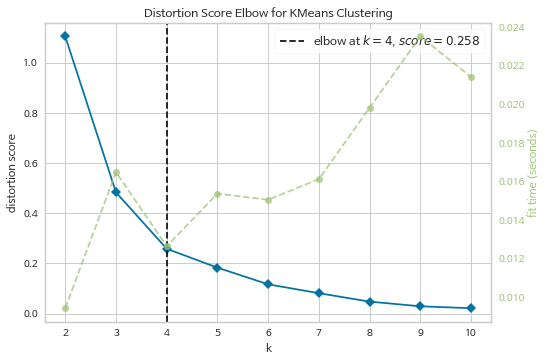

In [79]:
# 적절한 k값을 찾기 위해 Elbow Method 사용

km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(용산_df)
Elbow_M.show()

plt.show()

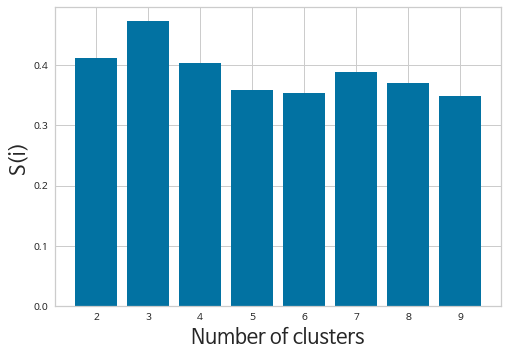

In [80]:
# 적절한 k값을 찾기 위해 Silhouette Method 사용

silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(용산_df)
    silhouette_scores.append(silhouette_score(용산_df, m1.fit_predict(용산_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [81]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)  #  Silhouette Method 사용 결과 적절한 k값 출력

Number of Cluster Required is :  3


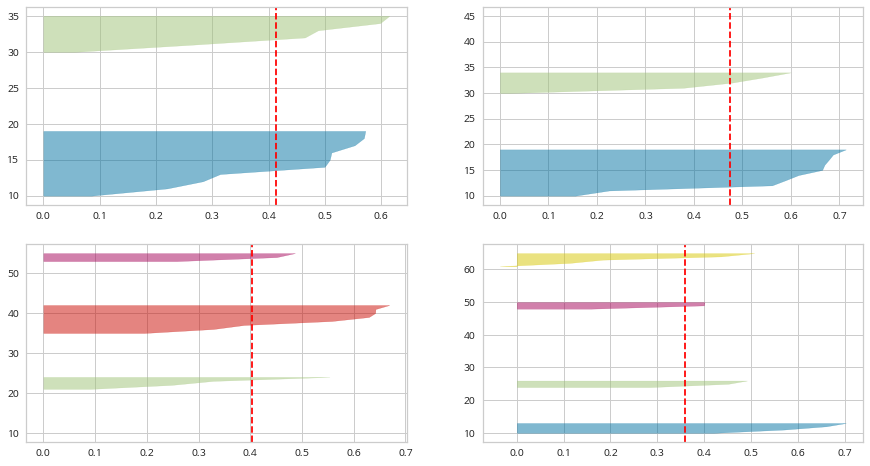

In [82]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [2, 3, 4, 5]:
    # Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(용산_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


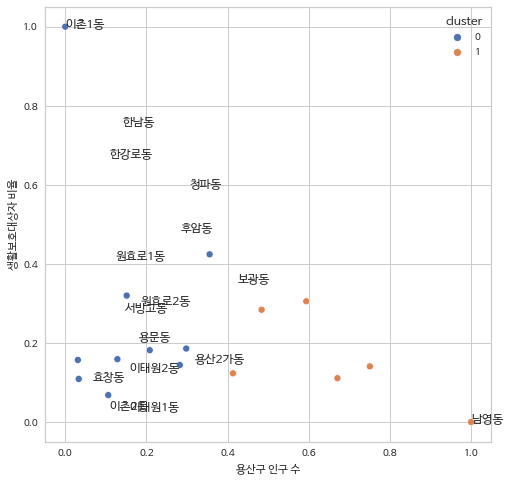

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


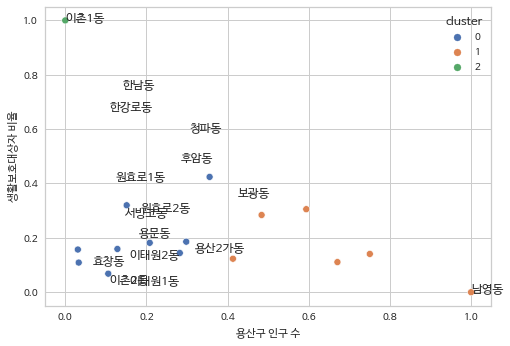

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


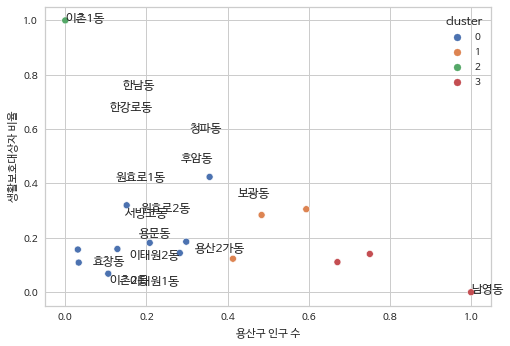

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


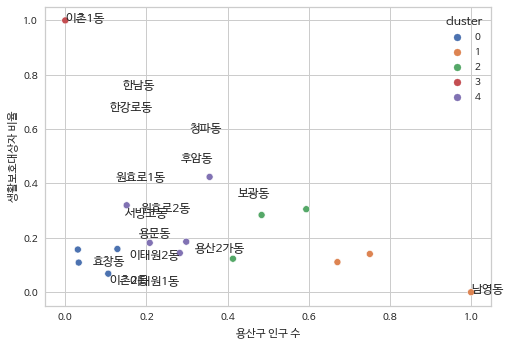

In [83]:
plt.figure(figsize = (8, 8))

for i in range(2,6):

  k = i
  model = KMeans(n_clusters = k, random_state = 10)
  model.fit(용산_df)
  용산_df['cluster'] = model.fit_predict(용산_df)

  cluster_df = pd.DataFrame()
  cluster_df['동'] = 동_df['동']
  cluster_df['인구 수'] = 용산_df['인구 수']
  cluster_df['생활보호대상자 비율'] = 용산_df['생활보호대상자 비율']
  cluster_df['cluster'] = 용산_df['cluster']

  cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})

  sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

  for index, dong, population, ratio, cluster in cluster_df.itertuples():
    plt.annotate(dong, (ratio, population))
  plt.xlabel('용산구 인구 수')
  plt.ylabel('생활보호대상자 비율')
  
  plt.show()

k=4

In [84]:
k = 4

# 그룹 수, random_state 설정 (실행할 때마다 같은 결과가 나오도록 고정)
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(용산_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
용산_df['cluster'] = model.fit_predict(용산_df)

In [85]:
용산_df['cluster'].value_counts()  # 군집별로 몇 개의 동이 있는지 확인

0    6
2    4
3    3
1    3
Name: cluster, dtype: int64

In [86]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.21595107, 0.37599059, 3.83333333],
       [0.80708403, 0.0838812 , 1.        ],
       [0.07470616, 0.12333163, 0.        ],
       [0.49700168, 0.23757968, 2.        ]])

In [87]:
# 동, 정규화한 인구 수, 정규화한 생활보호대상자 비율, 클러스터 넘버를 데이터프레임으로 만들기

cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 용산_df['인구 수']
cluster_df['생활보호대상자 비율'] = 용산_df['생활보호대상자 비율']
cluster_df['cluster'] = 용산_df['cluster']
cluster_df

동      인구 수  생활보호대상자 비율  cluster
0     후암동  0.483857    0.284081        3
1   용산2가동  0.151403    0.319897        0
2     남영동  0.000000    1.000000        0
3   원효로1동  0.413241    0.123170        3
4   원효로2동  0.298153    0.185907        0
5     효창동  0.106021    0.068172        2
6     용문동  0.208155    0.181712        0
7    이촌1동  1.000000    0.000000        1
8    이촌2동  0.033197    0.109059        2
9   이태원1동  0.031087    0.157028        2
10  이태원2동  0.128520    0.159067        2
11   서빙고동  0.282274    0.144232        0
12    보광동  0.355721    0.424197        0
13    청파동  0.593907    0.305488        3
14   한강로동  0.670712    0.110842        1
15    한남동  0.750540    0.140801        1

In [88]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

dong  population     ratio  cluster
0     후암동    0.483857  0.284081        3
1   용산2가동    0.151403  0.319897        0
2     남영동    0.000000  1.000000        0
3   원효로1동    0.413241  0.123170        3
4   원효로2동    0.298153  0.185907        0
5     효창동    0.106021  0.068172        2
6     용문동    0.208155  0.181712        0
7    이촌1동    1.000000  0.000000        1
8    이촌2동    0.033197  0.109059        2
9   이태원1동    0.031087  0.157028        2
10  이태원2동    0.128520  0.159067        2
11   서빙고동    0.282274  0.144232        0
12    보광동    0.355721  0.424197        0
13    청파동    0.593907  0.305488        3
14   한강로동    0.670712  0.110842        1
15    한남동    0.750540  0.140801        1

In [ ]:
cluster_df.to_csv('/content/drive/MyDrive/project/15. 모델 평가/용산_cluster.csv')

#### 12-1. 군집화 

In [89]:
# 클러스터별로 동 이름 출력하기

for i in range(4):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['용산2가동', '남영동', '원효로2동', '용문동', '서빙고동', '보광동']
cluster 1 :  ['이촌1동', '한강로동', '한남동']
cluster 2 :  ['효창동', '이촌2동', '이태원1동', '이태원2동']
cluster 3 :  ['후암동', '원효로1동', '청파동']


#### 12-2. 클러스터별 인구수, 체육시설 수

In [90]:
# 클러스터별로 인구 수 합치기

용산_peo_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/용산구_인구수, 수급인구비율.csv', index_col=0)
용산_peo_df = 용산_peo_df[['동', '인구 수']]
용산_peo_df = 용산_peo_df.rename(columns={'동':'dong'})
용산_peo_df


df_all = pd.merge(cluster_df, 용산_peo_df, on='dong')
df_all

dong  population     ratio  cluster     인구 수
0     후암동    0.483857  0.284081        3  18202.0
1   용산2가동    0.151403  0.319897        0  11272.0
2     남영동    0.000000  1.000000        0   8116.0
3   원효로1동    0.413241  0.123170        3  16730.0
4   원효로2동    0.298153  0.185907        0  14331.0
5     효창동    0.106021  0.068172        2  10326.0
6     용문동    0.208155  0.181712        0  12455.0
7    이촌1동    1.000000  0.000000        1  28961.0
8    이촌2동    0.033197  0.109059        2   8808.0
9   이태원1동    0.031087  0.157028        2   8764.0
10  이태원2동    0.128520  0.159067        2  10795.0
11   서빙고동    0.282274  0.144232        0  14000.0
12    보광동    0.355721  0.424197        0  15531.0
13    청파동    0.593907  0.305488        3  20496.0
14   한강로동    0.670712  0.110842        1  22097.0
15    한남동    0.750540  0.140801        1  23761.0

In [91]:
# 클러스터별로 인구 수 합계

for i in range(df_all['cluster'].nunique()):
  num = 0
  for j in range(len(df_all)):
    if df_all['cluster'][j] == i:
      num += df_all['인구 수'][j]
  print('cluster ' + str(i) + ' : ', num)

cluster 0 :  75705.0
cluster 1 :  74819.0
cluster 2 :  38693.0
cluster 3 :  55428.0


In [92]:
# a+b+c=5

def prop(a, b, c, d):
  
  p1 = a*10000/75705.0
  p2 = b*10000/74819.0
  p3 = c*10000/38693.0
  p4 = d*10000/55428.0

  return ((p1-p2)**2 + (p1-p3)**2 + (p1-p4)**2 + (p2-p3)**2 + (p2-p4)**2 + (p3-p4)**2)

In [93]:
lst = []

for i, j, k, l in product(range(6), range(6), range(6), range(6)):
  if (i+j+k+l==5):
    lst.append([prop(i,j,k,l), (i,j,k,l)])

In [94]:
lst.sort()
lst

[[0.047934948228209345, (2, 1, 1, 1)],
 [0.05030319016882026, (1, 2, 1, 1)],
 [0.14595010763365193, (1, 1, 1, 2)],
 [0.1883759559775764, (2, 2, 0, 1)],
 [0.20816342348020442, (2, 2, 1, 0)],
 [0.28663932064943226, (2, 0, 1, 2)],
 [0.2877528532378884, (0, 2, 1, 2)],
 [0.29583898767235517, (2, 1, 0, 2)],
 [0.2984513428667745, (1, 2, 0, 2)],
 [0.32519810444678265, (3, 1, 0, 1)],
 [0.32805866490761526, (3, 0, 1, 1)],
 [0.334045766128387, (1, 3, 0, 1)],
 [0.335163390729448, (0, 3, 1, 1)],
 [0.34522968520321906, (3, 1, 1, 0)],
 [0.3535891203772066, (1, 3, 1, 0)],
 [0.41267652490596596, (1, 1, 2, 1)],
 [0.47361046546883073, (3, 2, 0, 0)],
 [0.47984577195601574, (2, 3, 0, 0)],
 [0.5536098511755547, (2, 0, 2, 1)],
 [0.554235157256394, (0, 2, 2, 1)],
 [0.5757185910979528, (3, 0, 0, 2)],
 [0.5825969857011056, (2, 1, 2, 0)],
 [0.5835556566812106, (0, 3, 0, 2)],
 [0.5847211143879081, (1, 2, 2, 0)],
 [0.6380659604912786, (0, 1, 2, 2)],
 [0.6392751634195469, (0, 1, 1, 3)],
 [0.6395647830972419, (1, 0,

#### **공공체육시설 입지 선정 모델 결과**
- cluster 0 : '용산2가동', '남영동', '원효로2동', '용문동', '서빙고동', '보광동' (2개)
- cluster 1 : '이촌1동', '한강로동', '한남동' (1개)
- cluster 2 : '효창동', '이촌2동', '이태원1동', '이태원2동' (1개)
- cluster 3 : '후암동', '원효로1동', '청파동' (1개)

#### **2020년 기준 용산구 공공체육시설 설치 개수**
- cluster 0 : 원효로2동(1개) = 1개
- cluster 1 : 이촌1동(1개) + 한강로동(1개) + 한남동(3개) = 5개
- cluster 2 : 이태원1동(1개) = 1개
- cluster 3 : 후암동(1개) + 원효로1동(1개) = 2개

### 13. 종로구

In [95]:
# 동별 정규화한 인구수, 정규화한 생활보호대상자 비율 데이터 불러오기

종로_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/종로구_인구수, 수급인구비율.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] =종로_df['동']
종로_df = 종로_df.iloc[:,2:]
종로_df = 종로_df.rename(columns={'인구수_scaled':'인구 수', '수급인구비율_scaled':'생활보호대상자 비율'})
종로_df

인구 수  생활보호대상자 비율
0   0.409926    0.067780
1   0.000000    0.078787
2   0.441248    0.083738
3   0.931530    0.000000
4   0.337771    0.125039
5   0.459138    0.154979
6   0.089688    0.099301
7   0.329212    1.000000
8   0.163269    0.516658
9   0.309183    0.299437
10  0.181575    0.805874
11  0.391917    0.468642
12  0.249510    0.289623
13  0.206776    0.484250
14  0.432036    0.401887
15  0.577949    0.080594
16  1.000000    0.103060

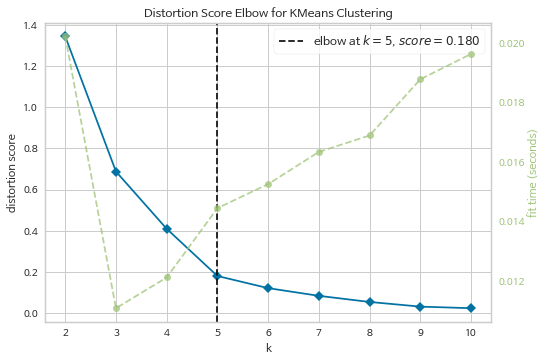

In [96]:
# 적절한 k값을 찾기 위해 Elbow Method 사용

km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(종로_df)
Elbow_M.show()

plt.show()

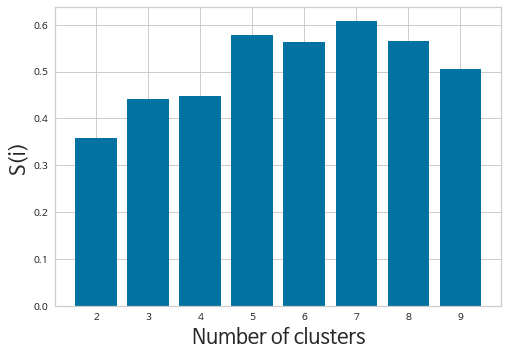

In [97]:
# 적절한 k값을 찾기 위해 Silhouette Method 사용

silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(종로_df)
    silhouette_scores.append(silhouette_score(종로_df, m1.fit_predict(종로_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [98]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)  #  Silhouette Method 사용 결과 적절한 k값 출력

Number of Cluster Required is :  7


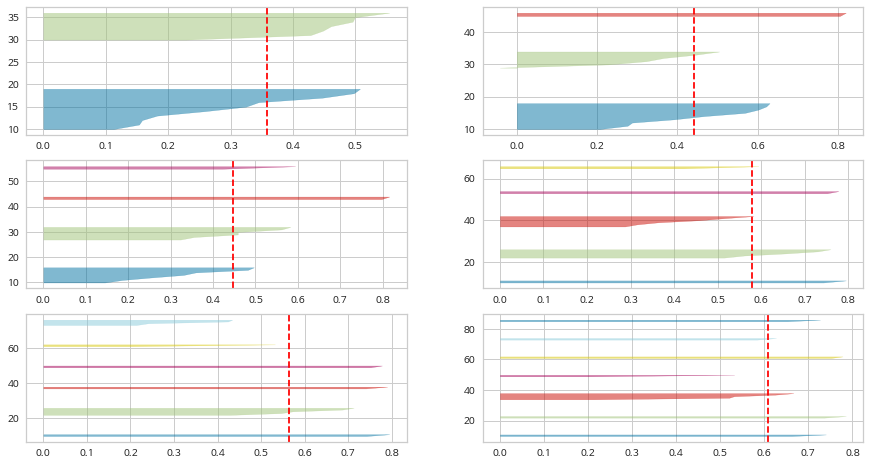

In [99]:
fig, ax = plt.subplots(3, 2, figsize=(15,8))

for i in [2, 3, 4, 5, 6, 7]:
    # Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(종로_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


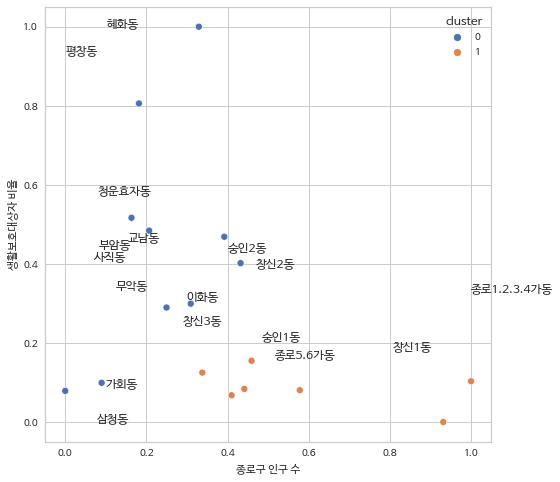

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


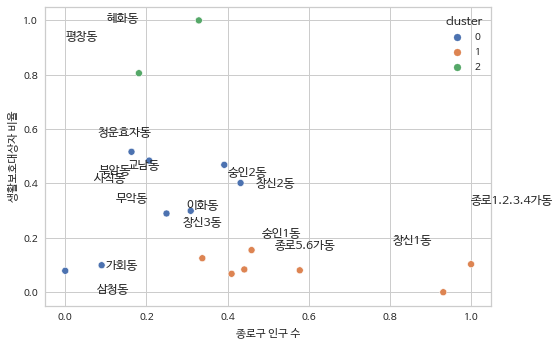

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


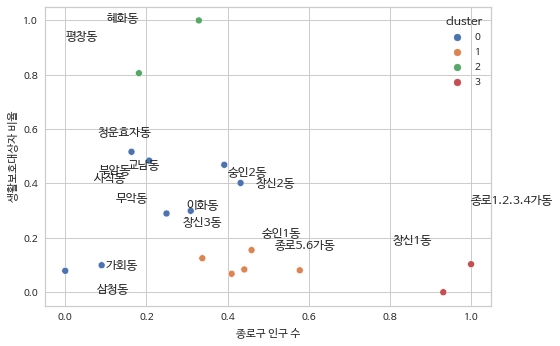

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


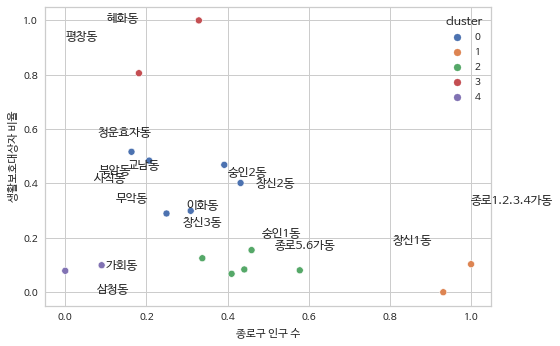

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


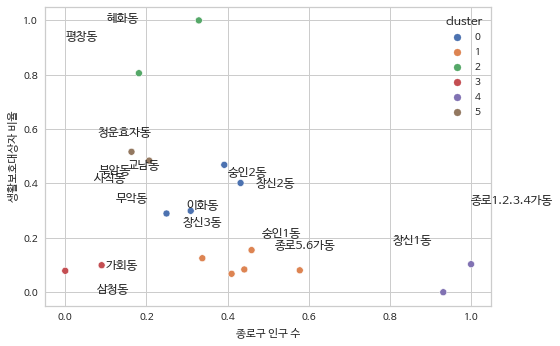

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


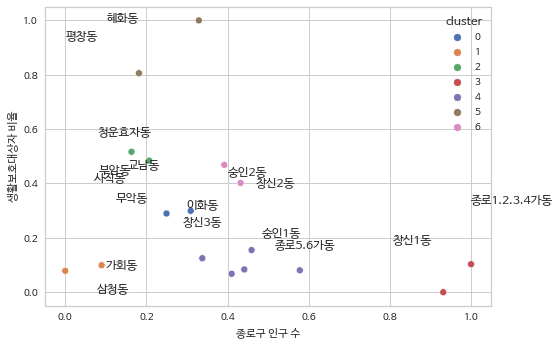

In [100]:
plt.figure(figsize = (8, 8))

for i in range(2,8):

  k = i
  model = KMeans(n_clusters = k, random_state = 10)
  model.fit(종로_df)
  종로_df['cluster'] = model.fit_predict(종로_df)

  cluster_df = pd.DataFrame()
  cluster_df['동'] = 동_df['동']
  cluster_df['인구 수'] = 종로_df['인구 수']
  cluster_df['생활보호대상자 비율'] = 종로_df['생활보호대상자 비율']
  cluster_df['cluster'] = 종로_df['cluster']

  cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})

  sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

  for index, dong, population, ratio, cluster in cluster_df.itertuples():
    plt.annotate(dong, (ratio, population))
  plt.xlabel('종로구 인구 수')
  plt.ylabel('생활보호대상자 비율')
  
  plt.show()

k=5

In [101]:
k = 5

# 그룹 수, random_state 설정 (실행할 때마다 같은 결과가 나오도록 고정)
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(종로_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
종로_df['cluster'] = model.fit_predict(종로_df)

In [102]:
종로_df['cluster'].value_counts()  # 군집별로 몇 개의 동이 있는지 확인

2    5
3    4
0    4
4    2
1    2
Name: cluster, dtype: int64

In [103]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.33368499, 0.66910073, 5.5       ],
       [0.18502229, 0.50045385, 2.        ],
       [0.44520654, 0.10242631, 4.        ],
       [0.1620951 , 0.19178696, 0.5       ],
       [0.96576523, 0.05153012, 3.        ]])

In [104]:
# 동, 정규화한 인구 수, 정규화한 생활보호대상자 비율, 클러스터 넘버를 데이터프레임으로 만들기

cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 종로_df['인구 수']
cluster_df['생활보호대상자 비율'] = 종로_df['생활보호대상자 비율']
cluster_df['cluster'] = 종로_df['cluster']
cluster_df

동      인구 수  생활보호대상자 비율  cluster
0           사직동  0.409926    0.067780        2
1           삼청동  0.000000    0.078787        3
2           부암동  0.441248    0.083738        2
3           평창동  0.931530    0.000000        4
4           무악동  0.337771    0.125039        2
5           교남동  0.459138    0.154979        2
6           가회동  0.089688    0.099301        3
7   종로1.2.3.4가동  0.329212    1.000000        0
8       종로5.6가동  0.163269    0.516658        1
9           이화동  0.309183    0.299437        3
10         창신1동  0.181575    0.805874        0
11         창신2동  0.391917    0.468642        0
12         창신3동  0.249510    0.289623        3
13         숭인1동  0.206776    0.484250        1
14         숭인2동  0.432036    0.401887        0
15        청운효자동  0.577949    0.080594        2
16          혜화동  1.000000    0.103060        4

In [105]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

dong  population     ratio  cluster
0           사직동    0.409926  0.067780        2
1           삼청동    0.000000  0.078787        3
2           부암동    0.441248  0.083738        2
3           평창동    0.931530  0.000000        4
4           무악동    0.337771  0.125039        2
5           교남동    0.459138  0.154979        2
6           가회동    0.089688  0.099301        3
7   종로1.2.3.4가동    0.329212  1.000000        0
8       종로5.6가동    0.163269  0.516658        1
9           이화동    0.309183  0.299437        3
10         창신1동    0.181575  0.805874        0
11         창신2동    0.391917  0.468642        0
12         창신3동    0.249510  0.289623        3
13         숭인1동    0.206776  0.484250        1
14         숭인2동    0.432036  0.401887        0
15        청운효자동    0.577949  0.080594        2
16          혜화동    1.000000  0.103060        4

In [ ]:
cluster_df.to_csv('/content/drive/MyDrive/project/15. 모델 평가/종로_cluster.csv')

####13-1. 군집화

In [106]:
# 클러스터별로 동 이름 출력하기

for i in range(5):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['종로1.2.3.4가동', '창신1동', '창신2동', '숭인2동']
cluster 1 :  ['종로5.6가동', '숭인1동']
cluster 2 :  ['사직동', '부암동', '무악동', '교남동', '청운효자동']
cluster 3 :  ['삼청동', '가회동', '이화동', '창신3동']
cluster 4 :  ['평창동', '혜화동']


#### 13-2. 클러스터별 인구수, 체육시설 수

In [107]:
# 클러스터별로 인구 수 합치기

종로_peo_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/종로구_인구수, 수급인구비율.csv', index_col=0)
종로_peo_df = 종로_peo_df[['동', '인구 수']]
종로_peo_df = 종로_peo_df.rename(columns={'동':'dong'})
종로_peo_df


df_all = pd.merge(cluster_df, 종로_peo_df, on='dong')
df_all

dong  population     ratio  cluster     인구 수
0           사직동    0.409926  0.067780        2   9806.0
1           삼청동    0.000000  0.078787        3   2909.0
2           부암동    0.441248  0.083738        2  10333.0
3           평창동    0.931530  0.000000        4  18582.0
4           무악동    0.337771  0.125039        2   8592.0
5           교남동    0.459138  0.154979        2  10634.0
6           가회동    0.089688  0.099301        3   4418.0
7   종로1.2.3.4가동    0.329212  1.000000        0   8448.0
8       종로5.6가동    0.163269  0.516658        1   5656.0
9           이화동    0.309183  0.299437        3   8111.0
10         창신1동    0.181575  0.805874        0   5964.0
11         창신2동    0.391917  0.468642        0   9503.0
12         창신3동    0.249510  0.289623        3   7107.0
13         숭인1동    0.206776  0.484250        1   6388.0
14         숭인2동    0.432036  0.401887        0  10178.0
15        청운효자동    0.577949  0.080594        2  12633.0
16          혜화동    1.000000  0.103060        4  19734.0

In [108]:
# 클러스터별로 인구 수 합계

for i in range(df_all['cluster'].nunique()):
  num = 0
  for j in range(len(df_all)):
    if df_all['cluster'][j] == i:
      num += df_all['인구 수'][j]
  print('cluster ' + str(i) + ' : ', num)

cluster 0 :  34093.0
cluster 1 :  12044.0
cluster 2 :  51998.0
cluster 3 :  22545.0
cluster 4 :  38316.0


In [109]:
# a+b+c+d+e = 3

def prop(a, b, c, d, e):
  
  p1 = a*10000/34093.0
  p2 = b*10000/12044.0
  p3 = c*10000/51998.0
  p4 = d*10000/22545.0
  p5 = e*10000/38316.0

  return ((p1-p2)**2 + (p1-p3)**2 + (p1-p4)**2 + (p2-p3)**2 + (p2-p4)**2 + (p3-p4)**2 + (p1-p5)**2 + (p2-p5)**2 + (p3-p5)**2 + (p4-p5)**2)


In [110]:
lst = []

for i, j, k, l, m in product(range(4), range(4), range(4), range(4), range(4)):
  if (i+j+k+l+m==3):
    lst.append([prop(i,j,k,l,m), (i,j,k,l,m)])

In [111]:
lst.sort()
lst

[[0.3982290453371411, (1, 0, 1, 0, 1)],
 [0.6634521605145915, (0, 0, 2, 0, 1)],
 [0.7048557160155888, (0, 0, 1, 1, 1)],
 [0.7102611926158344, (1, 0, 2, 0, 0)],
 [0.7354205472127543, (1, 0, 1, 1, 0)],
 [0.7587324751663164, (1, 0, 0, 1, 1)],
 [1.0370052229620257, (0, 0, 1, 0, 2)],
 [1.0375228453035326, (0, 0, 2, 1, 0)],
 [1.1277611650260808, (1, 0, 0, 0, 2)],
 [1.2988467585002121, (2, 0, 1, 0, 0)],
 [1.3314633650347905, (0, 0, 3, 0, 0)],
 [1.3427936684630244, (2, 0, 0, 0, 1)],
 [1.4137528536952784, (0, 0, 0, 1, 2)],
 [1.6431059874253098, (2, 0, 0, 1, 0)],
 [2.3005460326966194, (1, 1, 0, 0, 1)],
 [2.32478925559982, (0, 1, 1, 0, 1)],
 [2.3303497485031155, (1, 1, 1, 0, 0)],
 [2.404788077854596, (1, 1, 0, 1, 0)],
 [2.415471785855378, (0, 1, 0, 1, 1)],
 [2.452122552377092, (0, 0, 0, 0, 3)],
 [2.465910483671125, (0, 1, 1, 1, 0)],
 [2.7105720286478223, (0, 1, 2, 0, 0)],
 [2.9546189812959267, (0, 0, 1, 2, 0)],
 [2.957295927240238, (0, 0, 0, 2, 1)],
 [2.9716165575333258, (1, 0, 0, 2, 0)],
 [2.980

#### **공공체육시설 입지 선정 모델 결과**
- cluster 0 :  '종로1.2.3.4가동', '창신1동' (1개)
- cluster 1 :  '삼청동', '가회동', '이화동', '창신3동' (0개)
- cluster 2 :  '사직동', '부암동', '무악동', '교남동', '청운효자동' (1개)
- cluster 3 :  '평창동', '혜화동' (0개)
- cluster 4 :  '종로5.6가동', '창신2동', '숭인1동', '숭인2동' (1개)

#### **2020년 기준 종로구 공공체육시설 설치 개수**
- cluster 0 :  종로1.2.3.4가동(2개) + 창신1동(1개) = 3개
- cluster 1 :  0개
- cluster 2 :  사직동(1개) + 청운효자동(2개) = 3개
- cluster 3 :  평창동(1개) + 혜화동(1개) = 2개
- cluster 4 :  종로5.6가동(2개) = 2개

### 14. 은평구

In [112]:
# 동별 정규화한 인구수, 정규화한 생활보호대상자 비율 데이터 불러오기

은평_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/은평구_인구수, 수급인구비율.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] =은평_df['동']
은평_df = 은평_df.iloc[:,2:]
은평_df = 은평_df.rename(columns={'인구수_scaled':'인구 수', '수급인구비율_scaled':'생활보호대상자 비율'})
은평_df

인구 수  생활보호대상자 비율
0   0.577351    0.322738
1   0.625332    0.345199
2   0.380060    0.927228
3   0.263881    1.000000
4   0.390908    0.490290
5   0.472608    0.385243
6   0.354820    0.564025
7   0.434954    0.198100
8   0.359103    0.234493
9   0.310774    0.879632
10  0.359103    0.224357
11  0.210596    0.588340
12  0.091939    0.323584
13  0.000000    0.419886
14  1.000000    0.000000
15  0.775708    0.430046

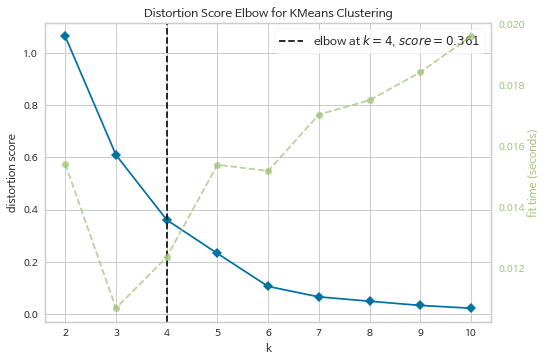

In [113]:
# 적절한 k값을 찾기 위해 Elbow Method 사용

km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(은평_df)
Elbow_M.show()

plt.show()

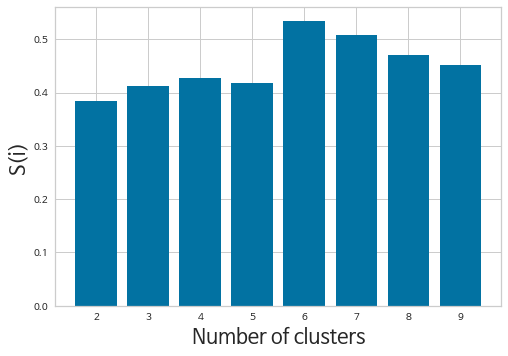

In [114]:
# 적절한 k값을 찾기 위해 Silhouette Method 사용

silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(은평_df)
    silhouette_scores.append(silhouette_score(은평_df, m1.fit_predict(은평_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [115]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)  #  Silhouette Method 사용 결과 적절한 k값 출력

Number of Cluster Required is :  6


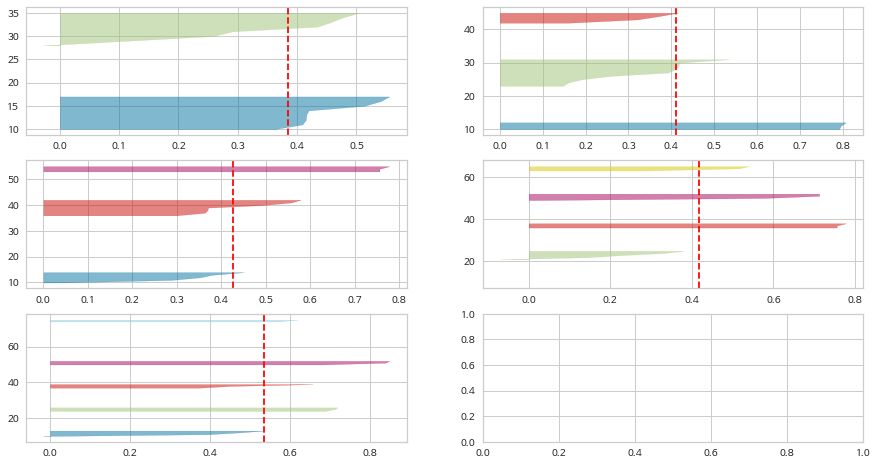

In [116]:
fig, ax = plt.subplots(3, 2, figsize=(15,8))

for i in [2, 3, 4, 5, 6]:
    # Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(은평_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


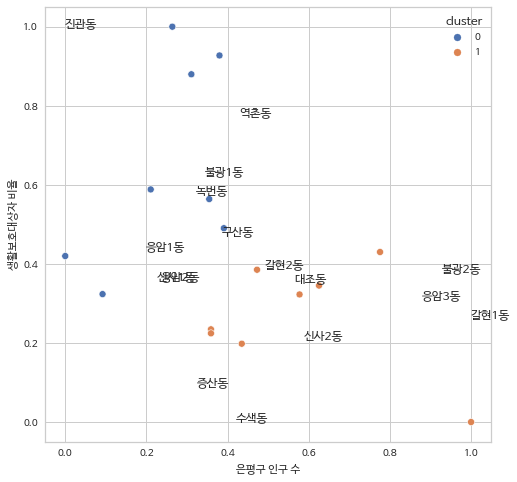

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


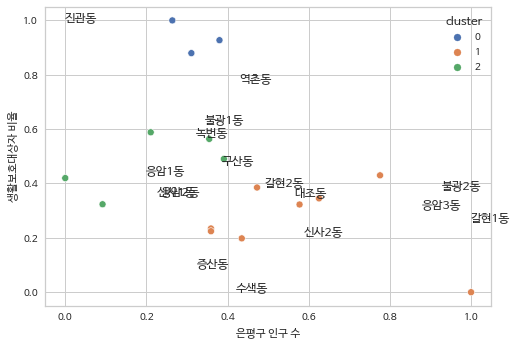

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


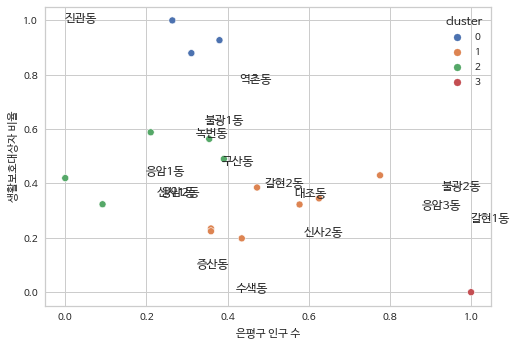

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


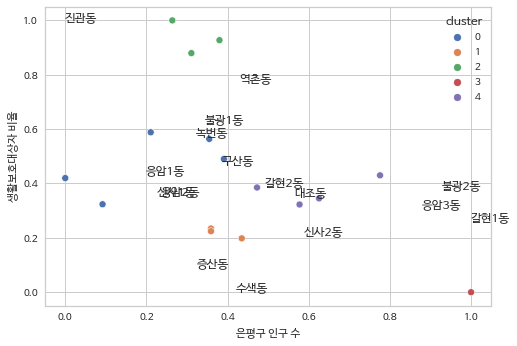

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


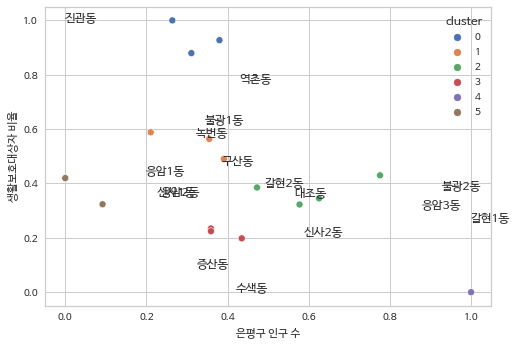

In [117]:
plt.figure(figsize = (8, 8))

for i in range(2,7):

  k = i
  model = KMeans(n_clusters = k, random_state = 10)
  model.fit(은평_df)
  은평_df['cluster'] = model.fit_predict(은평_df)

  cluster_df = pd.DataFrame()
  cluster_df['동'] = 동_df['동']
  cluster_df['인구 수'] = 은평_df['인구 수']
  cluster_df['생활보호대상자 비율'] = 은평_df['생활보호대상자 비율']
  cluster_df['cluster'] = 은평_df['cluster']

  cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})

  sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

  for index, dong, population, ratio, cluster in cluster_df.itertuples():
    plt.annotate(dong, (ratio, population))
  plt.xlabel('은평구 인구 수')
  plt.ylabel('생활보호대상자 비율')
  
  plt.show()

k=4

In [118]:
k = 4

# 그룹 수, random_state 설정 (실행할 때마다 같은 결과가 나오도록 고정)
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(은평_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
은평_df['cluster'] = model.fit_predict(은평_df)

In [119]:
은평_df['cluster'].value_counts()  # 군집별로 몇 개의 동이 있는지 확인

0    6
3    4
1    4
2    2
Name: cluster, dtype: int64

In [120]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.3185066 , 0.74158579, 0.5       ],
       [0.53828971, 0.16423774, 3.25      ],
       [0.04596939, 0.37173493, 5.        ],
       [0.61274947, 0.37080663, 2.        ]])

In [121]:
# 동, 정규화한 인구 수, 정규화한 생활보호대상자 비율, 클러스터 넘버를 데이터프레임으로 만들기

cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 은평_df['인구 수']
cluster_df['생활보호대상자 비율'] = 은평_df['생활보호대상자 비율']
cluster_df['cluster'] = 은평_df['cluster']
cluster_df

동      인구 수  생활보호대상자 비율  cluster
0    녹번동  0.577351    0.322738        3
1   불광1동  0.625332    0.345199        3
2   불광2동  0.380060    0.927228        0
3   갈현1동  0.263881    1.000000        0
4   갈현2동  0.390908    0.490290        0
5    구산동  0.472608    0.385243        3
6    대조동  0.354820    0.564025        0
7   응암1동  0.434954    0.198100        1
8   응암2동  0.359103    0.234493        1
9   응암3동  0.310774    0.879632        0
10  신사1동  0.359103    0.224357        1
11  신사2동  0.210596    0.588340        0
12   증산동  0.091939    0.323584        2
13   수색동  0.000000    0.419886        2
14   진관동  1.000000    0.000000        1
15   역촌동  0.775708    0.430046        3

In [122]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

dong  population     ratio  cluster
0    녹번동    0.577351  0.322738        3
1   불광1동    0.625332  0.345199        3
2   불광2동    0.380060  0.927228        0
3   갈현1동    0.263881  1.000000        0
4   갈현2동    0.390908  0.490290        0
5    구산동    0.472608  0.385243        3
6    대조동    0.354820  0.564025        0
7   응암1동    0.434954  0.198100        1
8   응암2동    0.359103  0.234493        1
9   응암3동    0.310774  0.879632        0
10  신사1동    0.359103  0.224357        1
11  신사2동    0.210596  0.588340        0
12   증산동    0.091939  0.323584        2
13   수색동    0.000000  0.419886        2
14   진관동    1.000000  0.000000        1
15   역촌동    0.775708  0.430046        3

In [ ]:
cluster_df.to_csv('/content/drive/MyDrive/project/15. 모델 평가/은평_cluster.csv')

#### 14-1. 군집화

In [123]:
# 클러스터별로 동 이름 출력하기

for i in range(4):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['불광2동', '갈현1동', '갈현2동', '대조동', '응암3동', '신사2동']
cluster 1 :  ['응암1동', '응암2동', '신사1동', '진관동']
cluster 2 :  ['증산동', '수색동']
cluster 3 :  ['녹번동', '불광1동', '구산동', '역촌동']


#### 14-2. 클러스터별 인구수, 체육시설 수

In [125]:
# 클러스터별로 인구 수 합치기

은평_peo_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/은평구_인구수, 수급인구비율.csv', index_col=0)
은평_peo_df = 은평_peo_df[['동', '인구 수']]
은평_peo_df = 은평_peo_df.rename(columns={'동':'dong'})
은평_peo_df


df_all = pd.merge(cluster_df, 은평_peo_df, on='dong')
df_all

dong  population     ratio  cluster     인구 수
0    녹번동    0.577351  0.322738        3  37815.0
1   불광1동    0.625332  0.345199        3  40022.0
2   불광2동    0.380060  0.927228        0  28740.0
3   갈현1동    0.263881  1.000000        0  23396.0
4   갈현2동    0.390908  0.490290        0  29239.0
5    구산동    0.472608  0.385243        3  32997.0
6    대조동    0.354820  0.564025        0  27579.0
7   응암1동    0.434954  0.198100        1  31265.0
8   응암2동    0.359103  0.234493        1  27776.0
9   응암3동    0.310774  0.879632        0  25553.0
10  신사1동    0.359103  0.224357        1  27776.0
11  신사2동    0.210596  0.588340        0  20945.0
12   증산동    0.091939  0.323584        2  15487.0
13   수색동    0.000000  0.419886        2  11258.0
14   진관동    1.000000  0.000000        1  57256.0
15   역촌동    0.775708  0.430046        3  46939.0

In [126]:
# 클러스터별로 인구 수 합계

for i in range(df_all['cluster'].nunique()):
  num = 0
  for j in range(len(df_all)):
    if df_all['cluster'][j] == i:
      num += df_all['인구 수'][j]
  print('cluster ' + str(i) + ' : ', num)

cluster 0 :  155452.0
cluster 1 :  144073.0
cluster 2 :  26745.0
cluster 3 :  157773.0


In [127]:
# a+b+c+d=11

def prop(a, b, c, d):
  
  p1 = a*10000/155452.0
  p2 = b*10000/144073.0
  p3 = c*10000/26745.0
  p4 = d*10000/157773.0

  return ((p1-p2)**2 + (p1-p3)**2 + (p1-p4)**2 + (p2-p3)**2 + (p2-p4)**2 + (p3-p4)**2)

In [128]:
lst = []

for i, j, k, l in product(range(12), range(12), range(12), range(12)):
  if (i+j+k+l==11):
    lst.append([prop(i,j,k,l), (i,j,k,l)])

In [129]:
lst.sort()
lst

[[0.08061806401496299, (3, 3, 1, 4)],
 [0.0820542891949459, (4, 3, 1, 3)],
 [0.09059191529939055, (3, 4, 1, 3)],
 [0.1105603548997601, (4, 2, 1, 4)],
 [0.12227059341498903, (2, 4, 1, 4)],
 [0.12415516045650205, (4, 4, 1, 2)],
 [0.14125114969690575, (3, 2, 1, 5)],
 [0.14442376210769003, (2, 3, 1, 5)],
 [0.14511148337532437, (5, 2, 1, 3)],
 [0.14873243764763877, (5, 3, 1, 2)],
 [0.1707243616886583, (2, 5, 1, 3)],
 [0.17117270355018843, (3, 5, 1, 2)],
 [0.178322219487315, (4, 3, 0, 4)],
 [0.1900151699196349, (3, 4, 0, 4)],
 [0.1920277003876308, (4, 4, 0, 3)],
 [0.20843670899644767, (3, 3, 0, 5)],
 [0.20967335757094455, (4, 1, 1, 5)],
 [0.2120974660693803, (5, 1, 1, 4)],
 [0.2134496532508923, (5, 3, 0, 3)],
 [0.21919119480329743, (1, 4, 1, 5)],
 [0.22296032888632344, (5, 4, 1, 1)],
 [0.23522367555336954, (4, 2, 0, 5)],
 [0.23551794309983815, (1, 5, 1, 4)],
 [0.23686296868442847, (4, 5, 1, 1)],
 [0.2371838677667613, (2, 2, 1, 6)],
 [0.23822408933981826, (5, 2, 0, 4)],
 [0.24220056780919239,

#### **공공체육시설 입지 선정 모델 결과**
- cluster 0 : '불광2동', '갈현1동', '갈현2동', '대조동', '응암3동', '신사2동' (3개)
- cluster 1 : '응암1동', '응암2동', '신사1동', '진관동' (3개)
- cluster 2 : '증산동', '수색동' (1개)
- cluster 3 : '녹번동', '불광1동', '구산동', '역촌동' (4개)

#### **2020년 기준 은평구 공공체육시설 설치 개수**
- cluster 0 : 대조동(1개) = 1개
- cluster 1 : 응암1동(1개) + 응암2동(1개) + 진관동(3개) = 5개
- cluster 2 : 증산동(1개) = 1개
- cluster 3 : 불광1동(1개) + 구산동(3개) = 4개

### 15. 노원구

In [ ]:
# 노원구 동별 정규화한 인구수, 정규화한 생활보호대상자 비율 데이터 불러오기

노원_df = pd.read_csv('/content/drive/MyDrive/project/12. 공체시설 부족 자치구/2020 노원구.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] =노원_df['동']
노원_df = 노원_df.iloc[:,1:]
노원_df

인구 수  생활보호대상자 비율
0   0.239958    0.202333
1   0.439263    0.868683
2   0.578952    0.419148
3   0.910423    0.437892
4   1.000000    0.077524
5   0.454661    0.763955
6   0.224031    0.330750
7   0.321660    0.052144
8   0.436667    0.106413
9   0.137314    0.651127
10  0.949140    0.263459
11  0.134674    0.265845
12  0.315280    0.445351
13  0.234590    0.000000
14  0.157948    0.074183
15  0.000000    0.072223
16  0.789960    1.000000
17  0.420300    0.655065
18  0.704430    0.130134

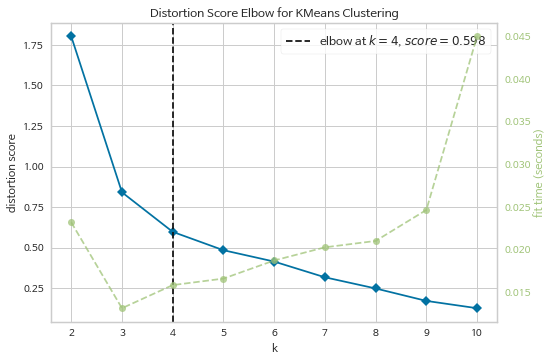

In [ ]:
# 적절한 k값을 찾기 위해 Elbow Method 사용

km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(노원_df)
Elbow_M.show()

plt.show()

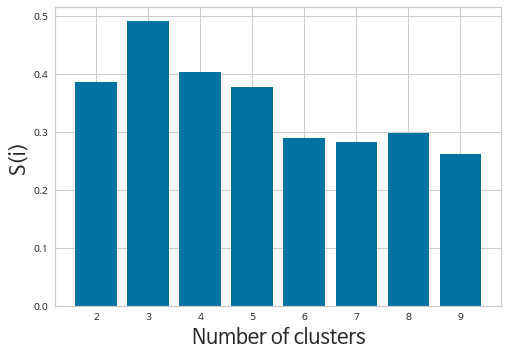

In [ ]:
# 적절한 k값을 찾기 위해 Silhouette Method 사용

silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(노원_df)
    silhouette_scores.append(silhouette_score(노원_df, m1.fit_predict(노원_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [ ]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)  #  Silhouette Method 사용 결과 적절한 k값 출력

Number of Cluster Required is :  3


In [ ]:
k = 3

# 그룹 수, random_state 설정 (실행할 때마다 같은 결과가 나오도록 고정)
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(노원_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
노원_df['cluster'] = model.fit_predict(노원_df)

In [ ]:
노원_df['cluster'].value_counts()  # 군집별로 몇 개의 동이 있는지 확인

0    9
1    5
2    5
Name: cluster, dtype: int64

In [ ]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.22942301, 0.17213812],
       [0.44829953, 0.78776607],
       [0.82858903, 0.26563135]])

In [ ]:
# 동, 정규화한 인구 수, 정규화한 생활보호대상자 비율, 클러스터 넘버를 데이터프레임으로 만들기

cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 노원_df['인구 수']
cluster_df['생활보호대상자 비율'] = 노원_df['생활보호대상자 비율']
cluster_df['cluster'] = 노원_df['cluster']
cluster_df

동      인구 수  생활보호대상자 비율  cluster
0     월계1동  0.239958    0.202333        0
1     월계2동  0.439263    0.868683        1
2     월계3동  0.578952    0.419148        2
3     공릉1동  0.910423    0.437892        2
4     공릉2동  1.000000    0.077524        2
5     하계1동  0.454661    0.763955        1
6     하계2동  0.224031    0.330750        0
7     중계본동  0.321660    0.052144        0
8     중계1동  0.436667    0.106413        0
9     중계4동  0.137314    0.651127        1
10    상계1동  0.949140    0.263459        2
11    상계2동  0.134674    0.265845        0
12    상계5동  0.315280    0.445351        0
13    상계8동  0.234590    0.000000        0
14    상계9동  0.157948    0.074183        0
15   상계10동  0.000000    0.072223        0
16  중계2.3동  0.789960    1.000000        1
17  상계3.4동  0.420300    0.655065        1
18  상계6.7동  0.704430    0.130134        2

In [ ]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

dong  population     ratio  cluster
0     월계1동    0.239958  0.202333        0
1     월계2동    0.439263  0.868683        1
2     월계3동    0.578952  0.419148        2
3     공릉1동    0.910423  0.437892        2
4     공릉2동    1.000000  0.077524        2
5     하계1동    0.454661  0.763955        1
6     하계2동    0.224031  0.330750        0
7     중계본동    0.321660  0.052144        0
8     중계1동    0.436667  0.106413        0
9     중계4동    0.137314  0.651127        1
10    상계1동    0.949140  0.263459        2
11    상계2동    0.134674  0.265845        0
12    상계5동    0.315280  0.445351        0
13    상계8동    0.234590  0.000000        0
14    상계9동    0.157948  0.074183        0
15   상계10동    0.000000  0.072223        0
16  중계2.3동    0.789960  1.000000        1
17  상계3.4동    0.420300  0.655065        1
18  상계6.7동    0.704430  0.130134        2

#### **군집화**

In [ ]:
# 클러스터별로 동 이름 출력하기

for i in range(number_of_clusters):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['월계1동', '하계2동', '중계본동', '중계1동', '상계2동', '상계5동', '상계8동', '상계9동', '상계10동']
cluster 1 :  ['월계2동', '하계1동', '중계4동', '중계2.3동', '상계3.4동']
cluster 2 :  ['월계3동', '공릉1동', '공릉2동', '상계1동', '상계6.7동']


#### **입지선정**
- cluster0 : 2개 (월계1동, 상계9동)
- cluster1 : 2개 (하계1동, 월계2동)
- cluster2 : 3개 (상계1동, 상계6.7동, 공릉1동)

In [ ]:
# cluster0

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 0:
    lst.append([(cluster_df['population'][i]-centers[0][0])**2 + (cluster_df['ratio'][i]-centers[0][1])**2, i])  # 각 군집의 중심점에서부터 동까지의 거리
  
lst

[[0.0010227190791686294, 0],
 [0.025186957520726493, 6],
 [0.022906178139503387, 7],
 [0.04726974813105615, 8],
 [0.01775844851012809, 11],
 [0.08201650461881016, 12],
 [0.02965823027665046, 13],
 [0.014703910209011496, 14],
 [0.06261785627481849, 15]]

In [ ]:
# 각 군집의 중심점에서 가까운 순서대로 동 나열

lst.sort()
lst

[[0.0010227190791686294, 0],
 [0.014703910209011496, 14],
 [0.01775844851012809, 11],
 [0.022906178139503387, 7],
 [0.025186957520726493, 6],
 [0.02965823027665046, 13],
 [0.04726974813105615, 8],
 [0.06261785627481849, 15],
 [0.08201650461881016, 12]]

In [ ]:
# 각 군집별로 추가 설치가 필요한 개수만큼 위에서 정렬한 리스트에서 동 가져오기

cluster_df.loc[[0, 14]]

dong  population     ratio  cluster
0   월계1동    0.239958  0.202333        0
14  상계9동    0.157948  0.074183        0

In [ ]:
# cluster1

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 1:
    lst.append([(cluster_df['population'][i]-centers[1][0])**2 + (cluster_df['ratio'][i]-centers[1][1])**2, i])
  
lst

[[0.006629279710594978, 1],
 [0.0006074369807858863, 5],
 [0.11538263365694101, 9],
 [0.1617750947255251, 16],
 [0.01839345663190729, 17]]

In [ ]:
lst.sort()
lst

[[0.0006074369807858863, 5],
 [0.006629279710594978, 1],
 [0.01839345663190729, 17],
 [0.11538263365694101, 9],
 [0.1617750947255251, 16]]

In [ ]:
cluster_df.loc[[5, 1]]

dong  population     ratio  cluster
5  하계1동    0.454661  0.763955        1
1  월계2동    0.439263  0.868683        1

In [ ]:
# cluster2

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 2:
    lst.append([(cluster_df['population'][i]-centers[2][0])**2 + (cluster_df['ratio'][i]-centers[2][1])**2, i])
  
lst

[[0.08588585575596581, 2],
 [0.036370525203633416, 3],
 [0.06476613992781012, 4],
 [0.014537223486119211, 10],
 [0.03377481620574291, 18]]

In [ ]:
lst.sort()
lst

[[0.014537223486119211, 10],
 [0.03377481620574291, 18],
 [0.036370525203633416, 3],
 [0.06476613992781012, 4],
 [0.08588585575596581, 2]]

In [ ]:
cluster_df.loc[[10, 18, 3]]

dong  population     ratio  cluster
10    상계1동    0.949140  0.263459        2
18  상계6.7동    0.704430  0.130134        2
3     공릉1동    0.910423  0.437892        2

#### **시각화**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '생활보호대상자 비율')

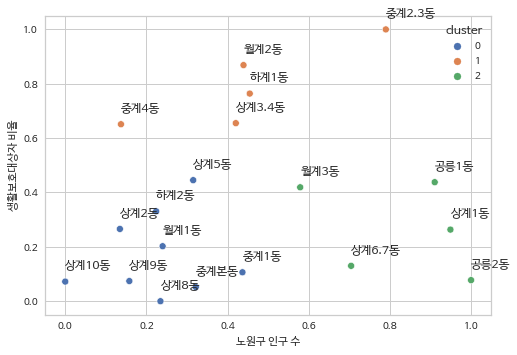

In [ ]:
sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

for i in range(len(cluster_df)):
  plt.annotate(cluster_df['dong'][i], (cluster_df['population'][i], cluster_df['ratio'][i]+0.05))


plt.xlabel('노원구 인구 수')
plt.ylabel('생활보호대상자 비율')

In [ ]:
# cluster_df.to_csv('/content/drive/MyDrive/project/14. 시각화/nowon_cluster.csv')

### 16. 강북구

In [ ]:
강북_df = pd.read_csv('/content/drive/MyDrive/project/12. 공체시설 부족 자치구/2020 강북구.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] = 강북_df['동']

강북_df =  강북_df.iloc[:,1:]
강북_df

인구 수  생활보호대상자 비율
0   0.186015    0.151616
1   0.000000    0.529514
2   0.068126    1.000000
3   0.316168    0.252051
4   0.324323    0.141416
5   0.472775    0.197506
6   0.526390    0.224265
7   0.396751    0.105809
8   0.923976    0.039133
9   0.727302    0.245137
10  1.000000    0.000000
11  0.290998    0.097355
12  0.963208    0.196197

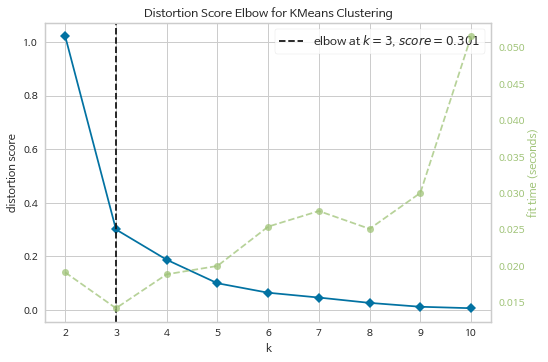

In [ ]:
km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(강북_df)
Elbow_M.show()

plt.show()

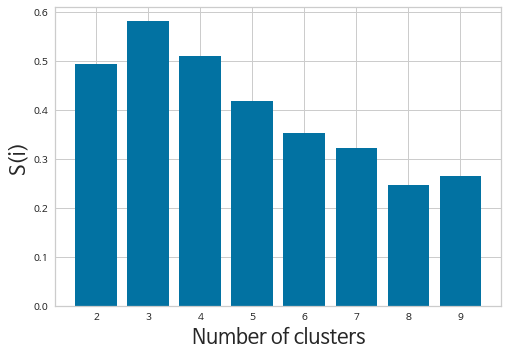

In [ ]:
silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(강북_df)
    silhouette_scores.append(silhouette_score(강북_df, m1.fit_predict(강북_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [ ]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  3


In [ ]:
k = 3

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(강북_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
강북_df['cluster'] = model.fit_predict(강북_df)

In [ ]:
강북_df['cluster'].value_counts()

0    7
1    4
2    2
Name: cluster, dtype: int64

In [ ]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.35905997, 0.16714555],
       [0.90362142, 0.12011687],
       [0.03406318, 0.76475683]])

In [ ]:
cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 강북_df['인구 수']
cluster_df['생활보호대상자 비율'] = 강북_df['생활보호대상자 비율']
cluster_df['cluster'] = 강북_df['cluster']
cluster_df

동      인구 수  생활보호대상자 비율  cluster
0    번1동  0.186015    0.151616        0
1    번2동  0.000000    0.529514        2
2    번3동  0.068126    1.000000        2
3   수유1동  0.316168    0.252051        0
4   수유2동  0.324323    0.141416        0
5   수유3동  0.472775    0.197506        0
6    삼양동  0.526390    0.224265        0
7    미아동  0.396751    0.105809        0
8    송중동  0.923976    0.039133        1
9    송천동  0.727302    0.245137        1
10  삼각산동  1.000000    0.000000        1
11   우이동  0.290998    0.097355        0
12   인수동  0.963208    0.196197        1

In [ ]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

dong  population     ratio  cluster
0    번1동    0.186015  0.151616        0
1    번2동    0.000000  0.529514        2
2    번3동    0.068126  1.000000        2
3   수유1동    0.316168  0.252051        0
4   수유2동    0.324323  0.141416        0
5   수유3동    0.472775  0.197506        0
6    삼양동    0.526390  0.224265        0
7    미아동    0.396751  0.105809        0
8    송중동    0.923976  0.039133        1
9    송천동    0.727302  0.245137        1
10  삼각산동    1.000000  0.000000        1
11   우이동    0.290998  0.097355        0
12   인수동    0.963208  0.196197        1

#### **군집화**

In [ ]:
for i in range(number_of_clusters):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['번1동', '수유1동', '수유2동', '수유3동', '삼양동', '미아동', '우이동']
cluster 1 :  ['송중동', '송천동', '삼각산동', '인수동']
cluster 2 :  ['번2동', '번3동']


#### **입지선정**
- cluster0 : 1개 (수유2동)
- cluster1 : 3개 (송중동, 인수동, 삼각산동) 
- cluster2 : 0개 

In [ ]:
# cluster0

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 0:
    lst.append([(cluster_df['population'][i]-centers[0][0])**2 + (cluster_df['ratio'][i]-centers[0][1])**2, i])
  
lst

[[0.030185684878897525, 0],
 [0.009048662793441561, 3],
 [0.0018686751762605402, 4],
 [0.013852921344274197, 5],
 [0.03126205552825011, 6],
 [0.005182774360372922, 7],
 [0.009503197278133934, 11]]

In [ ]:
lst.sort()
lst

[[0.0018686751762605402, 4],
 [0.005182774360372922, 7],
 [0.009048662793441561, 3],
 [0.009503197278133934, 11],
 [0.013852921344274197, 5],
 [0.030185684878897525, 0],
 [0.03126205552825011, 6]]

In [ ]:
cluster_df.loc[[4]]

dong  population     ratio  cluster
4  수유2동    0.324323  0.141416        0

In [ ]:
# cluster1

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 1:
    lst.append([(cluster_df['population'][i]-centers[1][0])**2 + (cluster_df['ratio'][i]-centers[1][1])**2, i])
  
lst

[[0.00697264870894896, 8],
 [0.04671856352458795, 9],
 [0.023716892301937454, 10],
 [0.0093387925317893, 12]]

In [ ]:
lst.sort()
lst

[[0.00697264870894896, 8],
 [0.0093387925317893, 12],
 [0.023716892301937454, 10],
 [0.04671856352458795, 9]]

In [ ]:
cluster_df.loc[[8, 12, 10]]

dong  population     ratio  cluster
8    송중동    0.923976  0.039133        1
12   인수동    0.963208  0.196197        1
10  삼각산동    1.000000  0.000000        1

#### **시각화**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '생활보호대상자 비율')

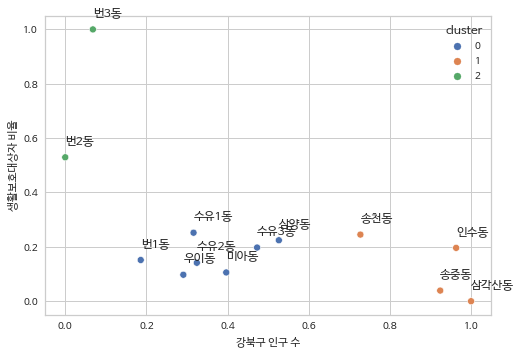

In [ ]:
sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

for i in range(len(cluster_df)):
  plt.annotate(cluster_df['dong'][i], (cluster_df['population'][i], cluster_df['ratio'][i]+0.05))


plt.xlabel('강북구 인구 수')
plt.ylabel('생활보호대상자 비율')

In [ ]:
# cluster_df.to_csv('/content/drive/MyDrive/project/14. 시각화/gangbuk_cluster.csv')

### 17. 관악구

In [ ]:
관악_df = pd.read_csv('/content/drive/MyDrive/project/12. 공체시설 부족 자치구/2020 관악구.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] = 관악_df['동']

관악_df =  관악_df.iloc[:,1:]
관악_df

인구 수  생활보호대상자 비율
0   0.140050    0.000000
1   0.464102    0.505377
2   0.000000    0.439080
3   0.683419    0.378522
4   0.090618    0.123142
5   0.002280    0.358849
6   0.523382    0.225194
7   0.381003    0.315592
8   0.173620    0.642033
9   0.421995    0.461830
10  0.058358    0.864895
11  0.337441    0.260211
12  0.009896    0.423129
13  0.170806    0.416531
14  0.446105    0.479863
15  0.916076    0.586947
16  0.716067    0.653298
17  1.000000    0.218209
18  0.598768    0.901727
19  0.398952    1.000000
20  0.779858    0.328242

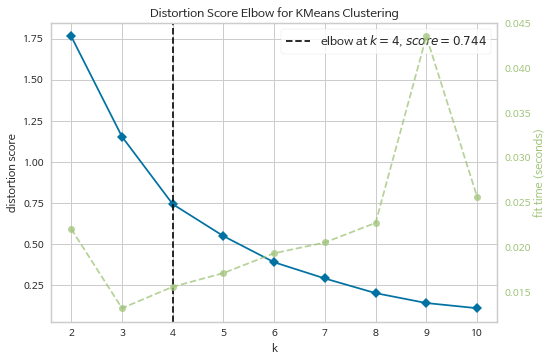

In [ ]:
km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(관악_df)
Elbow_M.show()

plt.show()

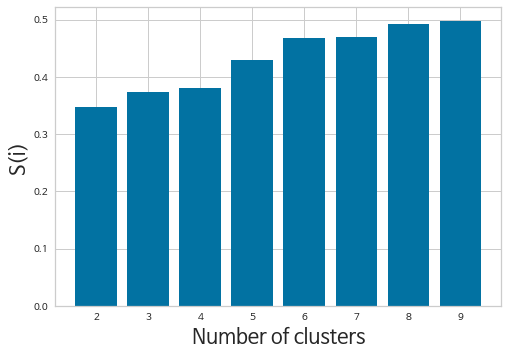

In [ ]:
silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(관악_df)
    silhouette_scores.append(silhouette_score(관악_df, m1.fit_predict(관악_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [ ]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  9


In [ ]:
k = 4

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(관악_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
관악_df['cluster'] = model.fit_predict(관악_df)

In [ ]:
관악_df['cluster'].value_counts()

1    8
2    6
3    4
0    3
Name: cluster, dtype: int64

In [ ]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.57126225, 0.85167496],
       [0.35058698, 0.29640107],
       [0.06916012, 0.5240863 ],
       [0.84483846, 0.37798005]])

In [ ]:
cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 관악_df['인구 수']
cluster_df['생활보호대상자 비율'] = 관악_df['생활보호대상자 비율']
cluster_df['cluster'] = 관악_df['cluster']
cluster_df

동      인구 수  생활보호대상자 비율  cluster
0    남현동  0.140050    0.000000        1
1   보라매동  0.464102    0.505377        1
2    청림동  0.000000    0.439080        2
3    행운동  0.683419    0.378522        3
4   낙성대동  0.090618    0.123142        1
5    중앙동  0.002280    0.358849        2
6    인헌동  0.523382    0.225194        1
7    서원동  0.381003    0.315592        1
8    신원동  0.173620    0.642033        2
9    서림동  0.421995    0.461830        1
10   신사동  0.058358    0.864895        2
11   신림동  0.337441    0.260211        1
12   난향동  0.009896    0.423129        2
13   조원동  0.170806    0.416531        2
14   대학동  0.446105    0.479863        1
15   은천동  0.916076    0.586947        3
16   성현동  0.716067    0.653298        0
17   청룡동  1.000000    0.218209        3
18   난곡동  0.598768    0.901727        0
19   삼성동  0.398952    1.000000        0
20   미성동  0.779858    0.328242        3

In [ ]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

dong  population     ratio  cluster
0    남현동    0.140050  0.000000        1
1   보라매동    0.464102  0.505377        1
2    청림동    0.000000  0.439080        2
3    행운동    0.683419  0.378522        3
4   낙성대동    0.090618  0.123142        1
5    중앙동    0.002280  0.358849        2
6    인헌동    0.523382  0.225194        1
7    서원동    0.381003  0.315592        1
8    신원동    0.173620  0.642033        2
9    서림동    0.421995  0.461830        1
10   신사동    0.058358  0.864895        2
11   신림동    0.337441  0.260211        1
12   난향동    0.009896  0.423129        2
13   조원동    0.170806  0.416531        2
14   대학동    0.446105  0.479863        1
15   은천동    0.916076  0.586947        3
16   성현동    0.716067  0.653298        0
17   청룡동    1.000000  0.218209        3
18   난곡동    0.598768  0.901727        0
19   삼성동    0.398952  1.000000        0
20   미성동    0.779858  0.328242        3

#### **군집화**

In [ ]:
for i in range(4):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['성현동', '난곡동', '삼성동']
cluster 1 :  ['남현동', '보라매동', '낙성대동', '인헌동', '서원동', '서림동', '신림동', '대학동']
cluster 2 :  ['청림동', '중앙동', '신원동', '신사동', '난향동', '조원동']
cluster 3 :  ['행운동', '은천동', '청룡동', '미성동']


#### **입지선정**
- cluster0 : 2개 (난곡동, 삼성동)
- cluster1 : 0개 
- cluster2 : 1개 (청림동)
- cluster3 : 1개 (미성동)

In [ ]:
# cluster0

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 0:
    lst.append([(cluster_df['population'][i]-centers[0][0])**2 + (cluster_df['ratio'][i]-centers[0][1])**2, i])
  
lst

[[0.06032183809511641, 16],
 [0.0032617704156423775, 18],
 [0.05169108235337127, 19]]

In [ ]:
lst.sort()
lst

[[0.0032617704156423775, 18],
 [0.05169108235337127, 19],
 [0.06032183809511641, 16]]

In [ ]:
cluster_df.loc[[18, 19]]

dong  population     ratio  cluster
18  난곡동    0.598768  0.901727        0
19  삼성동    0.398952  1.000000        0

In [ ]:
# cluster2

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 2:
    lst.append([(cluster_df['population'][i]-centers[2][0])**2 + (cluster_df['ratio'][i]-centers[2][1])**2, i])
  
lst

[[0.012009190876777962, 2],
 [0.03177646975778429, 5],
 [0.024823332389512363, 8],
 [0.11626733860366416, 10],
 [0.013704503219780478, 12],
 [0.02189999179477907, 13]]

In [ ]:
lst.sort()
lst

[[0.012009190876777962, 2],
 [0.013704503219780478, 12],
 [0.02189999179477907, 13],
 [0.024823332389512363, 8],
 [0.03177646975778429, 5],
 [0.11626733860366416, 10]]

In [ ]:
cluster_df.loc[[2]]

dong  population    ratio  cluster
2  청림동         0.0  0.43908        2

In [ ]:
# cluster3

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 3:
    lst.append([(cluster_df['population'][i]-centers[3][0])**2 + (cluster_df['ratio'][i]-centers[3][1])**2, i])
  
lst

[[0.026056523644176044, 3],
 [0.048742030926181734, 15],
 [0.04960175155829536, 17],
 [0.006696272869564705, 20]]

In [ ]:
lst.sort()
lst

[[0.006696272869564705, 20],
 [0.026056523644176044, 3],
 [0.048742030926181734, 15],
 [0.04960175155829536, 17]]

In [ ]:
cluster_df.loc[[20]]

dong  population     ratio  cluster
20  미성동    0.779858  0.328242        3

#### **시각화**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '생활보호대상자 비율')

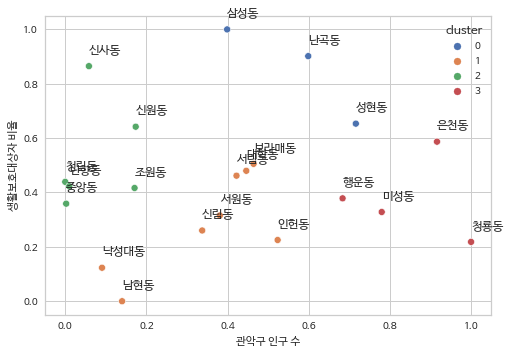

In [ ]:
sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

for i in range(len(cluster_df)):
  plt.annotate(cluster_df['dong'][i], (cluster_df['population'][i], cluster_df['ratio'][i]+0.05))


plt.xlabel('관악구 인구 수')
plt.ylabel('생활보호대상자 비율')

In [ ]:
# cluster_df.to_csv('/content/drive/MyDrive/project/14. 시각화/gwanak_cluster.csv')

### 18. 도봉구

In [ ]:
도봉_df = pd.read_csv('/content/drive/MyDrive/project/12. 공체시설 부족 자치구/2020 도봉구.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] = 도봉_df['동']


도봉_df =  도봉_df.iloc[:,1:]
도봉_df

인구 수  생활보호대상자 비율
0   0.490909    0.438584
1   0.322631    0.447932
2   0.162476    0.387934
3   0.315603    0.042551
4   0.956415    0.466148
5   0.391425    1.000000
6   0.874984    0.040898
7   0.709091    0.129808
8   1.000000    0.253323
9   0.000000    0.747687
10  0.830690    0.000000
11  0.703159    0.105153
12  0.477627    0.623955
13  0.871567    0.256459

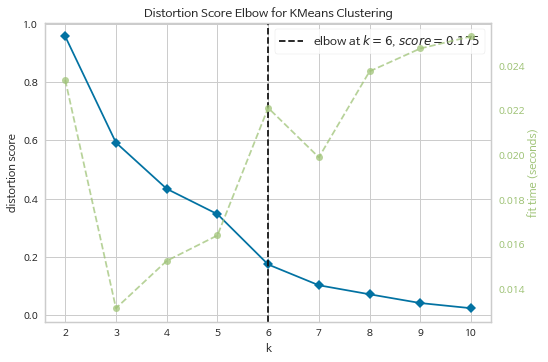

In [ ]:
km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(도봉_df)
Elbow_M.show()

plt.show()

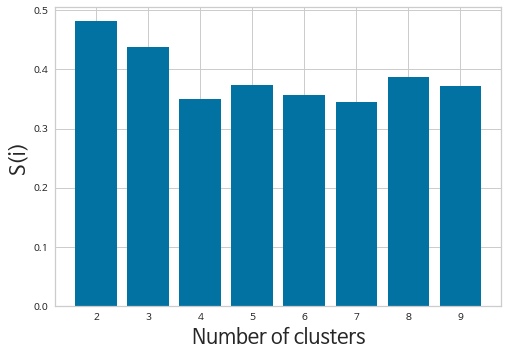

In [ ]:
silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(도봉_df)
    silhouette_scores.append(silhouette_score(도봉_df, m1.fit_predict(도봉_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [ ]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  2


#### 적절한 k값 찾기

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


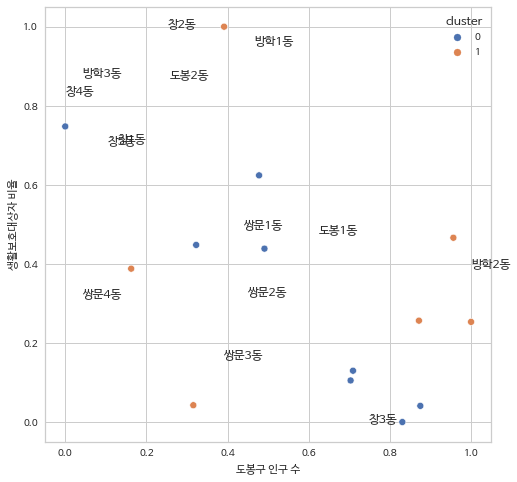

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


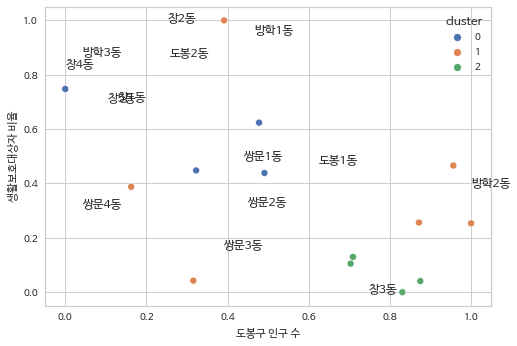

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


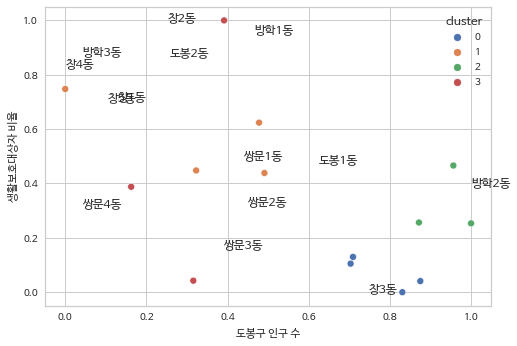

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


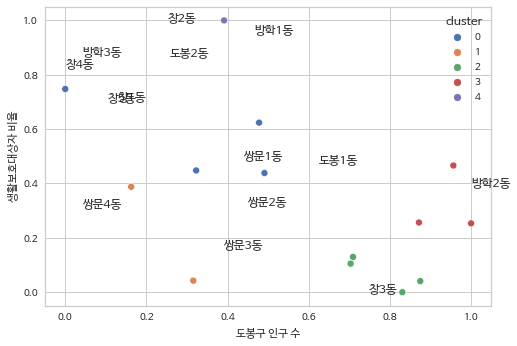

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


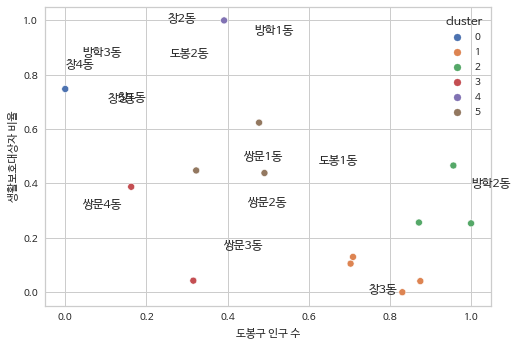

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


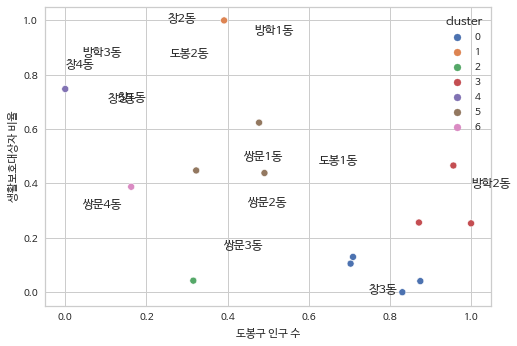

In [ ]:
plt.figure(figsize = (8, 8))

for i in range(2,8):

  k = i
  model = KMeans(n_clusters = k, random_state = 10)
  model.fit(도봉_df)
  도봉_df['cluster'] = model.fit_predict(도봉_df)

  cluster_df = pd.DataFrame()
  cluster_df['동'] = 동_df['동']
  cluster_df['인구 수'] = 도봉_df['인구 수']
  cluster_df['생활보호대상자 비율'] = 도봉_df['생활보호대상자 비율']
  cluster_df['cluster'] = 도봉_df['cluster']

  cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})

  sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

  for index, dong, population, ratio, cluster in cluster_df.itertuples():
    plt.annotate(dong, (ratio, population))
  plt.xlabel('도봉구 인구 수')
  plt.ylabel('생활보호대상자 비율')
  
  plt.show()

k=4로 결정

In [ ]:
k = 4

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(도봉_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
도봉_df['cluster'] = model.fit_predict(도봉_df)

In [ ]:
도봉_df['cluster'].value_counts()

2    5
1    4
3    3
0    2
Name: cluster, dtype: int64

In [ ]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.19571244, 0.87384334],
       [0.77948098, 0.06896484],
       [0.35384913, 0.38819098],
       [0.94266065, 0.32530958]])

In [ ]:
cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 도봉_df['인구 수']
cluster_df['생활보호대상자 비율'] = 도봉_df['생활보호대상자 비율']
cluster_df['cluster'] = 도봉_df['cluster']
cluster_df

동      인구 수  생활보호대상자 비율  cluster
0   쌍문1동  0.490909    0.438584        2
1   쌍문2동  0.322631    0.447932        2
2   쌍문3동  0.162476    0.387934        2
3   쌍문4동  0.315603    0.042551        2
4   방학1동  0.956415    0.466148        3
5   방학2동  0.391425    1.000000        0
6   방학3동  0.874984    0.040898        1
7    창1동  0.709091    0.129808        1
8    창2동  1.000000    0.253323        3
9    창3동  0.000000    0.747687        0
10   창4동  0.830690    0.000000        1
11   창5동  0.703159    0.105153        1
12  도봉1동  0.477627    0.623955        2
13  도봉2동  0.871567    0.256459        3

In [ ]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

dong  population     ratio  cluster
0   쌍문1동    0.490909  0.438584        2
1   쌍문2동    0.322631  0.447932        2
2   쌍문3동    0.162476  0.387934        2
3   쌍문4동    0.315603  0.042551        2
4   방학1동    0.956415  0.466148        3
5   방학2동    0.391425  1.000000        0
6   방학3동    0.874984  0.040898        1
7    창1동    0.709091  0.129808        1
8    창2동    1.000000  0.253323        3
9    창3동    0.000000  0.747687        0
10   창4동    0.830690  0.000000        1
11   창5동    0.703159  0.105153        1
12  도봉1동    0.477627  0.623955        2
13  도봉2동    0.871567  0.256459        3

#### **군집화**

In [ ]:
for i in range(4):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['방학2동', '창3동']
cluster 1 :  ['방학3동', '창1동', '창4동', '창5동']
cluster 2 :  ['쌍문1동', '쌍문2동', '쌍문3동', '쌍문4동', '도봉1동']
cluster 3 :  ['방학1동', '창2동', '도봉2동']


#### **입지선정**
- cluster0 : 1개 (방학2동)
- cluster1 : 1개 (창5동)
- cluster2 : 2개 (쌍문2동, 쌍문1동)
- cluster3 : 0개 

In [ ]:
# cluster1

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 1:
    lst.append([(cluster_df['population'][i]-centers[1][0])**2 + (cluster_df['ratio'][i]-centers[1][1])**2, i])
  
lst

[[0.009908535959045145, 6],
 [0.008656713588128346, 7],
 [0.0073784996520007895, 10],
 [0.0071345579989227775, 11]]

In [ ]:
lst.sort()
lst

[[0.0071345579989227775, 11],
 [0.0073784996520007895, 10],
 [0.008656713588128346, 7],
 [0.009908535959045145, 6]]

In [ ]:
cluster_df.loc[[11]]

dong  population     ratio  cluster
11  창5동    0.703159  0.105153        1

In [ ]:
# cluster2

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 2:
    lst.append([(cluster_df['population'][i]-centers[2][0])**2 + (cluster_df['ratio'][i]-centers[2][1])**2, i])
  
lst

[[0.021324869061799777, 0],
 [0.0045435593443958365, 1],
 [0.03662380903589932, 2],
 [0.12092992605909207, 3],
 [0.07090565686003353, 12]]

In [ ]:
lst.sort()
lst

[[0.0045435593443958365, 1],
 [0.021324869061799777, 0],
 [0.03662380903589932, 2],
 [0.07090565686003353, 12],
 [0.12092992605909207, 3]]

In [ ]:
cluster_df.loc[[1, 0]]

dong  population     ratio  cluster
1  쌍문2동    0.322631  0.447932        2
0  쌍문1동    0.490909  0.438584        2

In [ ]:
# cluster0

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 0:
    lst.append([(cluster_df['population'][i]-centers[0][0])**2 + (cluster_df['ratio'][i]-centers[0][1])**2, i])
  
lst

[[0.05421886465666814, 5], [0.0542188646566682, 9]]

In [ ]:
lst.sort()
lst

[[0.05421886465666814, 5], [0.0542188646566682, 9]]

In [ ]:
cluster_df.loc[[5]]

dong  population  ratio  cluster
5  방학2동    0.391425    1.0        0

#### **시각화**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '생활보호대상자 비율')

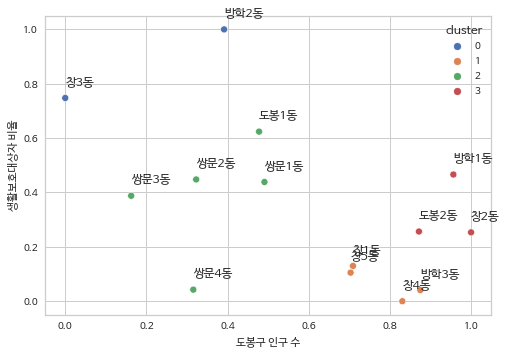

In [ ]:
sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

for i in range(len(cluster_df)):
  plt.annotate(cluster_df['dong'][i], (cluster_df['population'][i], cluster_df['ratio'][i]+0.05))


plt.xlabel('도봉구 인구 수')
plt.ylabel('생활보호대상자 비율')

In [ ]:
# cluster_df.to_csv('/content/drive/MyDrive/project/14. 시각화/dobong_cluster.csv')

### 19. 강서구

In [ ]:
강서_df = pd.read_csv('/content/drive/MyDrive/project/12. 공체시설 부족 자치구/2020 강서구.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] = 강서_df['동']


강서_df =  강서_df.iloc[:,1:]
강서_df

인구 수  생활보호대상자 비율
0   0.707079    0.000000
1   0.251340    0.029012
2   0.170860    0.062718
3   0.440091    0.738492
4   0.525701    0.198022
5   1.000000    0.135656
6   0.106697    0.180734
7   0.189472    0.104623
8   0.175938    0.181971
9   0.271834    0.133629
10  0.285781    0.155517
11  0.514333    0.014713
12  0.000000    1.000000
13  0.025650    0.638389
14  0.591411    0.128023
15  0.336126    0.157817
16  0.772376    0.092801
17  0.228243    0.267680
18  0.231723    0.371257
19  0.757862    0.036609

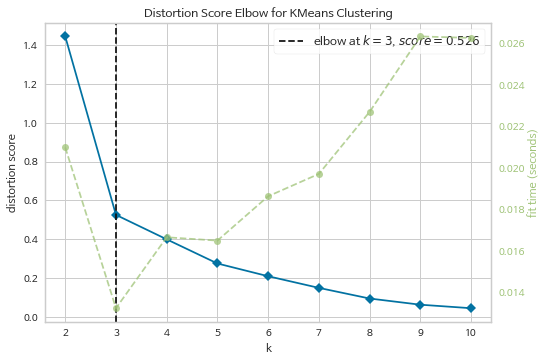

In [ ]:
km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(강서_df)
Elbow_M.show()

plt.show()

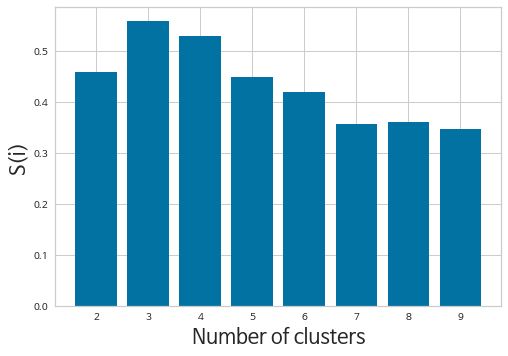

In [ ]:
silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(강서_df)
    silhouette_scores.append(silhouette_score(강서_df, m1.fit_predict(강서_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [ ]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  3


In [ ]:
k = 3

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(강서_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
강서_df['cluster'] = model.fit_predict(강서_df)

In [ ]:
강서_df['cluster'].value_counts()

0    10
1     7
2     3
Name: cluster, dtype: int64

In [ ]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers


array([[0.22480151, 0.16449591],
       [0.69553737, 0.08654638],
       [0.15524679, 0.79229382]])

In [ ]:
cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 강서_df['인구 수']
cluster_df['생활보호대상자 비율'] = 강서_df['생활보호대상자 비율']
cluster_df['cluster'] = 강서_df['cluster']
cluster_df

동      인구 수  생활보호대상자 비율  cluster
0    염창동  0.707079    0.000000        1
1   등촌1동  0.251340    0.029012        0
2   등촌2동  0.170860    0.062718        0
3   등촌3동  0.440091    0.738492        2
4   화곡본동  0.525701    0.198022        1
5   화곡1동  1.000000    0.135656        1
6   화곡2동  0.106697    0.180734        0
7   화곡3동  0.189472    0.104623        0
8   화곡4동  0.175938    0.181971        0
9   화곡6동  0.271834    0.133629        0
10  화곡8동  0.285781    0.155517        0
11  가양1동  0.514333    0.014713        1
12  가양2동  0.000000    1.000000        2
13  가양3동  0.025650    0.638389        2
14  발산1동  0.591411    0.128023        1
15   공항동  0.336126    0.157817        0
16  방화1동  0.772376    0.092801        1
17  방화2동  0.228243    0.267680        0
18  방화3동  0.231723    0.371257        0
19  우장산동  0.757862    0.036609        1

In [ ]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

dong  population     ratio  cluster
0    염창동    0.707079  0.000000        1
1   등촌1동    0.251340  0.029012        0
2   등촌2동    0.170860  0.062718        0
3   등촌3동    0.440091  0.738492        2
4   화곡본동    0.525701  0.198022        1
5   화곡1동    1.000000  0.135656        1
6   화곡2동    0.106697  0.180734        0
7   화곡3동    0.189472  0.104623        0
8   화곡4동    0.175938  0.181971        0
9   화곡6동    0.271834  0.133629        0
10  화곡8동    0.285781  0.155517        0
11  가양1동    0.514333  0.014713        1
12  가양2동    0.000000  1.000000        2
13  가양3동    0.025650  0.638389        2
14  발산1동    0.591411  0.128023        1
15   공항동    0.336126  0.157817        0
16  방화1동    0.772376  0.092801        1
17  방화2동    0.228243  0.267680        0
18  방화3동    0.231723  0.371257        0
19  우장산동    0.757862  0.036609        1

#### **군집화**

In [ ]:
for i in range(number_of_clusters):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['등촌1동', '등촌2동', '화곡2동', '화곡3동', '화곡4동', '화곡6동', '화곡8동', '공항동', '방화2동', '방화3동']
cluster 1 :  ['염창동', '화곡본동', '화곡1동', '가양1동', '발산1동', '방화1동', '우장산동']
cluster 2 :  ['등촌3동', '가양2동', '가양3동']


#### **입지선정**
- cluster0 : 1개 (화곡4동)
- cluster1 : 1개 (방화1동)
- cluster2 : 0개

In [ ]:
# cluster0

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 0:
    lst.append([(cluster_df['population'][i]-centers[0][0])**2 + (cluster_df['ratio'][i]-centers[0][1])**2, i])
  
lst

[[0.01906018453843275, 1],
 [0.013268497147790695, 2],
 [0.014212293117362742, 6],
 [0.0048329539587576254, 7],
 [0.0026929973983107723, 8],
 [0.0031648344246137583, 9],
 [0.0037990611594779077, 10],
 [0.012437749254215995, 15],
 [0.010658875701699677, 17],
 [0.04279795521144803, 18]]

In [ ]:
lst.sort()
lst

[[0.0026929973983107723, 8],
 [0.0031648344246137583, 9],
 [0.0037990611594779077, 10],
 [0.0048329539587576254, 7],
 [0.010658875701699677, 17],
 [0.012437749254215995, 15],
 [0.013268497147790695, 2],
 [0.014212293117362742, 6],
 [0.01906018453843275, 1],
 [0.04279795521144803, 18]]

In [ ]:
cluster_df.loc[[8]]

dong  population     ratio  cluster
8  화곡4동    0.175938  0.181971        0

In [ ]:
# cluster1

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 1:
    lst.append([(cluster_df['population'][i]-centers[1][0])**2 + (cluster_df['ratio'][i]-centers[1][1])**2, i])
  
lst

[[0.007623479850495225, 0],
 [0.041271194887629536, 4],
 [0.09510925643654174, 5],
 [0.037995059334991955, 11],
 [0.012562733227992992, 14],
 [0.005943255066132197, 16],
 [0.006378195416335344, 19]]

In [ ]:
lst.sort()
lst

[[0.005943255066132197, 16],
 [0.006378195416335344, 19],
 [0.007623479850495225, 0],
 [0.012562733227992992, 14],
 [0.037995059334991955, 11],
 [0.041271194887629536, 4],
 [0.09510925643654174, 5]]

In [ ]:
cluster_df.loc[[16]]

dong  population     ratio  cluster
16  방화1동    0.772376  0.092801        1

#### **시각화**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '생활보호대상자 비율')

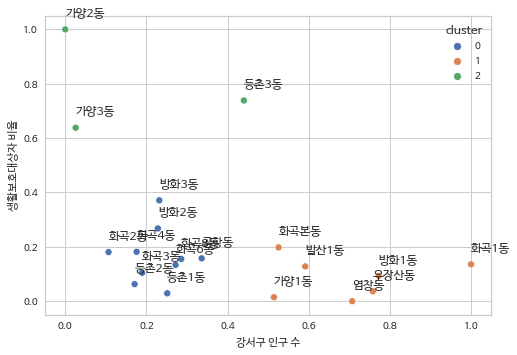

In [ ]:
sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

for i in range(len(cluster_df)):
  plt.annotate(cluster_df['dong'][i], (cluster_df['population'][i], cluster_df['ratio'][i]+0.05))


plt.xlabel('강서구 인구 수')
plt.ylabel('생활보호대상자 비율')

In [ ]:
# cluster_df.to_csv('/content/drive/MyDrive/project/14. 시각화/gangseo_cluster.csv')

### 20. 강동구

In [ ]:
강동_df = pd.read_csv('/content/drive/MyDrive/project/12. 공체시설 부족 자치구/2020 강동구.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] = 강동_df['동']

강동_df =  강동_df.iloc[:,1:]
강동_df

인구 수  생활보호대상자 비율
0   0.709844    0.199185
1   0.560336    0.256057
2   0.371047    0.200675
3   0.554457    0.232097
4   0.478608    0.460345
5   0.760975    0.948967
6   0.327104    0.189557
7   0.389606    0.137652
8   0.589688    0.977770
9   0.750740    1.000000
10  0.575527    0.909638
11  0.431082    0.257978
12  0.529674    0.625992
13  0.502725    0.504802
14  0.000000    0.000000
15  0.561108    0.333015
16  1.000000    0.547703
17  0.762048    0.843532

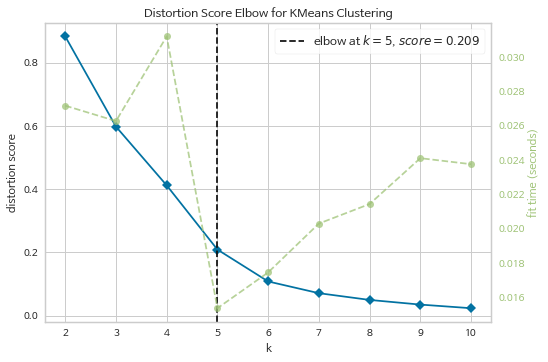

In [ ]:
km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(강동_df)
Elbow_M.show()

plt.show()

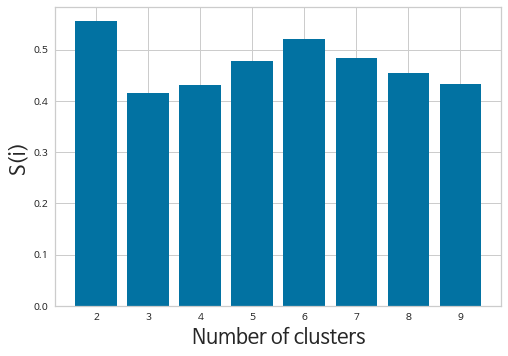

In [ ]:
silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(강동_df)
    silhouette_scores.append(silhouette_score(강동_df, m1.fit_predict(강동_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [ ]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  2


#### 적절한 k값 찾기

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


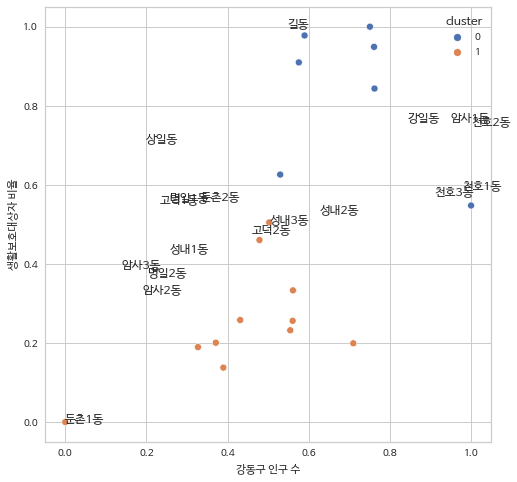

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


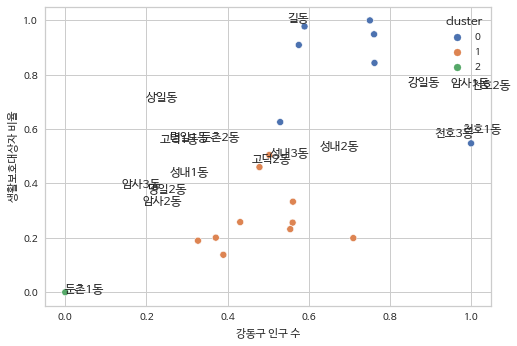

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


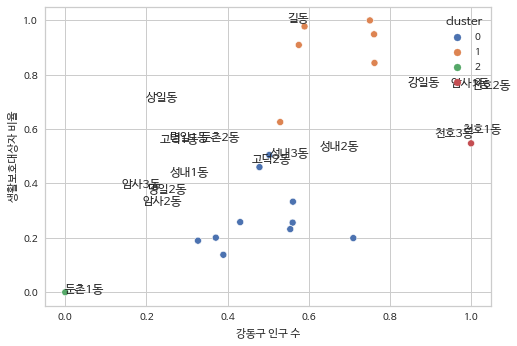

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


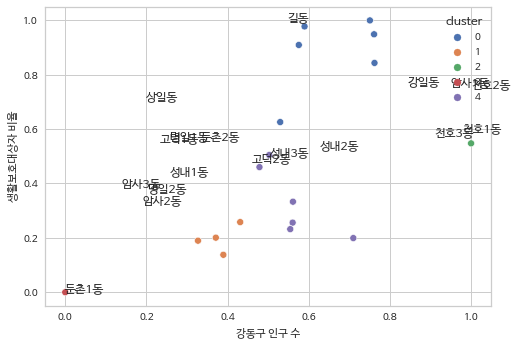

In [ ]:
plt.figure(figsize = (8, 8))

for i in range(2,6):

  k = i
  model = KMeans(n_clusters = k, random_state = 10)
  model.fit(강동_df)
  강동_df['cluster'] = model.fit_predict(강동_df)

  cluster_df = pd.DataFrame()
  cluster_df['동'] = 동_df['동']
  cluster_df['인구 수'] = 강동_df['인구 수']
  cluster_df['생활보호대상자 비율'] = 강동_df['생활보호대상자 비율']
  cluster_df['cluster'] = 강동_df['cluster']

  cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})

  sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

  for index, dong, population, ratio, cluster in cluster_df.itertuples():
    plt.annotate(dong, (ratio, population))
  plt.xlabel('강동구 인구 수')
  plt.ylabel('생활보호대상자 비율')
  
  plt.show()

k=4로 결정

In [ ]:
k = 4

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(강동_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
강동_df['cluster'] = model.fit_predict(강동_df)

In [ ]:
강동_df['cluster'].value_counts()

0    7
2    5
1    5
3    1
Name: cluster, dtype: int64

In [ ]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.55667878, 0.37307019],
       [0.68779556, 0.93598145],
       [0.30376776, 0.15717248],
       [1.        , 0.54770267]])

In [ ]:
cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 강동_df['인구 수']
cluster_df['생활보호대상자 비율'] = 강동_df['생활보호대상자 비율']
cluster_df['cluster'] = 강동_df['cluster']
cluster_df

동      인구 수  생활보호대상자 비율  cluster
0    상일동  0.709844    0.199185        0
1   명일1동  0.560336    0.256057        0
2   명일2동  0.371047    0.200675        2
3   고덕1동  0.554457    0.232097        0
4   고덕2동  0.478608    0.460345        0
5   암사1동  0.760975    0.948967        1
6   암사2동  0.327104    0.189557        2
7   암사3동  0.389606    0.137652        2
8   천호1동  0.589688    0.977770        1
9   천호2동  0.750740    1.000000        1
10  천호3동  0.575527    0.909638        1
11  성내1동  0.431082    0.257978        2
12  성내2동  0.529674    0.625992        0
13  성내3동  0.502725    0.504802        0
14  둔촌1동  0.000000    0.000000        2
15  둔촌2동  0.561108    0.333015        0
16    길동  1.000000    0.547703        3
17   강일동  0.762048    0.843532        1

In [ ]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

dong  population     ratio  cluster
0    상일동    0.709844  0.199185        0
1   명일1동    0.560336  0.256057        0
2   명일2동    0.371047  0.200675        2
3   고덕1동    0.554457  0.232097        0
4   고덕2동    0.478608  0.460345        0
5   암사1동    0.760975  0.948967        1
6   암사2동    0.327104  0.189557        2
7   암사3동    0.389606  0.137652        2
8   천호1동    0.589688  0.977770        1
9   천호2동    0.750740  1.000000        1
10  천호3동    0.575527  0.909638        1
11  성내1동    0.431082  0.257978        2
12  성내2동    0.529674  0.625992        0
13  성내3동    0.502725  0.504802        0
14  둔촌1동    0.000000  0.000000        2
15  둔촌2동    0.561108  0.333015        0
16    길동    1.000000  0.547703        3
17   강일동    0.762048  0.843532        1

#### **군집화**

In [ ]:
for i in range(4):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['상일동', '명일1동', '고덕1동', '고덕2동', '성내2동', '성내3동', '둔촌2동']
cluster 1 :  ['암사1동', '천호1동', '천호2동', '천호3동', '강일동']
cluster 2 :  ['명일2동', '암사2동', '암사3동', '성내1동', '둔촌1동']
cluster 3 :  ['길동']


#### **입지선정**
- cluster1 : 1개 (암사1동)

In [ ]:
# cluster1

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 1:
    lst.append([(cluster_df['population'][i]-centers[1][0])**2 + (cluster_df['ratio'][i]-centers[1][1])**2, i])
  
lst

[[0.005523846501270646, 5],
 [0.01137139498493961, 8],
 [0.008060408295430898, 9],
 [0.013298244344433495, 10],
 [0.014060325284164493, 17]]

In [ ]:
lst.sort()
lst

[[0.005523846501270646, 5],
 [0.008060408295430898, 9],
 [0.01137139498493961, 8],
 [0.013298244344433495, 10],
 [0.014060325284164493, 17]]

In [ ]:
cluster_df.loc[[5]]

dong  population     ratio  cluster
5  암사1동    0.760975  0.948967        1

#### **시각화**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '생활보호대상자 비율')

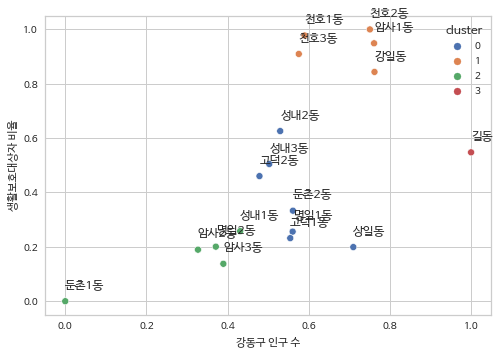

In [ ]:
sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

for i in range(len(cluster_df)):
  plt.annotate(cluster_df['dong'][i], (cluster_df['population'][i], cluster_df['ratio'][i]+0.05))


plt.xlabel('강동구 인구 수')
plt.ylabel('생활보호대상자 비율')

In [ ]:
# cluster_df.to_csv('/content/drive/MyDrive/project/14. 시각화/gangdong_cluster.csv')

### 21. 동작구

In [ ]:
동작_df = pd.read_csv('/content/drive/MyDrive/project/12. 공체시설 부족 자치구/2020 동작구.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] = 동작_df['동']

동작_df =  동작_df.iloc[:,1:]
동작_df

인구 수  생활보호대상자 비율
0   0.566341    0.285400
1   0.000000    1.000000
2   1.000000    0.140209
3   0.439570    0.047910
4   0.357177    0.336975
5   0.473896    0.407754
6   0.303649    0.250724
7   0.424448    0.000000
8   0.352016    0.038223
9   0.032615    0.380682
10  0.038976    0.109678
11  0.769923    0.351767
12  0.369389    0.057519
13  0.208653    0.130803
14  0.631061    0.080574

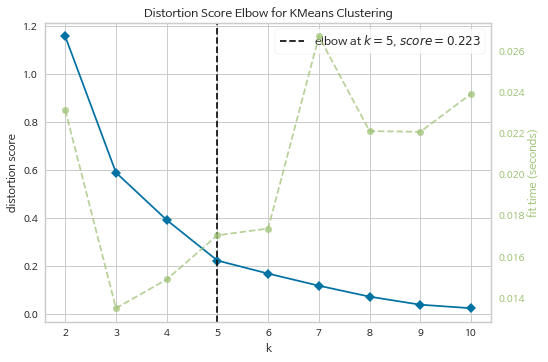

In [ ]:
km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(동작_df)
Elbow_M.show()

plt.show()

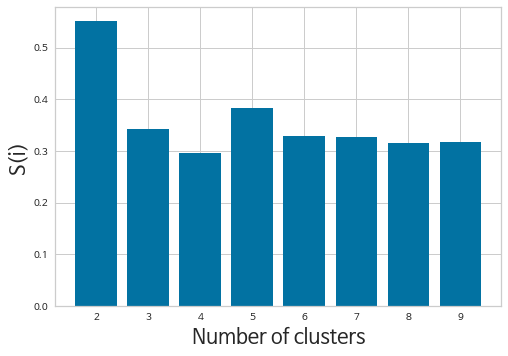

In [ ]:
silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(동작_df)
    silhouette_scores.append(silhouette_score(동작_df, m1.fit_predict(동작_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [ ]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  2


#### 적절한 k값 찾기

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


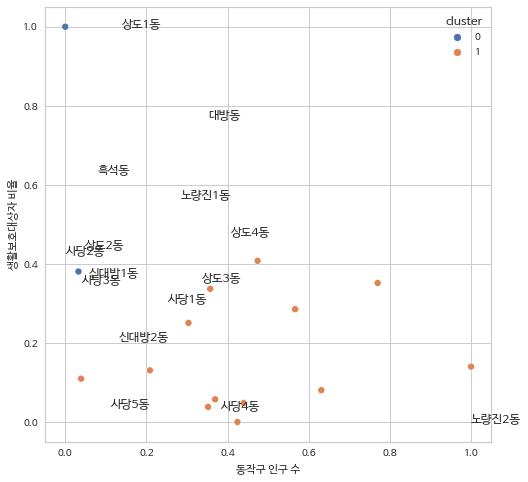

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


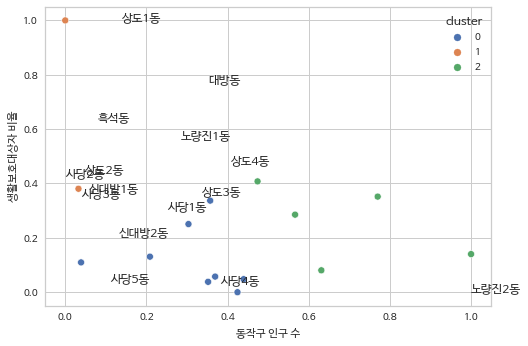

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


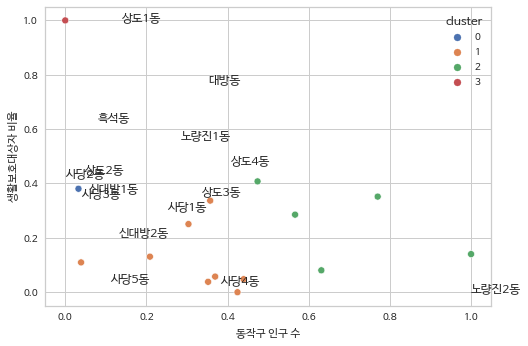

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


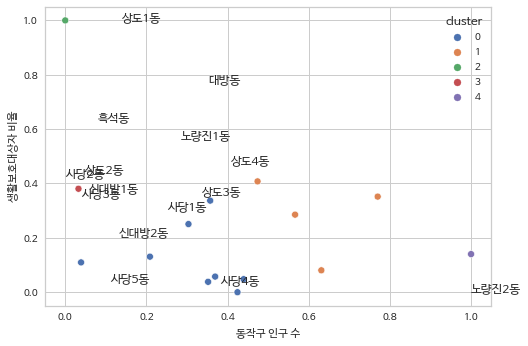

In [ ]:
plt.figure(figsize = (8, 8))

for i in range(2,6):

  k = i
  model = KMeans(n_clusters = k, random_state = 10)
  model.fit(동작_df)
  동작_df['cluster'] = model.fit_predict(동작_df)

  cluster_df = pd.DataFrame()
  cluster_df['동'] = 동_df['동']
  cluster_df['인구 수'] = 동작_df['인구 수']
  cluster_df['생활보호대상자 비율'] = 동작_df['생활보호대상자 비율']
  cluster_df['cluster'] = 동작_df['cluster']

  cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})

  sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

  for index, dong, population, ratio, cluster in cluster_df.itertuples():
    plt.annotate(dong, (ratio, population))
  plt.xlabel('동작구 인구 수')
  plt.ylabel('생활보호대상자 비율')
  
  plt.show()

k=3으로 결정

In [ ]:
k = 3

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(동작_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
동작_df['cluster'] = model.fit_predict(동작_df)

In [ ]:
동작_df['cluster'].value_counts()

0    9
1    5
2    1
Name: cluster, dtype: int64

In [ ]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.28072158, 0.15027929],
       [0.68824412, 0.25314106],
       [0.        , 1.        ]])

In [ ]:
cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 동작_df['인구 수']
cluster_df['생활보호대상자 비율'] = 동작_df['생활보호대상자 비율']
cluster_df['cluster'] = 동작_df['cluster']
cluster_df

동      인구 수  생활보호대상자 비율  cluster
0   노량진1동  0.566341    0.285400        1
1   노량진2동  0.000000    1.000000        2
2    상도1동  1.000000    0.140209        1
3    상도2동  0.439570    0.047910        0
4    상도3동  0.357177    0.336975        0
5    상도4동  0.473896    0.407754        1
6    사당1동  0.303649    0.250724        0
7    사당2동  0.424448    0.000000        0
8    사당3동  0.352016    0.038223        0
9    사당4동  0.032615    0.380682        0
10   사당5동  0.038976    0.109678        0
11    대방동  0.769923    0.351767        1
12  신대방1동  0.369389    0.057519        0
13  신대방2동  0.208653    0.130803        0
14    흑석동  0.631061    0.080574        1

In [ ]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

dong  population     ratio  cluster
0   노량진1동    0.566341  0.285400        1
1   노량진2동    0.000000  1.000000        2
2    상도1동    1.000000  0.140209        1
3    상도2동    0.439570  0.047910        0
4    상도3동    0.357177  0.336975        0
5    상도4동    0.473896  0.407754        1
6    사당1동    0.303649  0.250724        0
7    사당2동    0.424448  0.000000        0
8    사당3동    0.352016  0.038223        0
9    사당4동    0.032615  0.380682        0
10   사당5동    0.038976  0.109678        0
11    대방동    0.769923  0.351767        1
12  신대방1동    0.369389  0.057519        0
13  신대방2동    0.208653  0.130803        0
14    흑석동    0.631061  0.080574        1

#### **군집화**

In [ ]:
for i in range(3):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['상도2동', '상도3동', '사당1동', '사당2동', '사당3동', '사당4동', '사당5동', '신대방1동', '신대방2동']
cluster 1 :  ['노량진1동', '상도1동', '상도4동', '대방동', '흑석동']
cluster 2 :  ['노량진2동']


#### **입지선정**
- cluster1 : 1개 (노량진1동)

In [ ]:
# cluster1

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 1:
    lst.append([(cluster_df['population'][i]-centers[1][0])**2 + (cluster_df['ratio'][i]-centers[1][1])**2, i])
  
lst

[[0.01590113305080174, 0],
 [0.10994535771877464, 2],
 [0.06985039211723632, 5],
 [0.016398626292687013, 11],
 [0.03304922821832613, 14]]

In [ ]:
lst.sort()
lst

[[0.01590113305080174, 0],
 [0.016398626292687013, 11],
 [0.03304922821832613, 14],
 [0.06985039211723632, 5],
 [0.10994535771877464, 2]]

In [ ]:
cluster_df.loc[[0]]

dong  population   ratio  cluster
0  노량진1동    0.566341  0.2854        1

#### **시각화**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '생활보호대상자 비율')

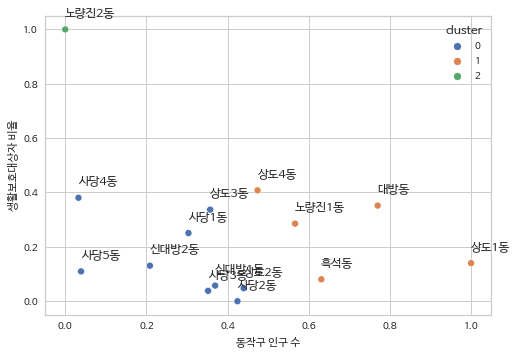

In [ ]:
sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

for i in range(len(cluster_df)):
  plt.annotate(cluster_df['dong'][i], (cluster_df['population'][i], cluster_df['ratio'][i]+0.05))


plt.xlabel('동작구 인구 수')
plt.ylabel('생활보호대상자 비율')

In [ ]:
# cluster_df.to_csv('/content/drive/MyDrive/project/14. 시각화/dongjak_cluster.csv')

### 22. 성동구

In [ ]:
성동_df = pd.read_csv('/content/drive/MyDrive/project/12. 공체시설 부족 자치구/2020 성동구.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] = 성동_df['동']

성동_df =  성동_df.iloc[:,1:]
성동_df

인구 수  생활보호대상자 비율
0   0.381453    0.325889
1   0.748921    0.417782
2   0.144056    0.074033
3   0.195804    0.281975
4   0.791000    0.451990
5   0.284646    0.000000
6   0.282882    0.752382
7   0.224932    0.298005
8   0.347096    0.387550
9   0.157799    0.132421
10  0.365035    0.644338
11  0.019094    0.142612
12  0.000000    0.939498
13  0.096139    1.000000
14  1.000000    0.391537
15  0.756522    0.400462
16  0.958893    0.098375

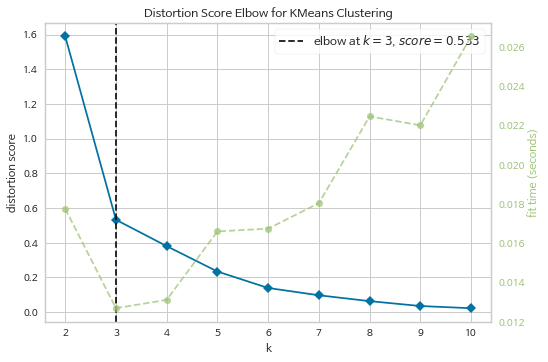

In [ ]:
km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(성동_df)
Elbow_M.show()

plt.show()

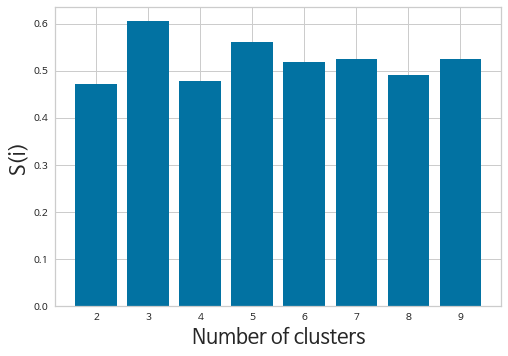

In [ ]:
silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(성동_df)
    silhouette_scores.append(silhouette_score(성동_df, m1.fit_predict(성동_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [ ]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  3


In [ ]:
k = 3

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(성동_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
성동_df['cluster'] = model.fit_predict(성동_df)

In [ ]:
성동_df['cluster'].value_counts()

1    8
2    5
0    4
Name: cluster, dtype: int64

In [ ]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.18601399, 0.83405452],
       [0.21935999, 0.2053106 ],
       [0.85106719, 0.35202917]])

In [ ]:
cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 성동_df['인구 수']
cluster_df['생활보호대상자 비율'] = 성동_df['생활보호대상자 비율']
cluster_df['cluster'] = 성동_df['cluster']
cluster_df

동      인구 수  생활보호대상자 비율  cluster
0     왕십리2동  0.381453    0.325889        1
1       마장동  0.748921    0.417782        2
2       사근동  0.144056    0.074033        1
3      행당1동  0.195804    0.281975        1
4      행당2동  0.791000    0.451990        2
5       응봉동  0.284646    0.000000        1
6     금호1가동  0.282882    0.752382        0
7     금호4가동  0.224932    0.298005        1
8    성수1가1동  0.347096    0.387550        1
9    성수1가2동  0.157799    0.132421        1
10   성수2가1동  0.365035    0.644338        0
11   성수2가3동  0.019094    0.142612        1
12      송정동  0.000000    0.939498        0
13      용답동  0.096139    1.000000        0
14   왕십리도선동  1.000000    0.391537        2
15  금호2.3가동  0.756522    0.400462        2
16      옥수동  0.958893    0.098375        2

In [ ]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

dong  population     ratio  cluster
0     왕십리2동    0.381453  0.325889        1
1       마장동    0.748921  0.417782        2
2       사근동    0.144056  0.074033        1
3      행당1동    0.195804  0.281975        1
4      행당2동    0.791000  0.451990        2
5       응봉동    0.284646  0.000000        1
6     금호1가동    0.282882  0.752382        0
7     금호4가동    0.224932  0.298005        1
8    성수1가1동    0.347096  0.387550        1
9    성수1가2동    0.157799  0.132421        1
10   성수2가1동    0.365035  0.644338        0
11   성수2가3동    0.019094  0.142612        1
12      송정동    0.000000  0.939498        0
13      용답동    0.096139  1.000000        0
14   왕십리도선동    1.000000  0.391537        2
15  금호2.3가동    0.756522  0.400462        2
16      옥수동    0.958893  0.098375        2

#### **군집화**

In [ ]:
for i in range(number_of_clusters):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['금호1가동', '성수2가1동', '송정동', '용답동']
cluster 1 :  ['왕십리2동', '사근동', '행당1동', '응봉동', '금호4가동', '성수1가1동', '성수1가2동', '성수2가3동']
cluster 2 :  ['마장동', '행당2동', '왕십리도선동', '금호2.3가동', '옥수동']


#### **입지선정**
- cluster2 : 1개 (금호2.3가동)

In [ ]:
# cluster2

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 2:
    lst.append([(cluster_df['population'][i]-centers[2][0])**2 + (cluster_df['ratio'][i]-centers[2][1])**2, i])
  
lst

[[0.014757314123925173, 1],
 [0.013600197912732852, 4],
 [0.023741866279646147, 14],
 [0.011284566221884867, 15],
 [0.07596685579804147, 16]]

In [ ]:
lst.sort()
lst

[[0.011284566221884867, 15],
 [0.013600197912732852, 4],
 [0.014757314123925173, 1],
 [0.023741866279646147, 14],
 [0.07596685579804147, 16]]

In [ ]:
cluster_df.loc[[15]]

dong  population     ratio  cluster
15  금호2.3가동    0.756522  0.400462        2

#### **시각화**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '생활보호대상자 비율')

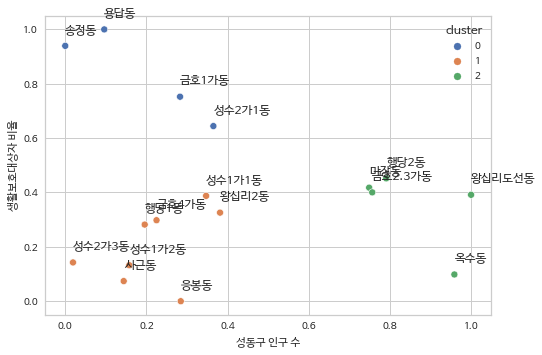

In [ ]:
sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

for i in range(len(cluster_df)):
  plt.annotate(cluster_df['dong'][i], (cluster_df['population'][i], cluster_df['ratio'][i]+0.05))


plt.xlabel('성동구 인구 수')
plt.ylabel('생활보호대상자 비율')

In [ ]:
# cluster_df.to_csv('/content/drive/MyDrive/project/14. 시각화/seongdong_cluster.csv')

### 1-9. 동대문구

In [ ]:
동대문_df = pd.read_csv('/content/drive/MyDrive/project/12. 공체시설 부족 자치구/2020 동대문구.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] = 동대문_df['동']

동대문_df =  동대문_df.iloc[:,1:]
동대문_df

인구 수  생활보호대상자 비율
0   0.678298    0.533668
1   0.254883    0.250962
2   0.632813    0.061391
3   0.631873    0.302652
4   1.000000    0.273644
5   0.776593    0.203619
6   0.000000    0.033360
7   0.101375    0.000000
8   0.463078    0.024155
9   0.320838    0.152471
10  0.311148    0.355030
11  0.291804    1.000000
12  0.748911    0.398536
13  0.539138    0.478516

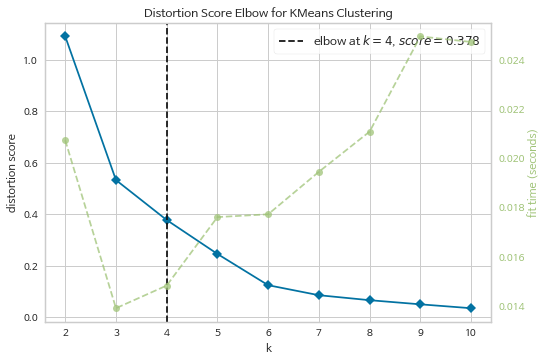

In [ ]:
km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(동대문_df)
Elbow_M.show()

plt.show()

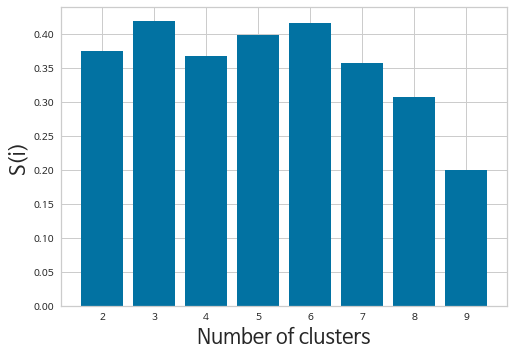

In [ ]:
silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(동대문_df)
    silhouette_scores.append(silhouette_score(동대문_df, m1.fit_predict(동대문_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [ ]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  3


#### 적절한 k값 찾기

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


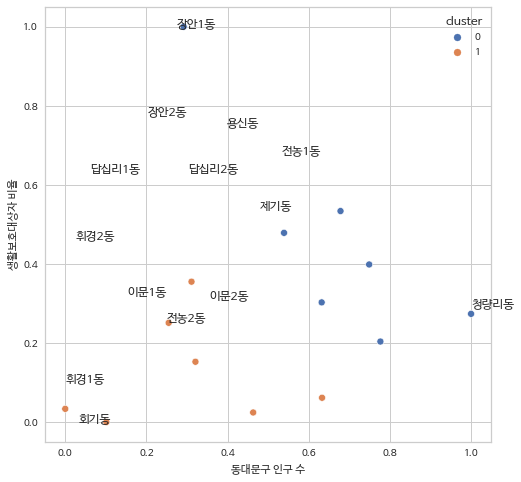

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


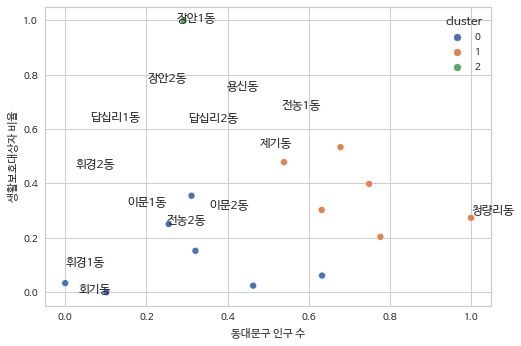

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


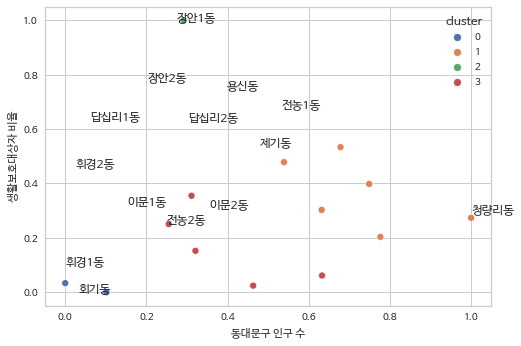

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


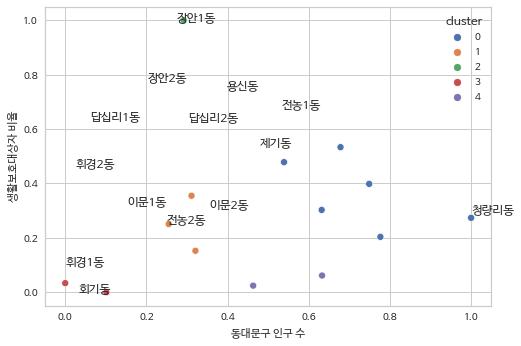

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


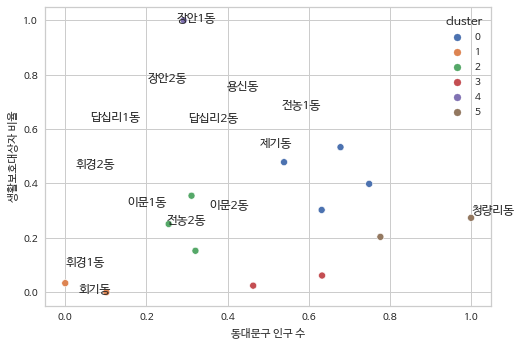

In [ ]:
plt.figure(figsize = (8, 8))

for i in range(2,7):

  k = i
  model = KMeans(n_clusters = k, random_state = 10)
  model.fit(동대문_df)
  동대문_df['cluster'] = model.fit_predict(동대문_df)

  cluster_df = pd.DataFrame()
  cluster_df['동'] = 동_df['동']
  cluster_df['인구 수'] = 동대문_df['인구 수']
  cluster_df['생활보호대상자 비율'] = 동대문_df['생활보호대상자 비율']
  cluster_df['cluster'] = 동대문_df['cluster']

  cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})

  sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

  for index, dong, population, ratio, cluster in cluster_df.itertuples():
    plt.annotate(dong, (ratio, population))
  plt.xlabel('동대문구 인구 수')
  plt.ylabel('생활보호대상자 비율')
  
  plt.show()

In [ ]:
k = 3

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(동대문_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
동대문_df['cluster'] = model.fit_predict(동대문_df)

In [ ]:
동대문_df['cluster'].value_counts()

2    7
1    6
0    1
Name: cluster, dtype: int64

In [ ]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.29180439, 1.        ],
       [0.24188702, 0.13599631],
       [0.71537496, 0.32171814]])

In [ ]:
cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 동대문_df['인구 수']
cluster_df['생활보호대상자 비율'] = 동대문_df['생활보호대상자 비율']
cluster_df['cluster'] = 동대문_df['cluster']
cluster_df

동      인구 수  생활보호대상자 비율  cluster
0    전농1동  0.678298    0.533668        2
1    전농2동  0.254883    0.250962        1
2   답십리1동  0.632813    0.061391        2
3   답십리2동  0.631873    0.302652        2
4    장안1동  1.000000    0.273644        2
5    장안2동  0.776593    0.203619        2
6     회기동  0.000000    0.033360        1
7    휘경1동  0.101375    0.000000        1
8    휘경2동  0.463078    0.024155        1
9    이문1동  0.320838    0.152471        1
10   이문2동  0.311148    0.355030        1
11   청량리동  0.291804    1.000000        0
12    용신동  0.748911    0.398536        2
13    제기동  0.539138    0.478516        2

In [ ]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

dong  population     ratio  cluster
0    전농1동    0.678298  0.533668        2
1    전농2동    0.254883  0.250962        1
2   답십리1동    0.632813  0.061391        2
3   답십리2동    0.631873  0.302652        2
4    장안1동    1.000000  0.273644        2
5    장안2동    0.776593  0.203619        2
6     회기동    0.000000  0.033360        1
7    휘경1동    0.101375  0.000000        1
8    휘경2동    0.463078  0.024155        1
9    이문1동    0.320838  0.152471        1
10   이문2동    0.311148  0.355030        1
11   청량리동    0.291804  1.000000        0
12    용신동    0.748911  0.398536        2
13    제기동    0.539138  0.478516        2

#### **군집화**

In [ ]:
for i in range(number_of_clusters):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['청량리동']
cluster 1 :  ['전농2동', '회기동', '휘경1동', '휘경2동', '이문1동', '이문2동']
cluster 2 :  ['전농1동', '답십리1동', '답십리2동', '장안1동', '장안2동', '용신동', '제기동']


#### **입지선정**
- cluster1 : 1개 (이문1동)

In [ ]:
# cluster1

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 1:
    lst.append([(cluster_df['population'][i]-centers[1][0])**2 + (cluster_df['ratio'][i]-centers[1][1])**2, i])
  
lst

[[0.013385897995153186, 1],
 [0.06904345242780713, 6],
 [0.03823870897799049, 7],
 [0.06143410801358663, 8],
 [0.00650471053442853, 9],
 [0.052772958973816265, 10]]

In [ ]:
lst.sort()
lst

[[0.00650471053442853, 9],
 [0.013385897995153186, 1],
 [0.03823870897799049, 7],
 [0.052772958973816265, 10],
 [0.06143410801358663, 8],
 [0.06904345242780713, 6]]

In [ ]:
cluster_df.loc[[9]]

dong  population     ratio  cluster
9  이문1동    0.320838  0.152471        1

#### **시각화**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '생활보호대상자 비율')

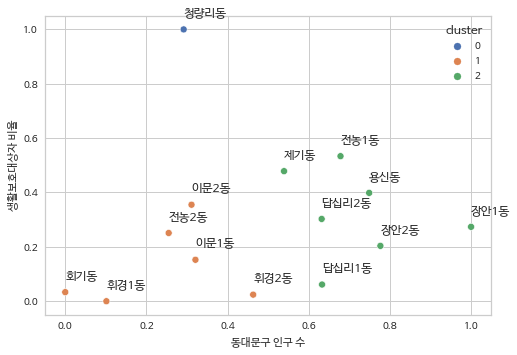

In [ ]:
sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

for i in range(len(cluster_df)):
  plt.annotate(cluster_df['dong'][i], (cluster_df['population'][i], cluster_df['ratio'][i]+0.05))


plt.xlabel('동대문구 인구 수')
plt.ylabel('생활보호대상자 비율')

In [ ]:
# cluster_df.to_csv('/content/drive/MyDrive/project/14. 시각화/dongdaemun_cluster.csv')

### 24. 중랑구

In [ ]:
중랑_df = pd.read_csv('/content/drive/MyDrive/project/12. 공체시설 부족 자치구/2020 중랑구.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] = 중랑_df['동']

중랑_df =  중랑_df.iloc[:,1:]
중랑_df

인구 수  생활보호대상자 비율
0   0.419269    0.524762
1   0.183115    0.782755
2   0.000000    0.260007
3   0.319944    0.232167
4   0.407271    0.462656
5   0.220620    0.259581
6   0.228010    0.214089
7   0.453397    0.888259
8   0.831426    0.000000
9   0.199086    0.284251
10  0.113111    1.000000
11  1.000000    0.243218
12  0.263846    0.509064
13  0.824911    0.541926
14  0.450298    0.550206
15  0.640564    0.603242

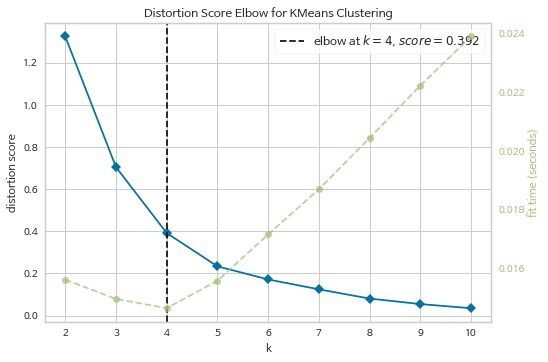

In [ ]:
km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(중랑_df)
Elbow_M.show()

plt.show()

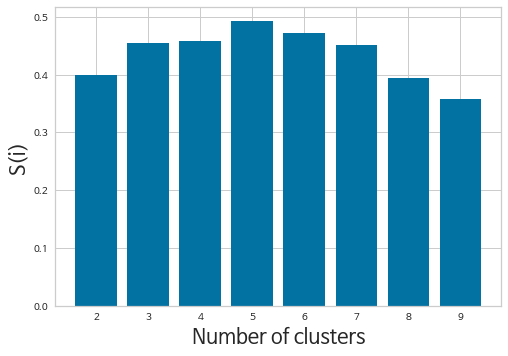

In [ ]:
silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(중랑_df)
    silhouette_scores.append(silhouette_score(중랑_df, m1.fit_predict(중랑_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [ ]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  5


#### 적절한 k값 찾기

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


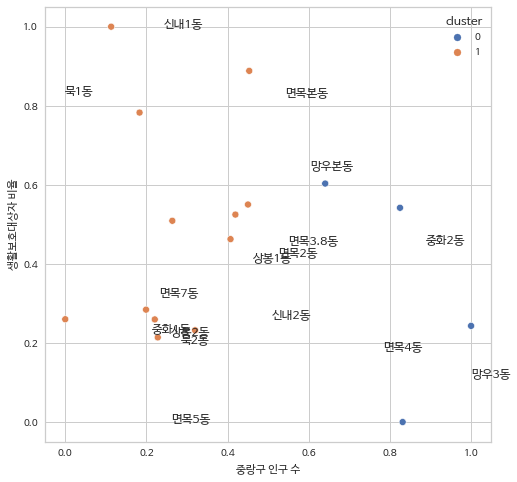

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


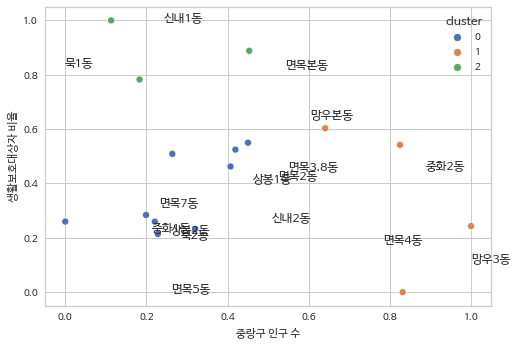

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


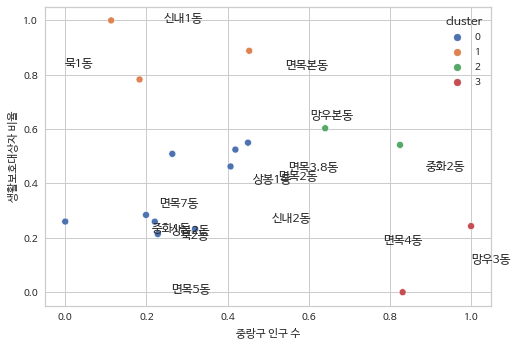

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


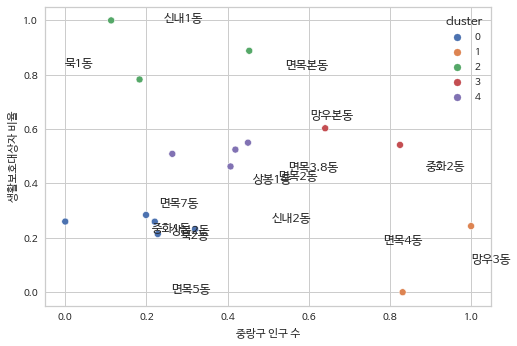

In [ ]:
plt.figure(figsize = (8, 8))

for i in range(2,6):

  k = i
  model = KMeans(n_clusters = k, random_state = 10)
  model.fit(중랑_df)
  중랑_df['cluster'] = model.fit_predict(중랑_df)

  cluster_df = pd.DataFrame()
  cluster_df['동'] = 동_df['동']
  cluster_df['인구 수'] = 중랑_df['인구 수']
  cluster_df['생활보호대상자 비율'] = 중랑_df['생활보호대상자 비율']
  cluster_df['cluster'] = 중랑_df['cluster']

  cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})

  sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

  for index, dong, population, ratio, cluster in cluster_df.itertuples():
    plt.annotate(dong, (ratio, population))
  plt.xlabel('중랑구 인구 수')
  plt.ylabel('생활보호대상자 비율')
  
  plt.show()

k=4로 결정

In [ ]:
k = 4

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(중랑_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
중랑_df['cluster'] = model.fit_predict(중랑_df)

In [ ]:
중랑_df['cluster'].value_counts()

3    5
0    5
2    3
1    3
Name: cluster, dtype: int64

In [ ]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.19353198, 0.25001877],
       [0.88544564, 0.26171487],
       [0.24987419, 0.89033804],
       [0.4362495 , 0.52998592]])

In [ ]:
cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 중랑_df['인구 수']
cluster_df['생활보호대상자 비율'] = 중랑_df['생활보호대상자 비율']
cluster_df['cluster'] = 중랑_df['cluster']
cluster_df

동      인구 수  생활보호대상자 비율  cluster
0     면목2동  0.419269    0.524762        3
1     면목4동  0.183115    0.782755        2
2     면목5동  0.000000    0.260007        0
3     면목7동  0.319944    0.232167        0
4     상봉1동  0.407271    0.462656        3
5     상봉2동  0.220620    0.259581        0
6     중화1동  0.228010    0.214089        0
7     중화2동  0.453397    0.888259        2
8      묵1동  0.831426    0.000000        1
9      묵2동  0.199086    0.284251        0
10    망우3동  0.113111    1.000000        2
11    신내1동  1.000000    0.243218        1
12    신내2동  0.263846    0.509064        3
13    면목본동  0.824911    0.541926        1
14  면목3.8동  0.450298    0.550206        3
15    망우본동  0.640564    0.603242        3

In [ ]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

dong  population     ratio  cluster
0     면목2동    0.419269  0.524762        3
1     면목4동    0.183115  0.782755        2
2     면목5동    0.000000  0.260007        0
3     면목7동    0.319944  0.232167        0
4     상봉1동    0.407271  0.462656        3
5     상봉2동    0.220620  0.259581        0
6     중화1동    0.228010  0.214089        0
7     중화2동    0.453397  0.888259        2
8      묵1동    0.831426  0.000000        1
9      묵2동    0.199086  0.284251        0
10    망우3동    0.113111  1.000000        2
11    신내1동    1.000000  0.243218        1
12    신내2동    0.263846  0.509064        3
13    면목본동    0.824911  0.541926        1
14  면목3.8동    0.450298  0.550206        3
15    망우본동    0.640564  0.603242        3

#### **군집화**

In [ ]:
for i in range(4):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['면목5동', '면목7동', '상봉2동', '중화1동', '묵2동']
cluster 1 :  ['묵1동', '신내1동', '면목본동']
cluster 2 :  ['면목4동', '중화2동', '망우3동']
cluster 3 :  ['면목2동', '상봉1동', '신내2동', '면목3.8동', '망우본동']


#### **입지선정**
- cluster1 : 1개 (신내1동)

In [ ]:
# cluster1

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 1:
    lst.append([(cluster_df['population'][i]-centers[1][0])**2 + (cluster_df['ratio'][i]-centers[1][1])**2, i])
  
lst

[[0.07141275915488601, 8],
 [0.013464820263986797, 11],
 [0.08218286116794893, 13]]

In [ ]:
lst.sort()
lst

[[0.013464820263986797, 11],
 [0.07141275915488601, 8],
 [0.08218286116794893, 13]]

In [ ]:
cluster_df.loc[[11]]

dong  population     ratio  cluster
11  신내1동         1.0  0.243218        1

#### **시각화**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '생활보호대상자 비율')

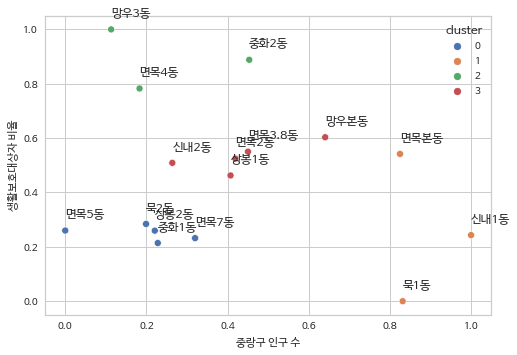

In [ ]:
sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

for i in range(len(cluster_df)):
  plt.annotate(cluster_df['dong'][i], (cluster_df['population'][i], cluster_df['ratio'][i]+0.05))


plt.xlabel('중랑구 인구 수')
plt.ylabel('생활보호대상자 비율')

In [ ]:
# cluster_df.to_csv('/content/drive/MyDrive/project/14. 시각화/jungnang_cluster.csv')

### 25. 성북구

In [ ]:
성북_df = pd.read_csv('/content/drive/MyDrive/project/12. 공체시설 부족 자치구/2020 성북구.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] = 성북_df['동']

성북_df =  성북_df.iloc[:,1:]
성북_df

인구 수  생활보호대상자 비율
0   0.046721    0.327399
1   0.388300    0.000000
2   0.090799    0.175544
3   0.074026    0.214540
4   0.177010    0.064913
5   0.353433    0.222196
6   0.100598    0.424482
7   0.436268    0.215889
8   0.824384    0.007146
9   0.112343    0.168273
10  0.477190    0.260476
11  0.230851    0.318475
12  0.232796    1.000000
13  0.000000    0.753881
14  0.119389    0.301052
15  0.121041    0.117547
16  0.368408    0.281331
17  0.078541    0.180405
18  1.000000    0.225976
19  0.821265    0.510035

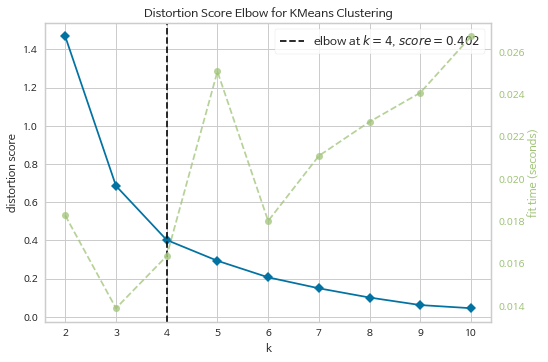

In [ ]:
km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(성북_df)
Elbow_M.show()

plt.show()

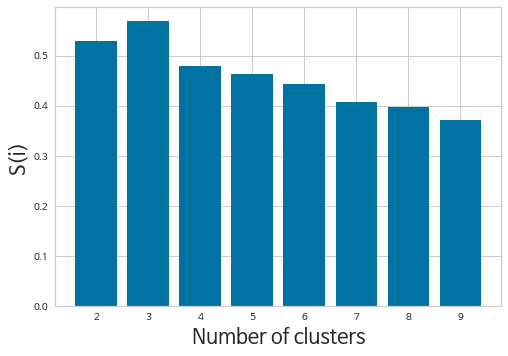

In [ ]:
silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(성북_df)
    silhouette_scores.append(silhouette_score(성북_df, m1.fit_predict(성북_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [ ]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  3


#### 적절한 k값 찾기

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


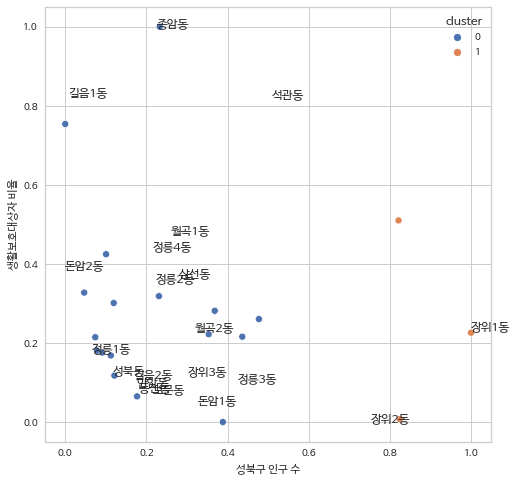

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


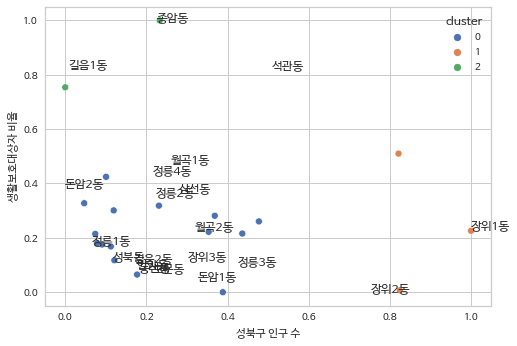

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


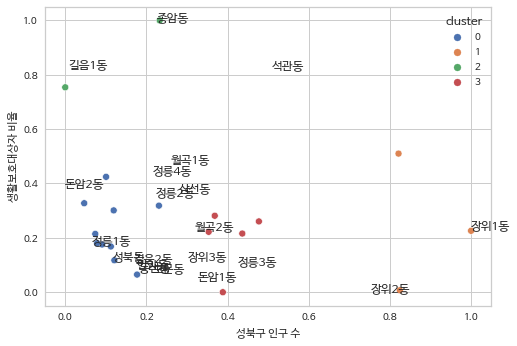

In [ ]:
plt.figure(figsize = (8, 8))

for i in range(2,5):

  k = i
  model = KMeans(n_clusters = k, random_state = 10)
  model.fit(성북_df)
  성북_df['cluster'] = model.fit_predict(성북_df)

  cluster_df = pd.DataFrame()
  cluster_df['동'] = 동_df['동']
  cluster_df['인구 수'] = 성북_df['인구 수']
  cluster_df['생활보호대상자 비율'] = 성북_df['생활보호대상자 비율']
  cluster_df['cluster'] = 성북_df['cluster']

  cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})

  sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

  for index, dong, population, ratio, cluster in cluster_df.itertuples():
    plt.annotate(dong, (ratio, population))
  plt.xlabel('성북구 인구 수')
  plt.ylabel('생활보호대상자 비율')
  
  plt.show()

k=3로 결정

In [ ]:
k = 3

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(성북_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
성북_df['cluster'] = model.fit_predict(성북_df)

In [ ]:
성북_df['cluster'].value_counts()

2    15
1     3
0     2
Name: cluster, dtype: int64

In [ ]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.11639814, 0.87694042],
       [0.88188302, 0.24771903],
       [0.21166122, 0.21816803]])

In [ ]:
cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 성북_df['인구 수']
cluster_df['생활보호대상자 비율'] = 성북_df['생활보호대상자 비율']
cluster_df['cluster'] = 성북_df['cluster']
cluster_df

동      인구 수  생활보호대상자 비율  cluster
0   돈암1동  0.046721    0.327399        2
1   돈암2동  0.388300    0.000000        2
2    안암동  0.090799    0.175544        2
3    보문동  0.074026    0.214540        2
4   정릉1동  0.177010    0.064913        2
5   정릉2동  0.353433    0.222196        2
6   정릉3동  0.100598    0.424482        2
7   정릉4동  0.436268    0.215889        2
8   길음1동  0.824384    0.007146        1
9   길음2동  0.112343    0.168273        2
10  월곡1동  0.477190    0.260476        2
11  월곡2동  0.230851    0.318475        2
12  장위1동  0.232796    1.000000        0
13  장위2동  0.000000    0.753881        0
14  장위3동  0.119389    0.301052        2
15   성북동  0.121041    0.117547        2
16   삼선동  0.368408    0.281331        2
17   동선동  0.078541    0.180405        2
18   종암동  1.000000    0.225976        1
19   석관동  0.821265    0.510035        1

In [ ]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

dong  population     ratio  cluster
0   돈암1동    0.046721  0.327399        2
1   돈암2동    0.388300  0.000000        2
2    안암동    0.090799  0.175544        2
3    보문동    0.074026  0.214540        2
4   정릉1동    0.177010  0.064913        2
5   정릉2동    0.353433  0.222196        2
6   정릉3동    0.100598  0.424482        2
7   정릉4동    0.436268  0.215889        2
8   길음1동    0.824384  0.007146        1
9   길음2동    0.112343  0.168273        2
10  월곡1동    0.477190  0.260476        2
11  월곡2동    0.230851  0.318475        2
12  장위1동    0.232796  1.000000        0
13  장위2동    0.000000  0.753881        0
14  장위3동    0.119389  0.301052        2
15   성북동    0.121041  0.117547        2
16   삼선동    0.368408  0.281331        2
17   동선동    0.078541  0.180405        2
18   종암동    1.000000  0.225976        1
19   석관동    0.821265  0.510035        1

#### **군집화**

In [ ]:
for i in range(3):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['장위1동', '장위2동']
cluster 1 :  ['길음1동', '종암동', '석관동']
cluster 2 :  ['돈암1동', '돈암2동', '안암동', '보문동', '정릉1동', '정릉2동', '정릉3동', '정릉4동', '길음2동', '월곡1동', '월곡2동', '장위3동', '성북동', '삼선동', '동선동']


#### **입지선정**
- cluster0 : 1개 (장위1동)
- cluster1 : 0개
- cluster2 : 1개 (월곡2동)

In [ ]:
# cluster0

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 0:
    lst.append([(cluster_df['population'][i]-centers[0][0])**2 + (cluster_df['ratio'][i]-centers[0][1])**2, i])
  
lst

[[0.028692186331551822, 12], [0.028692186331551843, 13]]

In [ ]:
lst.sort()
lst

[[0.028692186331551822, 12], [0.028692186331551843, 13]]

In [ ]:
cluster_df.loc[[12]]

dong  population  ratio  cluster
12  장위1동    0.232796    1.0        0

In [ ]:
# cluster2

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 2:
    lst.append([(cluster_df['population'][i]-centers[2][0])**2 + (cluster_df['ratio'][i]-centers[2][1])**2, i])
  
lst

[[0.039136665691194894, 0],
 [0.07879841601287078, 1],
 [0.01642452576455682, 2],
 [0.01895647771023334, 3],
 [0.02468788840985955, 4],
 [0.02011557625942893, 5],
 [0.054900437530906905, 6],
 [0.05045349553887923, 7],
 [0.012353734863734091, 9],
 [0.07229561102185329, 10],
 [0.010429700141649735, 11],
 [0.015383922510133465, 14],
 [0.018336598078105858, 15],
 [0.028558911853260628, 16],
 [0.019147124927769186, 17]]

In [ ]:
lst.sort()
lst

[[0.010429700141649735, 11],
 [0.012353734863734091, 9],
 [0.015383922510133465, 14],
 [0.01642452576455682, 2],
 [0.018336598078105858, 15],
 [0.01895647771023334, 3],
 [0.019147124927769186, 17],
 [0.02011557625942893, 5],
 [0.02468788840985955, 4],
 [0.028558911853260628, 16],
 [0.039136665691194894, 0],
 [0.05045349553887923, 7],
 [0.054900437530906905, 6],
 [0.07229561102185329, 10],
 [0.07879841601287078, 1]]

In [ ]:
cluster_df.loc[[11]]

dong  population     ratio  cluster
11  월곡2동    0.230851  0.318475        2

#### **시각화**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '생활보호대상자 비율')

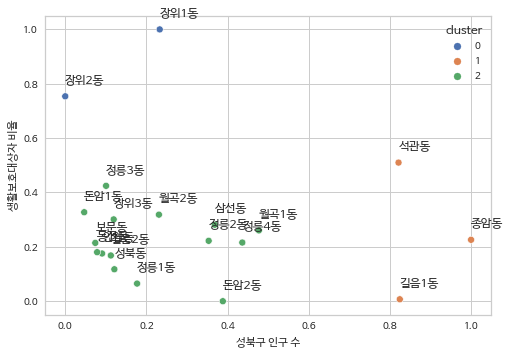

In [ ]:
sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

for i in range(len(cluster_df)):
  plt.annotate(cluster_df['dong'][i], (cluster_df['population'][i], cluster_df['ratio'][i]+0.05))


plt.xlabel('성북구 인구 수')
plt.ylabel('생활보호대상자 비율')

In [ ]:
# cluster_df.to_csv('/content/drive/MyDrive/project/14. 시각화/seongbuk_cluster.csv')